# Scraping des données

In [1]:
# Chargement des librairies

#!pip install snscrape
#!pip install twitterscraper
#!pip install snscrape --upgrade
#!pip install twitterscraper --upgrade
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
from matplotlib import pyplot as plt
from plotly import express as px
from snscrape.modules import twitter as sntwitter

### Méthode 1 : Package *snscrape*

In [ ]:
# Tshisekedi

query1 = 'Tshisekedi lang:fr until:2018-12-31 since:2018-11-20'
scraper1 = sntwitter.TwitterSearchScraper(query1)

tweets1 = []

for tweet in scraper1.get_items():
    data = [tweet.date,
            tweet.user.displayname,
            tweet.rawContent,
            tweet.replyCount,
            tweet.retweetCount,
            tweet.likeCount,
            tweet.quoteCount,
            tweet.user.created,
            tweet.user.location,
            tweet.user.followersCount
            #    tweet.friendsCount,
            #    tweet.statusesCount,
            #    tweet.favouritesCount,
            #    tweet.listedCount,
            #    tweet.mediaCount
            ]
    tweets1.append(data)

columns_name=['Date', 'UserName', 'Comment', 'Reply', 'Retweet', 'Like', 'Quote', 'Creation', 'Place', 'Followers']
df1 = pd.DataFrame(tweets1, columns = columns_name)
df1['Leader'] = 'Tshisekedi'

In [ ]:
# Fayulu

query2 = 'Fayulu lang:fr until:2018-12-31 since:2018-11-20'
scraper2 = sntwitter.TwitterSearchScraper(query2)

tweets2 = []

for tweet in scraper2.get_items():
    data = [tweet.date,
            tweet.user.displayname,
            tweet.rawContent,
            tweet.replyCount,
            tweet.retweetCount,
            tweet.likeCount,
            tweet.quoteCount,
            tweet.user.created,
            tweet.user.location,
            tweet.user.followersCount
            #    tweet.friendsCount,
            #    tweet.statusesCount,
            #    tweet.favouritesCount,
            #    tweet.listedCount,
            #    tweet.mediaCount
            ]
    tweets2.append(data)

columns_name=['Date', 'UserName', 'Comment', 'Reply', 'Retweet', 'Like', 'Quote', 'Creation', 'Place', 'Followers']
df2 = pd.DataFrame(tweets2, columns = columns_name)
df2['Leader'] = 'Fayulu'

In [ ]:
# Ramazani

query3 = 'Shadary lang:fr until:2018-12-31 since:2018-11-20'
scraper3 = sntwitter.TwitterSearchScraper(query3)

tweets3 = []

for tweet in scraper3.get_items():
    data = [tweet.date,
            tweet.user.displayname,
            tweet.rawContent,
            tweet.replyCount,
            tweet.retweetCount,
            tweet.likeCount,
            tweet.quoteCount,
            tweet.user.created,
            tweet.user.location,
            tweet.user.followersCount
            #    tweet.friendsCount,
            #    tweet.statusesCount,
            #    tweet.favouritesCount,
            #    tweet.listedCount,
            #    tweet.mediaCount
            ]
    tweets3.append(data)

columns_name=['Date', 'UserName', 'Comment', 'Reply', 'Retweet', 'Like', 'Quote', 'Creation', 'Place', 'Followers']
df3 = pd.DataFrame(tweets3, columns = columns_name)
df3['Leader'] = 'Ramazani'

In [ ]:
# Preparation des donnees

df = pd.concat([df1, df2, df3], axis = 0)
df.Date = pd.to_datetime(df.Date).dt.date
df.Creation = pd.to_datetime(df.Creation).dt.date
df.sort_values('Date', ascending = True, inplace = True)
df.reset_index(inplace = True)
df.drop("index", inplace = True, axis = 1)
#df.to_excel('Scraped Data.xlsx', sheet_name = '2018', header = True)

df.info()
df.drop('UserName', axis = 1).sample(10, random_state = 123)

### Méthode 2 : Package *twitterscraper*

In [121]:
# Parametrage de la requete

#!pip install twitterscraper==1.6.1
import datetime
from twitterscraper import query_tweets

begin_date = datetime.date(2018,11,20)
end_date = datetime.date(2018,12,31)
lang = 'french'

In [ ]:
# Tshisekedi

tweets = query_tweets(query = 'Tshisekedi', begindate = begin_date, enddate = end_date, lang=lang)
df1 = pd.DataFrame(t.__dict__ for t in tweets)

#columns_name=['Date', 'UserName', 'Comment', 'Reply', 'Retweet', 'Like', 'Quote', 'Creation', 'Place', 'Followers']
#df1['Leader'] = 'Tshisekedi'

# Nettoyage des données

In [2]:
# Chargement des librairies

import os
import re
import nltk
import datetime
from datetime import date, timedelta
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Importation Google Colab

""" import io
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Scraped Data.xlsx']), sheet_name='2018')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()
df.drop('UserName', axis = 1).sample(10, random_state = 123) """

" import io\nfrom google.colab import files\n\nuploaded = files.upload()\npath = 'E://Rédaction d'articles//Sentiment Analysis//Draft/Scraped Data.xlsx'\n\ndf = pd.read_excel(io.BytesIO(uploaded[path]), sheet_name='2018')\ndf.drop('Unnamed: 0', axis=1, inplace=True)\ndf.info()\ndf.drop('UserName', axis = 1).sample(10, random_state = 123) "

In [3]:
# Importation

df = pd.read_excel('Scraped Data.xlsx', sheet_name='2018')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()
df.drop('UserName', axis = 1).sample(10, random_state = 123)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56219 entries, 0 to 56218
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       56219 non-null  datetime64[ns]
 1   UserName   56194 non-null  object        
 2   Comment    56219 non-null  object        
 3   Reply      56219 non-null  int64         
 4   Retweet    56219 non-null  int64         
 5   Like       56219 non-null  int64         
 6   Quote      56219 non-null  int64         
 7   Creation   56219 non-null  datetime64[ns]
 8   Place      39387 non-null  object        
 9   Followers  56219 non-null  int64         
 10  Leader     56219 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 4.7+ MB


Date                                            Comment  Reply  \
27166 2018-12-10  Emmanuel RAMAZANI Shadary mon futur président....      0   
30770 2018-12-12  @Fabiyo90 @tresorkikudi @StanysBujakera @Marti...      2   
7827  2018-11-26  CHAIRMAN @moise_katumbi VOUS VOULEZ FAIRE LES ...      0   
42405 2018-12-19  je vous dis mes três chers collegue dans son e...      0   
55367 2018-12-30  Mon frère aller vote le numéro 4 pour le chang...      0   
42647 2018-12-19  Pendant que Félix Tshisekedi,Vital Kamerhe et ...      0   
35716 2018-12-15  @juliaferiol @StanysBujakera @MartinFayulu @Ad...      0   
18935 2018-12-05  @actualitecd Arrêter d ns metr d la poudr aux ...      0   
28168 2018-12-11  J'ai ajouté une vidéo à une liste de lecture @...      0   
23879 2018-12-08  ET SI LE FCC JETE SON DÉVOLU SUR FÉLIX TSHISEK...      0   

       Retweet  Like  Quote   Creation                           Place  \
27166        0     0      0 2018-08-07  République Démocratique Du Con   
30770        0     1      0 2018-11-14                   Paris, France   
7827         0     0      0 2009-07-27                  United Kingdom   
42405        0     0      0 2018-12-10               Brasil  são paulo   
55367        0     0      0 2018-03-22                       Kinshasa    
42647        0     0      0 2011-02-15                      Everywhere   
35716        0     0      0 2010-10-25                 Kinshasa, Congo   
18935        0     0      0 2018-04-13                             NaN   
28168        0     0      0 2017-08-16                    kinshasa RDC   
23879        0     2      0 2017-03-27                             NaN   

       Followers      Leader  
27166          0    Ramazani  
30770       1137      Fayulu  
7827       27878      Fayulu  
42405          0  Tshisekedi  
55367         19      Fayulu  
42647        157  Tshisekedi  
35716        769      Fayulu  
18935          1    Ramazani  
28168         36      Fayulu  
23879         70  Tshisekedi

In [4]:
# Suppression des hashtags et hyperliens

def clean_tweet(tweet):
    # supprimer les hashtags et mentions
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub('(@[A-Za-z0-9_]+)','', tweet)
    # supprimer les hyperliens
    tweet = re.sub(r'http\S+', '', tweet)
    return tweet

df['Comment'] = df['Comment'].apply(lambda x: clean_tweet(x))

In [5]:
# Tokenization
df['Comment'] = df['Comment'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Comment'] = df['Comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stopwords removal
stop_words = set(stopwords.words('french'))
df['Comment'] = df['Comment'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

# Caracteres speciaux
df['Comment'] = df['Comment'].apply(lambda x: [word for word in x if word.isalpha()])

In [6]:
# Visualisation du dataframe

df.sample(10, random_state = 123)

Date                       UserName  \
27166 2018-12-10                    Piopoprince   
30770 2018-12-12                          Favor   
7827  2018-11-26                          TopFo   
42405 2018-12-19                            Mak   
55367 2018-12-30           Hemediselemani@yahoo   
42647 2018-12-19                   Yves MUYOMBO   
35716 2018-12-15  anthony micah kabongo katombe   
18935 2018-12-05                     fredluboya   
28168 2018-12-11           studiomototv@gmail.c   
23879 2018-12-08                   Nzola Kumeso   

                                                 Comment  Reply  Retweet  \
27166  [emmanuel, ramazani, shadary, futur, président...      0        0   
30770  [frère, demandé, pardon, retirer, parole, fan,...      2        0   
7827   [chairman, voulez, faire, elections, deux, ans...      0        0   
42405  [dis, três, chers, collegue, ensemble, candida...      0        0   
55367  [frère, aller, vote, numéro, changement, pay, ...      0        0   
42647  [pendant, félix, tshisekedi, vital, kamerhe, s...      0        0   
35716  [quelle, politique, fayulu, répondez, ensuite,...      0        0   
18935  [arrêter, metr, poudr, yeux, pa, régime, place...      0        0   
28168  [ajouté, vidéo, liste, lecture, réaction, mart...      0        0   
23879  [si, fcc, jete, dévolu, félix, tshisekedi, a, ...      0        0   

       Like  Quote   Creation                           Place  Followers  \
27166     0      0 2018-08-07  République Démocratique Du Con          0   
30770     1      0 2018-11-14                   Paris, France       1137   
7827      0      0 2009-07-27                  United Kingdom      27878   
42405     0      0 2018-12-10               Brasil  são paulo          0   
55367     0      0 2018-03-22                       Kinshasa          19   
42647     0      0 2011-02-15                      Everywhere        157   
35716     0      0 2010-10-25                 Kinshasa, Congo        769   
18935     0      0 2018-04-13                             NaN          1   
28168     0      0 2017-08-16                    kinshasa RDC         36   
23879     2      0 2017-03-27                             NaN         70   

           Leader  
27166    Ramazani  
30770      Fayulu  
7827       Fayulu  
42405  Tshisekedi  
55367      Fayulu  
42647  Tshisekedi  
35716      Fayulu  
18935    Ramazani  
28168      Fayulu  
23879  Tshisekedi

# Exploration des données

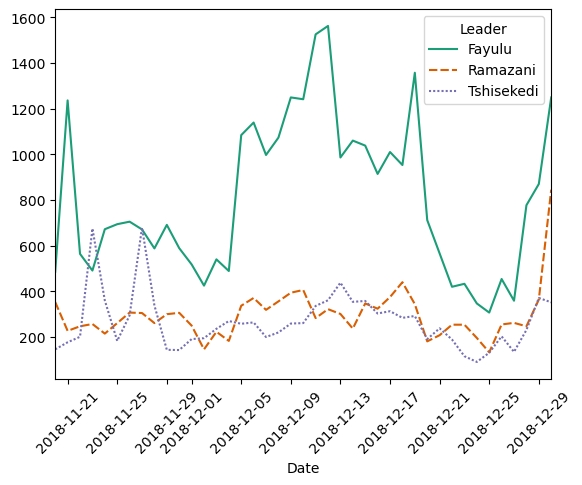

In [7]:
# Evolution du nombre de tweets par leader

sns.lineplot(data = df.pivot_table(values = "Quote", columns = "Leader", index = "Date", aggfunc = "count"),
             palette = 'Dark2')
#plt.title('Evolution du nombre de tweets par leader')
plt.xticks(rotation=45)
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.savefig('evolution_of_the_number_of_tweets_per_leader.png', bbox_inches = 'tight', pad_inches = .1);

Leader
Fayulu        33041
Ramazani      12196
Tshisekedi    10982
dtype: int64

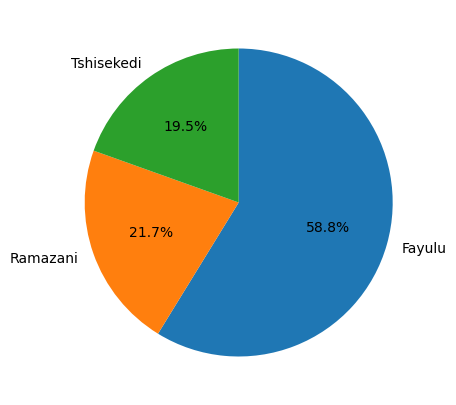

In [8]:
# Cumul du nombre de tweets par leader

plt.figure(figsize = (5,5))
plt.pie(x = df['Leader'].value_counts(normalize = True, ascending = False), labels = df.groupby('Leader').size().index,
        autopct = '%2.1f%%', counterclock = False, startangle = 90)
plt.savefig('distribution_of_tweets_per_leader.png', bbox_inches = 'tight', pad_inches = .1);
df.groupby('Leader').size()

In [9]:
# Comptage des tweets par provenance

location = df['Place'].value_counts()
location = location.to_frame()
location.rename(columns = {'Place':'Frequency'}, inplace = True)
location.index.names = ['Place']
location.reset_index(inplace = True)
location.sample(10)

Place  Frequency
537     Goma/Beni-RDC & Paris-France          8
1751                       Rdc/Goma           1
1541                   Hapa na pale           1
402                 Anvers, Belgique         12
1894          Bujumbura, Goma, Bunia          1
2098              kinshasa, RD congo          1
1647                Pontoise, France          1
1218               Buningbaya, Ghana          2
1885  54kibombo/BUKAVURDC en faceISP          1
1477                  Omboué, Gabon           1

In [10]:
# Gestion des doublons

for i in location.index:
    if 'rdc' in location['Place'][i]:
        location['Place'][i] = 'DRC'
    elif 'Bukavu' in location['Place'][i]:
        location['Place'][i] = 'Bukavu'
    elif 'Goma' in location['Place'][i]:
        location['Place'][i] = 'Goma'
    elif 'goma' in location['Place'][i]:
        location['Place'][i] = 'Goma'
    elif 'GOMA' in location['Place'][i]:
        location['Place'][i] = 'Goma'
    elif 'Nord Kivu' in location['Place'][i]:
        location['Place'][i] = 'Goma'
    elif 'Nord-Kivu' in location['Place'][i]:
        location['Place'][i] = 'Goma'
    elif 'Bandundu' in location['Place'][i]:
        location['Place'][i] = 'Bandundu'
    elif 'Butembo' in location['Place'][i]:
        location['Place'][i] = 'Butembo'
    elif 'BENI' in location['Place'][i]:
        location['Place'][i] = 'Beni'
    elif 'Bukavu' in location['Place'][i]:
        location['Place'][i] = 'Bukavu'
    elif 'unia' in location['Place'][i]:
        location['Place'][i] = 'Bunia'
    elif 'Haut Katanga' in location['Place'][i]:
        location['Place'][i] = 'Haut-Katanga'
    elif 'Haut-Katanga' in location['Place'][i]:
        location['Place'][i] = 'Haut-Katanga'
    elif 'Katanga' in location['Place'][i]:
        location['Place'][i] = 'Katanga'
    elif 'alemi' in location['Place'][i]:
        location['Place'][i] = 'Kalemie'
    elif 'Kananga' in location['Place'][i]:
        location['Place'][i] = 'KANANGA C'
    elif 'Kikwit' in location['Place'][i]:
        location['Place'][i] = 'KIKWIT'
    elif 'Kindu' in location['Place'][i]:
        location['Place'][i] = 'KINDU'
    elif 'Kisangani' in location['Place'][i]:
        location['Place'][i] = 'Kisangani'
    elif 'Kolwezi' in location['Place'][i]:
        location['Place'][i] = 'Kolwezi'
    elif 'likasi' in location['Place'][i]:
        location['Place'][i] = 'Likasi'
    elif 'Likasi' in location['Place'][i]:
        location['Place'][i] = 'Likasi'
    elif 'lisala' in location['Place'][i]:
        location['Place'][i] = 'Lisala RDC'
    elif 'Lubumbashi' in location['Place'][i]:
        location['Place'][i] = 'Lubumbashi'
    elif 'lubumbashi' in location['Place'][i]:
        location['Place'][i] = 'Lubumbashi'
    elif 'Matadi' in location['Place'][i]:
        location['Place'][i] = 'Matadi'
    elif 'Mbandaka' in location['Place'][i]:
        location['Place'][i] = 'Mbandaka'
    elif 'Mbuji' in location['Place'][i]:
        location['Place'][i] = 'Mbuji-Mayi'
    elif 'Uvira' in location['Place'][i]:
        location['Place'][i] = 'Uvira'
    elif 'Worldwide citizen from Bumba' in location['Place'][i]:
        location['Place'][i] = 'Bumba'
    elif 'KINSHASA' in location['Place'][i]:
        location['Place'][i] = 'Kinshasa'
    elif 'Kinshasa' in location['Place'][i]:
        location['Place'][i] = 'Kinshasa'
    elif 'Kin' in location['Place'][i]:
        location['Place'][i] = 'Kinshasa'
    elif 'kinshasa' in location['Place'][i]:
        location['Place'][i] = 'Kinshasa'
    elif 'Con' in location['Place'][i]:
        location['Place'][i] = 'DRC'
    elif 'CONGO' in location['Place'][i]:
        location['Place'][i] = 'DRC'
    elif 'DRC' in location['Place'][i]:
        location['Place'][i] = 'DRC'
    elif 'RDC' in location['Place'][i]:
        location['Place'][i] = 'DRC'
    elif 'Abidjan' in location['Place'][i]:
        location['Place'][i] = 'Abidjan'
    elif 'Brazzaville' in location['Place'][i]:
        location['Place'][i] = 'Brazzaville'
    elif 'Bujumbura' in location['Place'][i]:
        location['Place'][i] = 'Bujumbura'
    elif 'Cape' in location['Place'][i]:
        location['Place'][i] = 'Cape Town'
    elif 'cape' in location['Place'][i]:
        location['Place'][i] = 'Cape Town'
    elif 'Town' in location['Place'][i]:
        location['Place'][i] = 'Cape Town'
    elif 'town' in location['Place'][i]:
        location['Place'][i] = 'Cape Town'
    elif 'Casablanca' in location['Place'][i]:
        location['Place'][i] = 'Casablanca'
    elif 'Conakry' in location['Place'][i]:
        location['Place'][i] = 'Conakry'
    elif 'Cotonou' in location['Place'][i]:
        location['Place'][i] = 'Cotonou'
    elif 'Dakar' in location['Place'][i]:
        location['Place'][i] = 'Dakar'
    elif 'Denver' in location['Place'][i]:
        location['Place'][i] = 'Denver'
    elif 'Douala' in location['Place'][i]:
        location['Place'][i] = 'DOUALA'
    elif 'Kampala' in location['Place'][i]:
        location['Place'][i] = 'Kampala'
    elif 'Luanda' in location['Place'][i]:
        location['Place'][i] = 'Angola'
    elif 'luanda' in location['Place'][i]:
        location['Place'][i] = 'Angola'
    elif 'ngola' in location['Place'][i]:
        location['Place'][i] = 'Angola'
    elif 'Camero' in location['Place'][i]:
        location['Place'][i] = 'Cameroun'
    elif 'thiopi' in location['Place'][i]:
        location['Place'][i] = 'Éthiopie'
    elif 'Harare' in location['Place'][i]:
        location['Place'][i] = 'Zimbabwe'
    elif 'Dar es Salaam' in location['Place'][i]:
        location['Place'][i] = 'Dar es Salaam'
    elif 'Johannesburg' in location['Place'][i]:
        location['Place'][i] = 'Johannesburg'
    elif 'Kigali' in location['Place'][i]:
        location['Place'][i] = 'Kigali'
    elif 'Libreville' in location['Place'][i]:
        location['Place'][i] = 'Libreville'
    elif 'Marrakech' in location['Place'][i]:
        location['Place'][i] = 'Marrakech'
    elif 'Nairobi' in location['Place'][i]:
        location['Place'][i] = 'NAIROBI-KENYA'
    elif 'Namur' in location['Place'][i]:
        location['Place'][i] = 'Namur'
    elif 'Ouagadougou' in location['Place'][i]:
        location['Place'][i] = 'Ouagadougou'
    elif 'Rabat' in location['Place'][i]:
        location['Place'][i] = 'Rabat'
    elif 'Yaoundé' in location['Place'][i]:
        location['Place'][i] = 'Yaounde'
    elif 'Zambia' in location['Place'][i]:
        location['Place'][i] = 'Zambie'
    elif 'ZAMBIA' in location['Place'][i]:
        location['Place'][i] = 'Zambie'
    elif 'Alberta' in location['Place'][i]:
        location['Place'][i] = 'Alberta'
    elif 'Anvers' in location['Place'][i]:
        location['Place'][i] = 'Anvers'
    elif 'Buffalo' in location['Place'][i]:
        location['Place'][i] = 'New-York'
    elif 'Brussel' in location['Place'][i]:
        location['Place'][i] = 'Belgique'
    elif 'Bruxelle' in location['Place'][i]:
        location['Place'][i] = 'Belgique'
    elif 'BRUXELLE' in location['Place'][i]:
        location['Place'][i] = 'Belgique'
    elif 'CRETEIL' in location['Place'][i]:
        location['Place'][i] = 'CRETEIL'
    elif 'California' in location['Place'][i]:
        location['Place'][i] = 'Californie'
    elif 'Colorado' in location['Place'][i]:
        location['Place'][i] = 'Colorado'
    elif 'Dallas' in location['Place'][i]:
        location['Place'][i] = 'Dallas'
    elif 'Dublin' in location['Place'][i]:
        location['Place'][i] = 'Dublin'
    elif 'Frankfurt' in location['Place'][i]:
        location['Place'][i] = 'Frankfurt'
    elif 'Gatineau' in location['Place'][i]:
        location['Place'][i] = 'Gatineau'
    elif 'Genève' in location['Place'][i]:
        location['Place'][i] = 'Genève'
    elif 'Geneva' in location['Place'][i]:
        location['Place'][i] = 'Genève'
    elif 'GENEVA' in location['Place'][i]:
        location['Place'][i] = 'Genève'
    elif 'Iowa' in location['Place'][i]:
        location['Place'][i] = 'Iowa'
    elif 'Lausanne' in location['Place'][i]:
        location['Place'][i] = 'Lausanne'
    elif 'Liège' in location['Place'][i]:
        location['Place'][i] = 'Liège'
    elif 'Lille' in location['Place'][i]:
        location['Place'][i] = 'Lille'
    elif 'London' in location['Place'][i]:
        location['Place'][i] = 'LONDRES'
    elif 'Londres' in location['Place'][i]:
        location['Place'][i] = 'LONDRES'
    elif 'Los Angeles' in location['Place'][i]:
        location['Place'][i] = 'los angeles'
    elif 'Louvain' in location['Place'][i]:
        location['Place'][i] = 'Louvain'
    elif 'Luxembourg' in location['Place'][i]:
        location['Place'][i] = 'Luxembourg'
    elif 'Manchester' in location['Place'][i]:
        location['Place'][i] = 'Manchester'
    elif 'Manono' in location['Place'][i]:
        location['Place'][i] = 'Manono'
    elif 'Lyon' in location['Place'][i]:
        location['Place'][i] = 'lyon'
    elif 'Marseille' in location['Place'][i]:
        location['Place'][i] = 'Marseille'
    elif 'ontr' in location['Place'][i]:
        location['Place'][i] = 'Montréal'
    elif 'Nancy' in location['Place'][i]:
        location['Place'][i] = 'Nancy'
    elif 'New Delhi' in location['Place'][i]:
        location['Place'][i] = 'New Delhi'
    elif 'New York' in location['Place'][i]:
        location['Place'][i] = 'New-York'
    elif 'Ontario' in location['Place'][i]:
        location['Place'][i] = 'Ontario'
    elif 'Orleans' in location['Place'][i]:
        location['Place'][i] = 'Orléans, France'
    elif 'Ottawa' in location['Place'][i]:
        location['Place'][i] = 'Ottawa'
    elif 'Paris' in location['Place'][i]:
        location['Place'][i] = 'Paris'
    elif 'Québec' in location['Place'][i]:
        location['Place'][i] = 'Quebec'
    elif 'rome' in location['Place'][i]:
        location['Place'][i] = 'Rome'
    elif 'Roma' in location['Place'][i]:
        location['Place'][i] = 'Rome'
    elif 'Rotterdam' in location['Place'][i]:
        location['Place'][i] = 'rotterdam'
    elif 'Seoul' in location['Place'][i]:
        location['Place'][i] = 'Seoul'
    elif 'Stockholm' in location['Place'][i]:
        location['Place'][i] = 'Stockholm'
    elif 'Strasbourg' in location['Place'][i]:
        location['Place'][i] = 'Strasbourg'
    elif 'Texas' in location['Place'][i]:
        location['Place'][i] = 'Texas'
    elif 'Tokyo' in location['Place'][i]:
        location['Place'][i] = 'Tokyo'
    elif 'Toronto' in location['Place'][i]:
        location['Place'][i] = 'Toronto'
    elif 'Vancouver' in location['Place'][i]:
        location['Place'][i] = 'Vancouver'
    elif 'Washington' in location['Place'][i]:
        location['Place'][i] = 'Washington'
    elif 'WASHINGTON' in location['Place'][i]:
        location['Place'][i] = 'Washington'
    elif 'Zurich' in location['Place'][i]:
        location['Place'][i] = 'Zurich'
    elif 'Belgi' in location['Place'][i]:
        location['Place'][i] = 'Belgique'
    elif 'Brasil' in location['Place'][i]:
        location['Place'][i] = 'Brésil'
    elif 'Argentin' in location['Place'][i]:
        location['Place'][i] = 'Argentine'
    elif 'Chine' in location['Place'][i]:
        location['Place'][i] = 'Chine'
    elif 'Canad' in location['Place'][i]:
        location['Place'][i] = 'Canada'
    elif 'ngland' in location['Place'][i]:
        location['Place'][i] = 'England'
    elif 'United States' in location['Place'][i]:
        location['Place'][i] = 'USA'
    elif 'tats-Unis' in location['Place'][i]:
        location['Place'][i] = 'USA'
    elif 'USA' in location['Place'][i]:
        location['Place'][i] = 'USA'
    elif 'France' in location['Place'][i]:
        location['Place'][i] = 'France'
    elif 'FRANCE' in location['Place'][i]:
        location['Place'][i] = 'France'
    elif 'Germany' in location['Place'][i]:
        location['Place'][i] = 'Allemagne'
    elif 'Ile-de-France' in location['Place'][i]:
        location['Place'][i] = 'Ile-de-France'
    elif 'Itali' in location['Place'][i]:
        location['Place'][i] = 'Italie'
    elif 'Namibia' in location['Place'][i]:
        location['Place'][i] = 'Namibie'
    elif 'Norway' in location['Place'][i]:
        location['Place'][i] = 'Norvège'
    elif 'Oslo' in location['Place'][i]:
        location['Place'][i] = 'Norvège'
    elif 'Japan' in location['Place'][i]:
        location['Place'][i] = 'Japon Tokyo'
    elif 'Russia' in location['Place'][i]:
        location['Place'][i] = 'Russie'
    elif 'Tchèque' in location['Place'][i]:
        location['Place'][i] = 'Tchèque'
    elif 'Senegal' in location['Place'][i]:
        location['Place'][i] = 'Sénégal'
    elif 'South Africa' in location['Place'][i]:
        location['Place'][i] = 'South Africa'
    elif 'Suède' in location['Place'][i]:
        location['Place'][i] = 'Suède'
    elif 'Suisse' in location['Place'][i]:
        location['Place'][i] = 'Suisse'
    elif 'Tanzania' in location['Place'][i]:
        location['Place'][i] = 'Tanzanie'

location = location.groupby(location.Place).agg({'Place':'first', 'Frequency':sum})
location.sort_values("Frequency", ascending = False, inplace = True)
location.sample(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_23448\1556913889.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['Place'][i] = 'DRC'
C:\Users\hp\AppData\Local\Temp\ipykernel_23448\1556913889.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['Place'][i] = 'Kinshasa'
C:\Users\hp\AppData\Local\Temp\ipykernel_23448\1556913889.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['Place'][i] = 'DRC'
C:\Users\hp\Ap

Place  Frequency
Place                                                                    
matadi kongo central                      matadi kongo central          1
Talence/Gironde                                Talence/Gironde          1
Kazamance                                            Kazamance          1
Tchomia                                                Tchomia          2
ATHENES-GRECE ET SHEFFIELD, UK  ATHENES-GRECE ET SHEFFIELD, UK          2
Republ. D paparazzi                       Republ. D paparazzi           3
Montréal                                              Montréal        296
🇺🇸                                                          🇺🇸          1
Russie                                                  Russie          3
#congoleselivesmatter,                 #congoleselivesmatter,           7

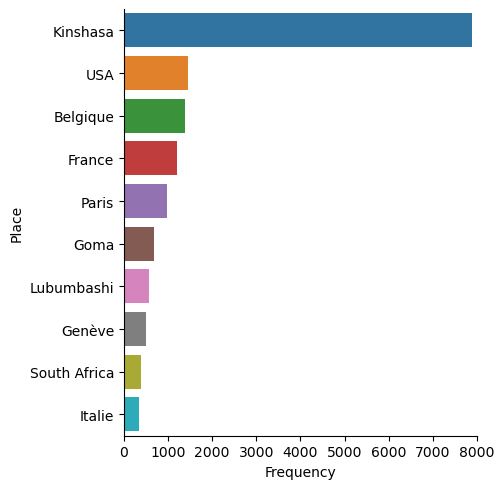

In [11]:
# Localisation des tweets

sns.catplot(data = location[1:11], y = "Place", x = "Frequency", kind = "bar")
plt.xlim(0,8000)
plt.savefig('tweets_location.png', bbox_inches = 'tight', pad_inches = .1);

# Analyse des sentiments

In [12]:
# Chargement des librairies

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob

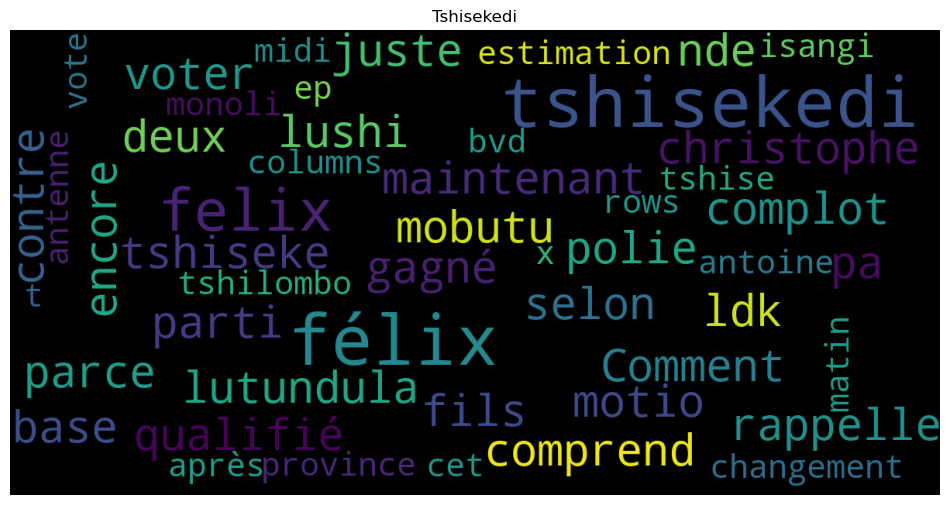

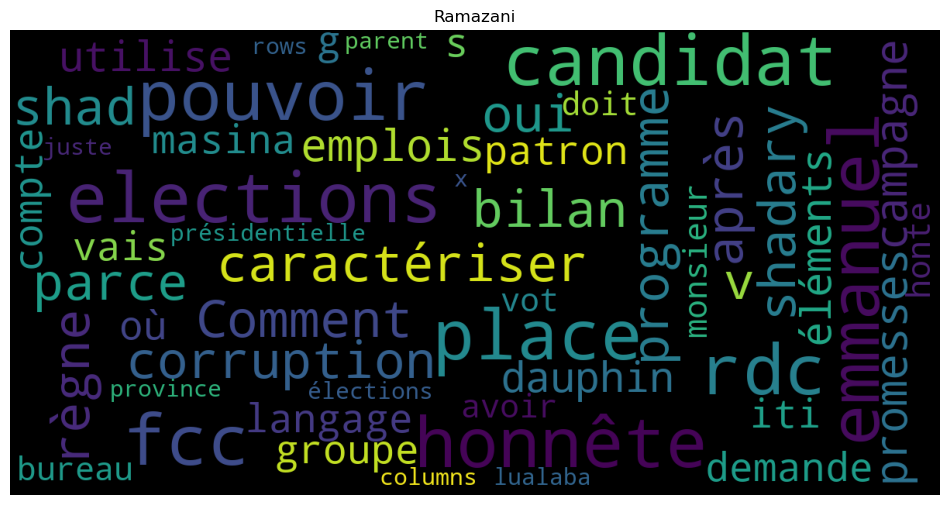

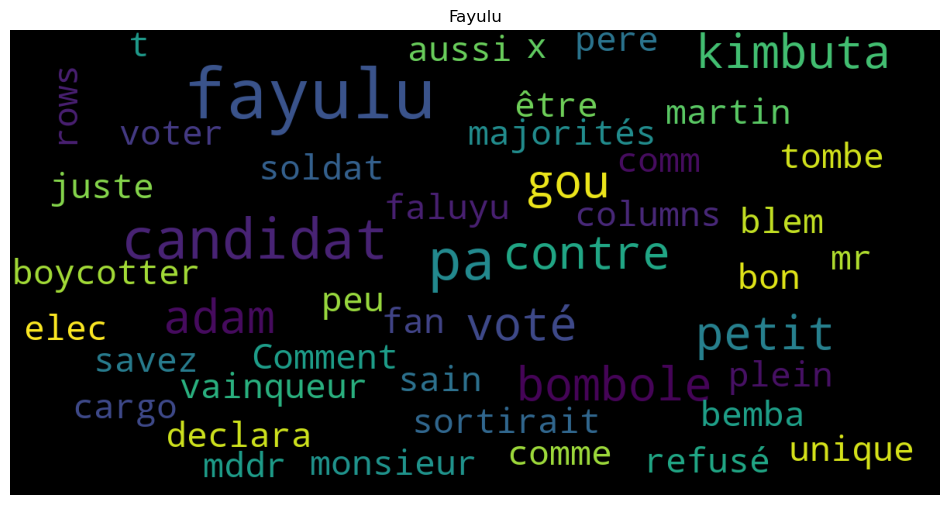

In [13]:
# Word cloud

def show_wordcloud(data, text):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize = (12,12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title(str(text))
    plt.show()

show_wordcloud(data = df.loc[df['Leader'] == 'Tshisekedi', ['Comment']], text = "Tshisekedi")
show_wordcloud(data = df.loc[df['Leader'] == 'Ramazani', ['Comment']], text = "Ramazani")
show_wordcloud(data = df.loc[df['Leader'] == 'Fayulu', ['Comment']], text = "Fayulu")

In [14]:
# Conversion des listes de mots-cles en string pour chaque document

warnings.filterwarnings('ignore')

for i in df.index:
    df["Comment"][i] = " ".join(df.Comment[i])

df.sample(10, random_state = 123)

Date                       UserName  \
27166 2018-12-10                    Piopoprince   
30770 2018-12-12                          Favor   
7827  2018-11-26                          TopFo   
42405 2018-12-19                            Mak   
55367 2018-12-30           Hemediselemani@yahoo   
42647 2018-12-19                   Yves MUYOMBO   
35716 2018-12-15  anthony micah kabongo katombe   
18935 2018-12-05                     fredluboya   
28168 2018-12-11           studiomototv@gmail.c   
23879 2018-12-08                   Nzola Kumeso   

                                                 Comment  Reply  Retweet  \
27166  emmanuel ramazani shadary futur président peup...      0        0   
30770  frère demandé pardon retirer parole fan comme ...      2        0   
7827   chairman voulez faire elections deux ans apres...      0        0   
42405  dis três chers collegue ensemble candidat plus...      0        0   
55367  frère aller vote numéro changement pay g fait ...      0        0   
42647  pendant félix tshisekedi vital kamerhe shadary...      0        0   
35716  quelle politique fayulu répondez ensuite débat...      0        0   
18935  arrêter metr poudr yeux pa régime place ki pre...      0        0   
28168  ajouté vidéo liste lecture réaction martin fay...      0        0   
23879  si fcc jete dévolu félix tshisekedi a fin camp...      0        0   

       Like  Quote   Creation                           Place  Followers  \
27166     0      0 2018-08-07  République Démocratique Du Con          0   
30770     1      0 2018-11-14                   Paris, France       1137   
7827      0      0 2009-07-27                  United Kingdom      27878   
42405     0      0 2018-12-10               Brasil  são paulo          0   
55367     0      0 2018-03-22                       Kinshasa          19   
42647     0      0 2011-02-15                      Everywhere        157   
35716     0      0 2010-10-25                 Kinshasa, Congo        769   
18935     0      0 2018-04-13                             NaN          1   
28168     0      0 2017-08-16                    kinshasa RDC         36   
23879     2      0 2017-03-27                             NaN         70   

           Leader  
27166    Ramazani  
30770      Fayulu  
7827       Fayulu  
42405  Tshisekedi  
55367      Fayulu  
42647  Tshisekedi  
35716      Fayulu  
18935    Ramazani  
28168      Fayulu  
23879  Tshisekedi

In [15]:
# Sentiment analysis

df[["Polarity", "Subjectivity"]] = df["Comment"].apply(lambda text: pd.Series(TextBlob(text).sentiment))
for index, row in df["Comment"].iteritems():
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    if neg > pos:
        df.loc[index, "Sentiment"] = "Negative"
    elif neg < pos:
        df.loc[index, "Sentiment"] = "Positive"
    else:
        df.loc[index, "Sentiment"] = "Neutral"

display(df["Sentiment"].value_counts(normalize = True))
display(df.sample(10, random_state = 123))

Neutral     0.683986
Negative    0.177787
Positive    0.138227
Name: Sentiment, dtype: float64

Date                       UserName  \
27166 2018-12-10                    Piopoprince   
30770 2018-12-12                          Favor   
7827  2018-11-26                          TopFo   
42405 2018-12-19                            Mak   
55367 2018-12-30           Hemediselemani@yahoo   
42647 2018-12-19                   Yves MUYOMBO   
35716 2018-12-15  anthony micah kabongo katombe   
18935 2018-12-05                     fredluboya   
28168 2018-12-11           studiomototv@gmail.c   
23879 2018-12-08                   Nzola Kumeso   

                                                 Comment  Reply  Retweet  \
27166  emmanuel ramazani shadary futur président peup...      0        0   
30770  frère demandé pardon retirer parole fan comme ...      2        0   
7827   chairman voulez faire elections deux ans apres...      0        0   
42405  dis três chers collegue ensemble candidat plus...      0        0   
55367  frère aller vote numéro changement pay g fait ...      0        0   
42647  pendant félix tshisekedi vital kamerhe shadary...      0        0   
35716  quelle politique fayulu répondez ensuite débat...      0        0   
18935  arrêter metr poudr yeux pa régime place ki pre...      0        0   
28168  ajouté vidéo liste lecture réaction martin fay...      0        0   
23879  si fcc jete dévolu félix tshisekedi a fin camp...      0        0   

       Like  Quote   Creation                           Place  Followers  \
27166     0      0 2018-08-07  République Démocratique Du Con          0   
30770     1      0 2018-11-14                   Paris, France       1137   
7827      0      0 2009-07-27                  United Kingdom      27878   
42405     0      0 2018-12-10               Brasil  são paulo          0   
55367     0      0 2018-03-22                       Kinshasa          19   
42647     0      0 2011-02-15                      Everywhere        157   
35716     0      0 2010-10-25                 Kinshasa, Congo        769   
18935     0      0 2018-04-13                             NaN          1   
28168     0      0 2017-08-16                    kinshasa RDC         36   
23879     2      0 2017-03-27                             NaN         70   

           Leader  Polarity  Subjectivity Sentiment  
27166    Ramazani       0.0           0.0  Positive  
30770      Fayulu       0.0           0.0  Positive  
7827       Fayulu       0.0           0.0   Neutral  
42405  Tshisekedi       0.0           0.0   Neutral  
55367      Fayulu       0.0           0.0  Negative  
42647  Tshisekedi       0.1           0.4  Positive  
35716      Fayulu       0.0           0.0   Neutral  
18935    Ramazani       0.0           0.0   Neutral  
28168      Fayulu       0.0           0.0   Neutral  
23879  Tshisekedi       0.0           0.0   Neutral

In [121]:
# Save the cleaned data

# df.Date = pd.to_datetime(df.Date).dt.date
# df.Creation = pd.to_datetime(df.Creation).dt.date
# df.to_excel('Cleaned Data.xlsx', sheet_name = '2018', header = True)

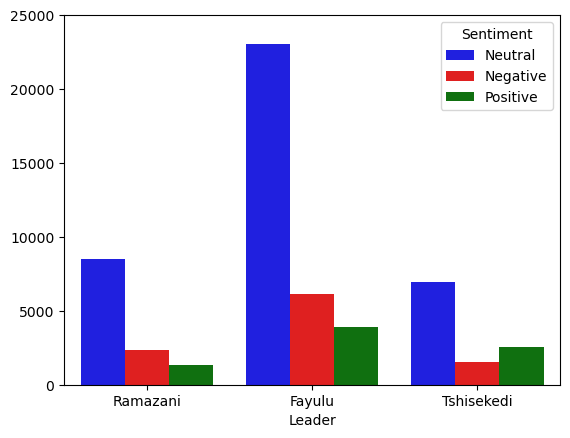

In [16]:
# Sentiment plot (1/4)

#plt.style.use('classic')
sns.countplot(data=df, x='Leader', hue='Sentiment', palette=['blue','red','green'])
plt.ylim(0,25000)
plt.ylabel('');

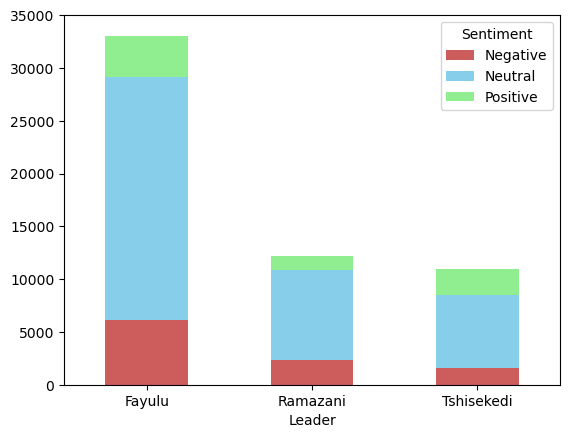

In [17]:
# Sentiment plot (2/4)

data_pivot = df.pivot_table(values = 'Quote', index='Leader', columns='Sentiment', aggfunc = "count")
data_pivot.plot(kind = 'bar', stacked = True, color = ['indianred', 'skyblue', 'lightgreen'])
#plt.title('Cumulative number of tweets by sentiment type per leader', fontsize = 9, fontstyle = 'oblique', weight = 'bold')
plt.xticks(rotation = 360)
plt.ylim(0, 35000)
plt.savefig('cumulative_number_of_tweets_following_the_sentiment_nature.png', bbox_inches = 'tight', pad_inches = .1);

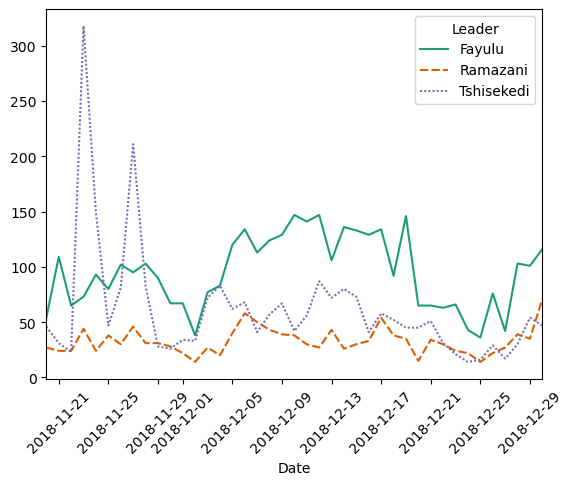

In [18]:
# Sentiment plot (3/4)

sns.lineplot(data = df.loc[df['Sentiment'] == 'Positive'].pivot_table(values = "Quote", columns = "Leader",
                                                                      index = "Date", aggfunc = "count"),
             palette = 'Dark2')
#plt.title('Evolution du nombre de tweets positifs par leader')
plt.xticks(rotation=45)
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.savefig('evolution_of_the_number_of_positive_tweets.png', bbox_inches = 'tight', pad_inches = .1);

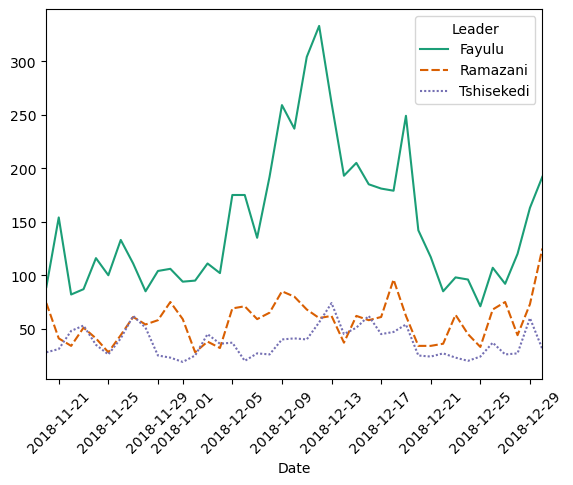

In [19]:
# Sentiment plot (4/4)

sns.lineplot(data = df.loc[df['Sentiment'] == 'Negative'].pivot_table(values = "Quote", columns = "Leader",
                                                                      index = "Date", aggfunc = "count"),
             palette = 'Dark2')
#plt.title('Evolution du nombre de tweets négatifs par leader')
plt.xticks(rotation=45)
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.savefig('evolution_of_the_number_of_negative_tweets.png', bbox_inches = 'tight', pad_inches = .1);

Polarity  Subjectivity
Sentiment                        
Negative  -0.040804      0.116449
Neutral   -0.017540      0.056012
Positive   0.133252      0.353203

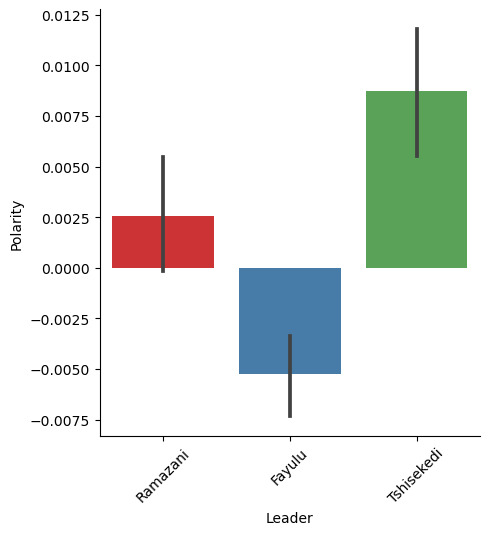

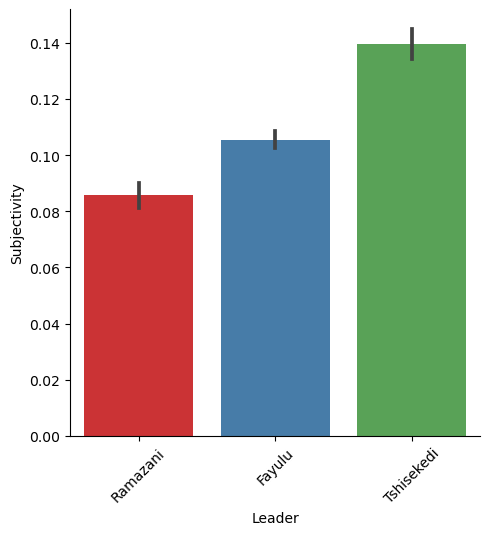

In [20]:
# Polarity vs Subjectivity

display(df[['Polarity', 'Subjectivity', 'Sentiment']].groupby("Sentiment").mean())
sns.catplot(data = df, x = "Leader", y = "Polarity", kind = "bar", palette='Set1').set_xticklabels(rotation = 45)
plt.savefig('polarity_plot.png', bbox_inches = 'tight', pad_inches = .1)
sns.catplot(data = df, x = "Leader", y = "Subjectivity", kind = "bar", palette='Set1').set_xticklabels(rotation = 45)
plt.savefig('subjectivity_plot.png', bbox_inches = 'tight', pad_inches = .1);

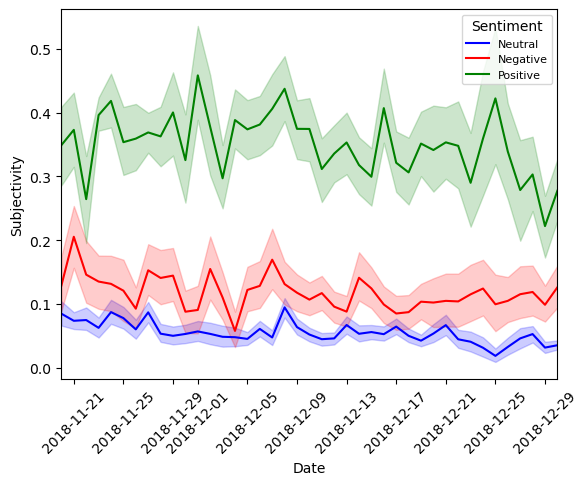

In [21]:
# Subjectivity dynamics by sentiment type

sns.lineplot(data=df, x='Date', y='Subjectivity', hue='Sentiment', palette=['blue','red','green'])#.axhline(0.353203, color='red', linestyle="dotted")
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.legend(fontsize=8, title='Sentiment')
plt.xticks(rotation=45)
plt.savefig('subjectivity_per_sentiment.png', bbox_inches = 'tight', pad_inches = .1);

# Indices de popularité

In [22]:
# Fonction de comptage des tweets

start_date = date(2018, 11, 20)
end_date = date(2018, 12, 31)
time_window = range(int((end_date - start_date).days))
df['Period'] = df['Date'].replace(list(df.Date.unique()), list(time_window))

def number_of_tweets(sentiment, leader, time, dataset):
    number = len(dataset[(dataset['Sentiment']==str(sentiment)) &
                         (dataset['Leader']==str(leader)) &
                         (dataset['Period']==int(time))])
    return number

## Indices non-pénalisés

### Indice de Tumasjan et al. (2011)

In [23]:
# Calcul de l'indice TSSW

number_of_tweets_by_leader = df.groupby('Leader').size()
candidate = number_of_tweets_by_leader.index

TSSW_Fayulu = []
TSSW_Ramazani = []
TSSW_Tshisekedi = []

for p in list(df.Period.unique()):
    TSSW_Fayulu.append((number_of_tweets(sentiment='Positive', leader='Fayulu', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Ramazani', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df)))
    TSSW_Ramazani.append((number_of_tweets(sentiment='Positive', leader='Ramazani', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Fayulu', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df)))
    TSSW_Tshisekedi.append((number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Ramazani', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Fayulu', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df)))
    data_TSSW = [TSSW_Fayulu, TSSW_Ramazani, TSSW_Tshisekedi]

In [24]:
# Normalisation de l'indice

all_data_TSSW = np.array(data_TSSW)

Fayulu_TSSW = []
Ramazani_TSSW = []
Tshisekedi_TSSW = []

for i in list(df.Period.unique()):
    Fayulu_TSSW.append(TSSW_Fayulu[i]/all_data_TSSW[:,i].sum())
    Ramazani_TSSW.append(TSSW_Ramazani[i]/all_data_TSSW[:,i].sum())
    Tshisekedi_TSSW.append(TSSW_Tshisekedi[i]/all_data_TSSW[:,i].sum())
    TSSW_dataset = [Fayulu_TSSW, Ramazani_TSSW, Tshisekedi_TSSW]

TSSW_dataset = pd.DataFrame(TSSW_dataset, columns=df.Date.unique(), index=candidate).T
TSSW_dataset.columns.names = [""]
TSSW_dataset.index.names = ["Date"]
TSSW_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-20 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      41 non-null     float64
 1   Ramazani    41 non-null     float64
 2   Tshisekedi  41 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


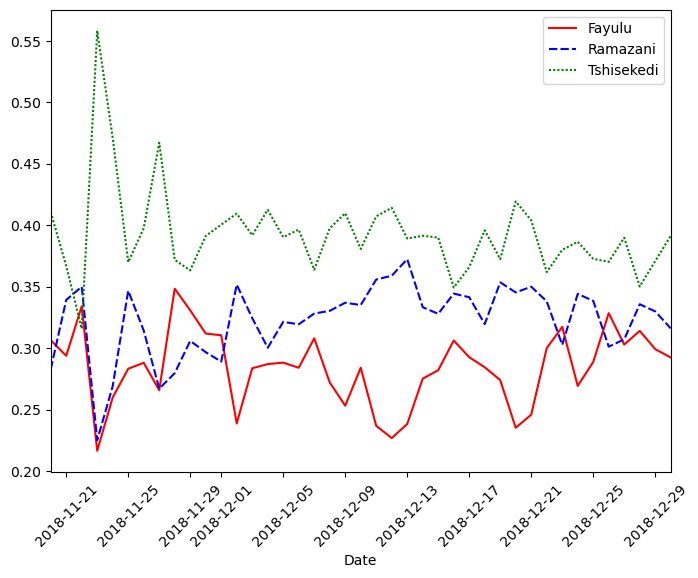

In [25]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = TSSW_dataset, palette = ['red','blue','green'])
#plt.title('Dynamique de popularité des leaders \nIndice TSSW', loc='left')
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=45)
plt.savefig('popularity_dynamics_of_leaders_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

### Indice de Wang & Gan (2017)

In [26]:
# Calcul de l'indice WG

N = pd.DataFrame(df.groupby(['Period', 'Leader']).size(), columns=['N'])    # N is the daily total number of tweets per leader
N.reset_index(inplace=True)
candidate = N.Leader.unique()

WG_Fayulu = []
WG_Ramazani = []
WG_Tshisekedi = []

for p in list(df.Period.unique()):
    WG_Fayulu.append((number_of_tweets(sentiment='Positive', leader='Fayulu', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Fayulu', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Fayulu', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Fayulu') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))
    WG_Ramazani.append((number_of_tweets(sentiment='Positive', leader='Ramazani', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Ramazani', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Ramazani', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Ramazani') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))
    WG_Tshisekedi.append((number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Tshisekedi') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))
    data_WG = [WG_Fayulu, WG_Ramazani, WG_Tshisekedi]

In [27]:
# Normalisation de l'indice

all_data_WG = np.array(data_WG)

Fayulu_WG = []
Ramazani_WG = []
Tshisekedi_WG = []

for i in list(df.Period.unique()):
    Fayulu_WG.append(WG_Fayulu[i]/all_data_WG[:,i].sum())
    Ramazani_WG.append(WG_Ramazani[i]/all_data_WG[:,i].sum())
    Tshisekedi_WG.append(WG_Tshisekedi[i]/all_data_WG[:,i].sum())
    WG_dataset = [Fayulu_WG, Ramazani_WG, Tshisekedi_WG]

WG_dataset = pd.DataFrame(WG_dataset, columns=df.Date.unique(), index=candidate).T
WG_dataset.columns.names = [""]
WG_dataset.index.names = ["Date"]
WG_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-20 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      41 non-null     float64
 1   Ramazani    41 non-null     float64
 2   Tshisekedi  41 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


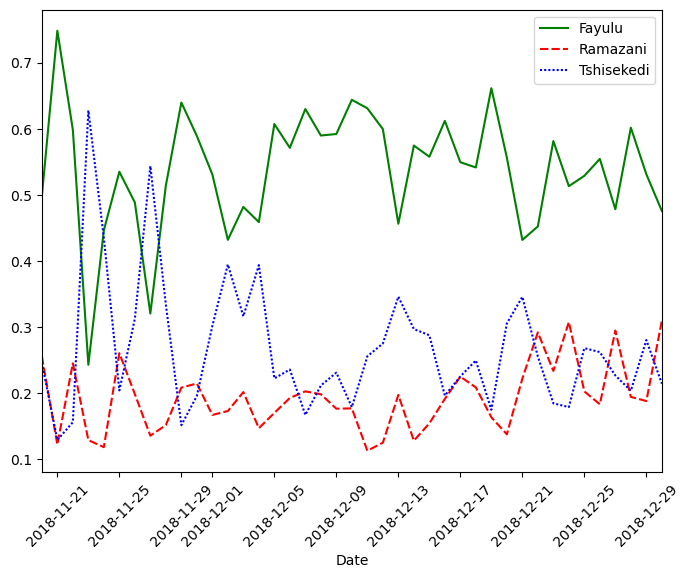

In [28]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = WG_dataset, palette = ['green','red','blue'])
#plt.title('Dynamique de popularité des leaders \nIndice WG', loc='left')
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=45)
plt.savefig('popularity_dynamics_of_leaders_WG.png', bbox_inches = 'tight', pad_inches = .1);

### Indice de Hassanpour et al. (2022)

In [29]:
# Calcul de l'indice HRM

HRM_Fayulu = []
HRM_Ramazani = []
HRM_Tshisekedi = []

period = list(df.Period.unique())

for p in period[:40]:
    HRM_Fayulu.append(number_of_tweets(sentiment='Positive',
                                       leader='Fayulu',
                                       time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                            leader='Fayulu',
                                                                            time=p+1, dataset=df))
    HRM_Ramazani.append(number_of_tweets(sentiment='Positive',
                                         leader='Ramazani',
                                         time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                              leader='Ramazani',
                                                                              time=p+1, dataset=df))
    HRM_Tshisekedi.append(number_of_tweets(sentiment='Positive',
                                           leader='Tshisekedi',
                                           time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                                leader='Tshisekedi',
                                                                                time=p+1, dataset=df))
    data_HRM = [HRM_Fayulu, HRM_Ramazani, HRM_Tshisekedi]

In [30]:
# Normalisation de l'indice

number_of_tweets_by_leader = df.groupby('Leader').size()
candidate = number_of_tweets_by_leader.index
start_date = date(2018, 11, 21)
end_date = date(2018, 12, 30)
delta = timedelta(days=1)
dates = []
while start_date <= end_date:
    dates.append(start_date.isoformat())
    start_date += delta

all_data_HRM = np.array(data_HRM)

Fayulu_HRM = []
Ramazani_HRM = []
Tshisekedi_HRM = []

for i in period[:40]:
    Fayulu_HRM.append(HRM_Fayulu[i]/all_data_HRM[:,i].sum())
    Ramazani_HRM.append(HRM_Ramazani[i]/all_data_HRM[:,i].sum())
    Tshisekedi_HRM.append(HRM_Tshisekedi[i]/all_data_HRM[:,i].sum())
    HRM_dataset = [Fayulu_HRM, Ramazani_HRM, Tshisekedi_HRM]

HRM_dataset = pd.DataFrame(HRM_dataset, columns = dates, index = candidate).T
HRM_dataset.columns.names = [""]
HRM_dataset.index.names = ["Date"]
HRM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2018-11-21 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      40 non-null     float64
 1   Ramazani    40 non-null     float64
 2   Tshisekedi  40 non-null     float64
dtypes: float64(3)
memory usage: 1.2+ KB


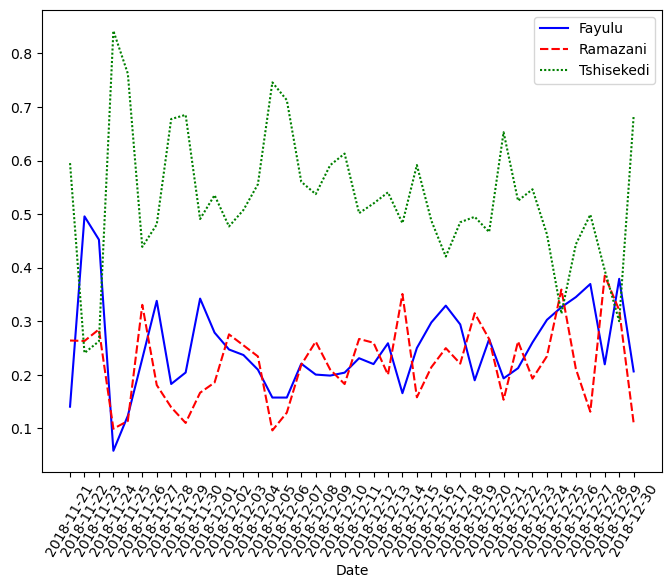

In [31]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = HRM_dataset, palette = ['blue','red','green'])
#plt.title('Dynamique de popularité des leaders \nIndice HRM', loc='left')
#plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=60)
plt.savefig('popularity_dynamics_of_leaders_HRM.png', bbox_inches = 'tight', pad_inches = .1);

## Indices pénalisés

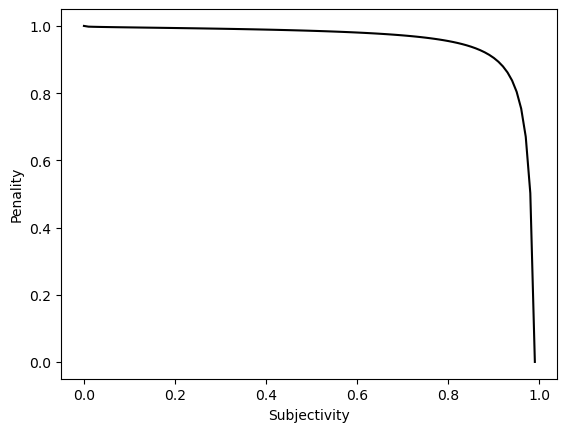

In [32]:
# Simulation de la fonction de penalization

x_values = np.linspace(start=0, stop=.99, num=100)
y_values = 1/np.log(x_values)
y_values_scaled = (y_values - y_values.min())/(y_values.max() - y_values.min())
plt.plot(x_values, y_values_scaled, color = 'black')
plt.xlabel('Subjectivity')
plt.ylabel('Penality')
plt.savefig('penalization_function.png', bbox_inches = 'tight', pad_inches = .1);

In [33]:
# Facteur de penalization

from sklearn.preprocessing import MinMaxScaler

subjectivity_mean = df.pivot_table(values='Subjectivity', index='Date', columns='Leader', aggfunc='mean')
penality = MinMaxScaler(feature_range=(0,1)).fit_transform(1/(np.log(subjectivity_mean)))
penality = pd.DataFrame(penality, index=subjectivity_mean.index, columns=subjectivity_mean.columns)
penality

Leader        Fayulu  Ramazani  Tshisekedi
Date                                      
2018-11-20  0.335527  0.590478    0.000000
2018-11-21  0.444456  0.622319    0.233790
2018-11-22  0.604310  0.393675    0.578868
2018-11-23  0.256082  0.177610    0.129760
2018-11-24  0.064129  0.327711    0.152650
2018-11-25  0.414542  0.316564    0.433205
2018-11-26  0.453581  0.608082    0.524553
2018-11-27  0.338467  0.072499    0.269731
2018-11-28  0.424287  0.203672    0.561813
2018-11-29  0.572358  0.405314    0.363459
2018-11-30  0.815647  0.445381    0.587885
2018-12-01  0.577177  0.234974    0.522304
2018-12-02  0.551403  0.338681    0.674869
2018-12-03  0.724035  0.591083    0.463854
2018-12-04  0.662199  0.622246    0.356018
2018-12-05  0.729205  0.444964    0.452739
2018-12-06  0.462333  0.284221    0.541857
2018-12-07  0.549610  0.000000    0.687234
2018-12-08  0.000000  0.461948    0.387995
2018-12-09  0.515421  0.367807    0.530863
2018-12-10  0.516205  0.674750    0.771735
2018-12-11  0.754038  0.858185    0.739697
2018-12-12  0.783298  0.687938    0.643052
2018-12-13  0.557364  0.388052    0.662076
2018-12-14  0.664751  0.288344    0.579262
2018-12-15  0.607675  0.450947    0.712648
2018-12-16  0.522005  0.368492    0.688182
2018-12-17  0.611923  0.296019    0.669847
2018-12-18  0.746858  0.642298    0.807976
2018-12-19  0.681091  0.569919    0.929014
2018-12-20  0.706630  0.448457    0.704425
2018-12-21  0.534225  0.362572    0.526118
2018-12-22  0.586001  0.281445    0.876356
2018-12-23  0.587206  0.764781    0.690783
2018-12-24  0.565465  0.512611    0.848614
2018-12-25  0.817597  1.000000    0.637979
2018-12-26  0.574644  0.576320    0.866363
2018-12-27  0.748667  0.429445    0.791635
2018-12-28  0.610661  0.303363    0.895771
2018-12-29  1.000000  0.567151    1.000000
2018-12-30  0.931956  0.698860    0.863140

### Indice de Tumasjan et al. (2011)

In [34]:
# Calcul de l'indice TSSW

number_of_tweets_by_leader = df.groupby('Leader').size()
candidate = number_of_tweets_by_leader.index

TSSW_Fayulu_P = []
TSSW_Ramazani_P = []
TSSW_Tshisekedi_P = []

for p in list(df.Period.unique()):
    TSSW_Fayulu_P.append((number_of_tweets(sentiment='Positive', leader='Fayulu', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Ramazani', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df))*penality.Fayulu[p])
    TSSW_Ramazani_P.append((number_of_tweets(sentiment='Positive', leader='Ramazani', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Fayulu', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df))*penality.Ramazani[p])
    TSSW_Tshisekedi_P.append((number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p, dataset=df) + 
                       number_of_tweets(sentiment='Negative', leader='Ramazani', time=p, dataset=df) +
                       number_of_tweets(sentiment='Negative', leader='Fayulu', time=p,
                                        dataset=df))/(number_of_tweets(sentiment='Positive', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Fayulu',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Ramazani',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Positive', leader='Tshisekedi',
                                                                     time=p, dataset=df) + 
                                                    number_of_tweets(sentiment='Negative', leader='Tshisekedi',
                                                                     time=p, dataset=df))*penality.Tshisekedi[p])
    data_TSSW_P = [TSSW_Fayulu_P, TSSW_Ramazani_P, TSSW_Tshisekedi_P]

In [35]:
# Normalisation de l'indice

all_data_TSSW_P = np.array(data_TSSW_P)

Fayulu_TSSW_P = []
Ramazani_TSSW_P = []
Tshisekedi_TSSW_P = []

for i in list(df.Period.unique()):
    Fayulu_TSSW_P.append(TSSW_Fayulu_P[i]/all_data_TSSW_P[:,i].sum())
    Ramazani_TSSW_P.append(TSSW_Ramazani_P[i]/all_data_TSSW_P[:,i].sum())
    Tshisekedi_TSSW_P.append(TSSW_Tshisekedi_P[i]/all_data_TSSW_P[:,i].sum())
    TSSW_dataset_P = [Fayulu_TSSW_P, Ramazani_TSSW_P, Tshisekedi_TSSW_P]

TSSW_dataset_P = pd.DataFrame(TSSW_dataset_P, columns=df.Date.unique(), index=candidate).T
TSSW_dataset_P.columns.names = [""]
TSSW_dataset_P.index.names = ["Date"]
TSSW_dataset_P.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-20 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      41 non-null     float64
 1   Ramazani    41 non-null     float64
 2   Tshisekedi  41 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


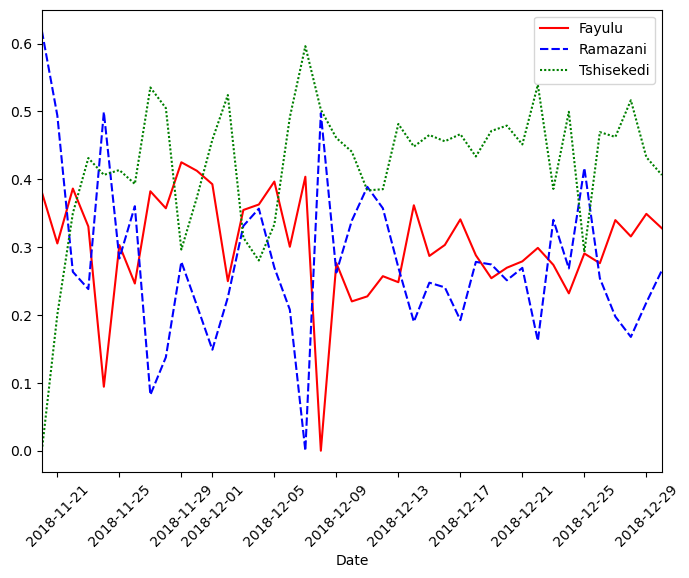

In [36]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = TSSW_dataset_P, palette = ['red','blue','green'])
#plt.title('Dynamique de popularité des leaders \nIndice TSSW', loc='left')
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=45)
plt.savefig('popularity_dynamics_of_leaders_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);

### Indice de Wang & Gan (2017)

In [37]:
# Calcul de l'indice WG

N = pd.DataFrame(df.groupby(['Period', 'Leader']).size(), columns=['N'])    # N is the daily total number of tweets per leader
N.reset_index(inplace=True)
candidate = N.Leader.unique()

WG_Fayulu_P = []
WG_Ramazani_P = []
WG_Tshisekedi_P = []

for p in list(df.Period.unique()):
    WG_Fayulu_P.append(((number_of_tweets(sentiment='Positive', leader='Fayulu', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Fayulu', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Fayulu', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Fayulu') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))*penality.Fayulu[p])
    WG_Ramazani_P.append(((number_of_tweets(sentiment='Positive', leader='Ramazani', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Ramazani', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Ramazani', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Ramazani') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))*penality.Ramazani[p])
    WG_Tshisekedi_P.append(((number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p,
                                      dataset=df)/(number_of_tweets(sentiment='Negative', leader='Tshisekedi', time=p,
                                                                    dataset=df) +
                                                   number_of_tweets(sentiment='Positive', leader='Tshisekedi', time=p,
                                                                    dataset=df)))*float(N[(N['Leader'] == 'Tshisekedi') & (N['Period'] == p)].N/N[N['Period'] == p].sum().N))*penality.Tshisekedi[p])
    data_WG_P = [WG_Fayulu_P, WG_Ramazani_P, WG_Tshisekedi_P]

In [38]:
# Normalisation de l'indice

all_data_WG_P = np.array(data_WG_P)

Fayulu_WG_P = []
Ramazani_WG_P = []
Tshisekedi_WG_P = []

for i in list(df.Period.unique()):
    Fayulu_WG_P.append(WG_Fayulu_P[i]/all_data_WG_P[:,i].sum())
    Ramazani_WG_P.append(WG_Ramazani_P[i]/all_data_WG_P[:,i].sum())
    Tshisekedi_WG_P.append(WG_Tshisekedi_P[i]/all_data_WG_P[:,i].sum())
    WG_dataset_P = [Fayulu_WG_P, Ramazani_WG_P, Tshisekedi_WG_P]

WG_dataset_P = pd.DataFrame(WG_dataset_P, columns=df.Date.unique(), index=candidate).T
WG_dataset_P.columns.names = [""]
WG_dataset_P.index.names = ["Date"]
WG_dataset_P.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-20 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      41 non-null     float64
 1   Ramazani    41 non-null     float64
 2   Tshisekedi  41 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


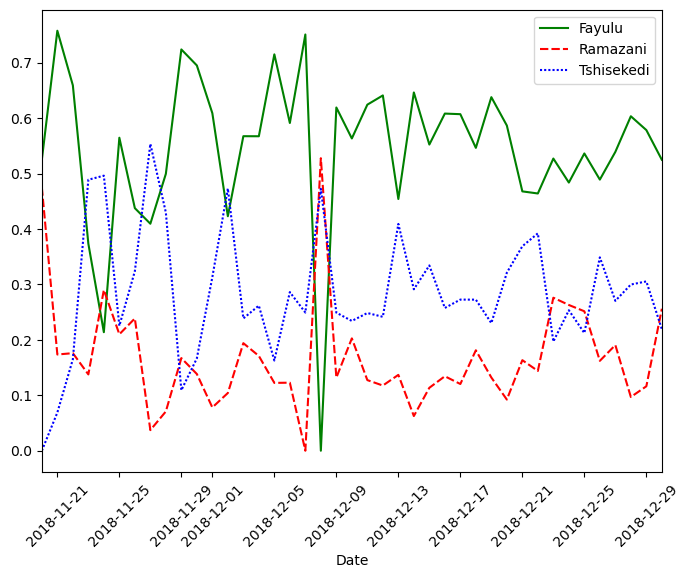

In [39]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = WG_dataset_P, palette = ['green','red','blue'])
#plt.title('Dynamique de popularité des leaders \nIndice WG', loc='left')
plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=45)
plt.savefig('popularity_dynamics_of_leaders_WG_P.png', bbox_inches = 'tight', pad_inches = .1);

### Indice de Hassanpour et al. (2022)

In [40]:
# Calcul de l'indice HRM

HRM_Fayulu_P = []
HRM_Ramazani_P = []
HRM_Tshisekedi_P = []

period = list(df.Period.unique())

for p in period[:40]:
    HRM_Fayulu_P.append((number_of_tweets(sentiment='Positive',
                                       leader='Fayulu',
                                       time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                            leader='Fayulu',
                                                                            time=p+1, dataset=df))*penality.Fayulu[p])
    HRM_Ramazani_P.append((number_of_tweets(sentiment='Positive',
                                         leader='Ramazani',
                                         time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                              leader='Ramazani',
                                                                              time=p+1, dataset=df))*penality.Ramazani[p])
    HRM_Tshisekedi_P.append((number_of_tweets(sentiment='Positive',
                                           leader='Tshisekedi',
                                           time=p, dataset=df)/number_of_tweets(sentiment='Negative',
                                                                                leader='Tshisekedi',
                                                                                time=p+1, dataset=df))*penality.Tshisekedi[p])
    data_HRM_P = [HRM_Fayulu_P, HRM_Ramazani_P, HRM_Tshisekedi_P]

In [41]:
# Normalisation de l'indice

number_of_tweets_by_leader = df.groupby('Leader').size()
candidate = number_of_tweets_by_leader.index
start_date = date(2018, 11, 21)
end_date = date(2018, 12, 30)
delta = timedelta(days=1)
dates = []
while start_date <= end_date:
    dates.append(start_date.isoformat())
    start_date += delta

all_data_HRM_P = np.array(data_HRM_P)

Fayulu_HRM_P = []
Ramazani_HRM_P = []
Tshisekedi_HRM_P = []

for i in period[:40]:
    Fayulu_HRM_P.append(HRM_Fayulu_P[i]/all_data_HRM_P[:,i].sum())
    Ramazani_HRM_P.append(HRM_Ramazani_P[i]/all_data_HRM_P[:,i].sum())
    Tshisekedi_HRM_P.append(HRM_Tshisekedi_P[i]/all_data_HRM_P[:,i].sum())
    HRM_dataset_P = [Fayulu_HRM_P, Ramazani_HRM_P, Tshisekedi_HRM_P]

HRM_dataset_P = pd.DataFrame(HRM_dataset_P, columns = dates, index = candidate).T
HRM_dataset_P.columns.names = [""]
HRM_dataset_P.index.names = ["Date"]
HRM_dataset_P.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2018-11-21 to 2018-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fayulu      40 non-null     float64
 1   Ramazani    40 non-null     float64
 2   Tshisekedi  40 non-null     float64
dtypes: float64(3)
memory usage: 1.2+ KB


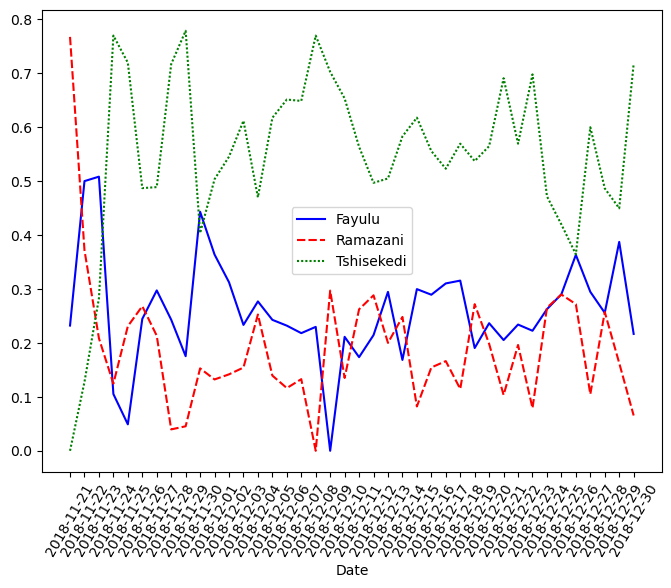

In [42]:
# Dynamique de popularité des leaders

plt.figure(figsize=[8,6])
sns.lineplot(data = HRM_dataset_P, palette = ['blue','red','green'])
#plt.title('Dynamique de popularité des leaders \nIndice HRM', loc='left')
#plt.xlim([datetime.date(2018, 11, 20), datetime.date(2018, 12, 30)])
plt.xticks(rotation=60)
plt.savefig('popularity_dynamics_of_leaders_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);

# Prédiction des résultats électoraux

In [47]:
# Chargement des libraires de Time Series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

#!pip install pmdarima                  # auto-arima fitting
from pmdarima.utils import tsdisplay
import pmdarima as pm

In [48]:
# Standardizer function

def standardizer(x, y, z):
    x_s = x/(x+y+z)
    y_s = y/(x+y+z)
    z_s = z/(x+y+z)
    return {'Fayulu':x_s, 'Ramazani':y_s, 'Tshisekedi':z_s}

In [49]:
# Accuracy function

def accuracy_score(predicted, observed):
    accuracy = 1 - np.mean((abs(predicted - observed)/observed))
    return accuracy

## Résultats sans pénalisation

### Indice TSSW

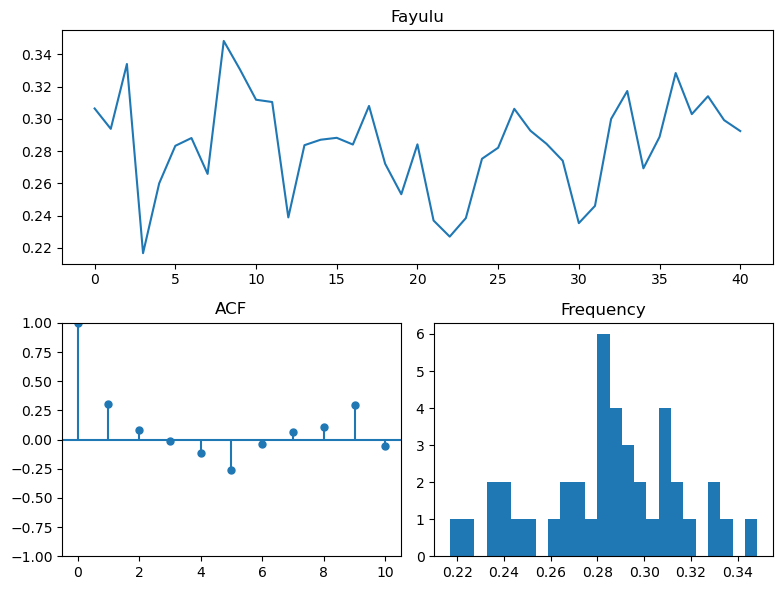

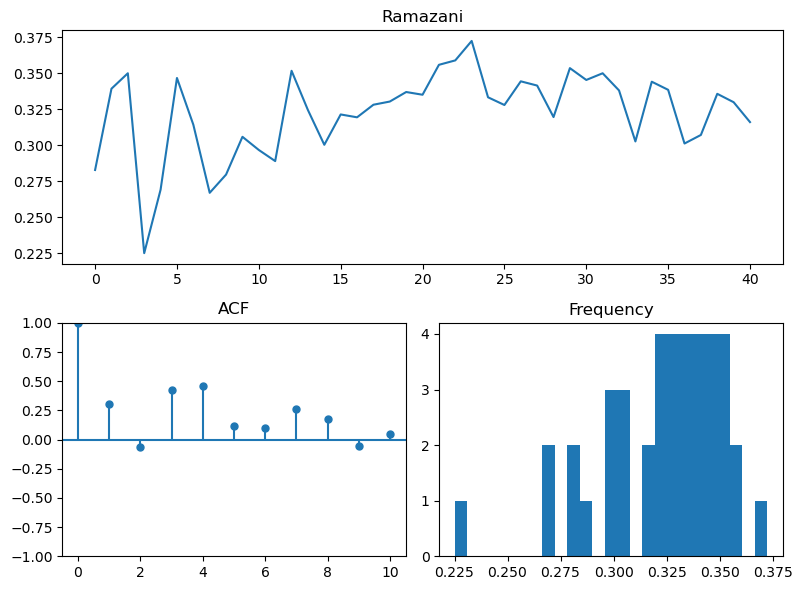

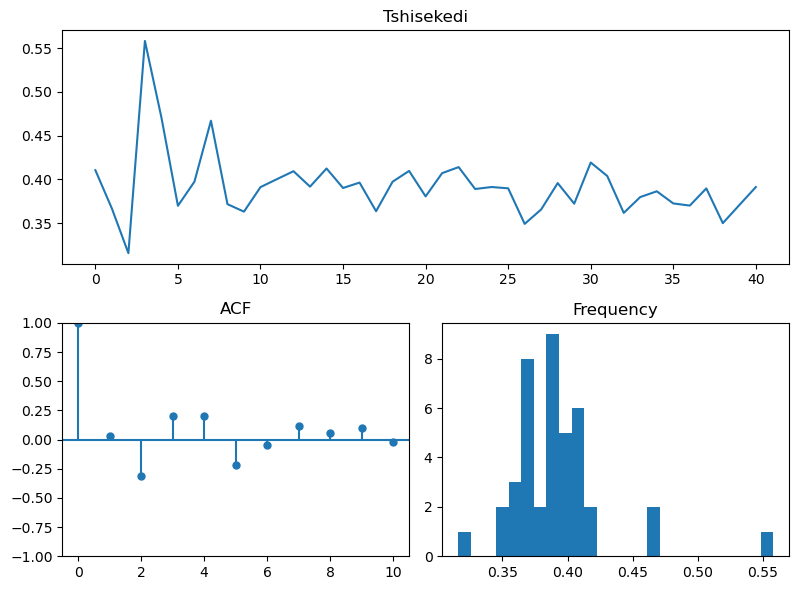

In [50]:
# Series en niveau

tsdisplay(TSSW_dataset.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(TSSW_dataset.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(TSSW_dataset.Tshisekedi, lag_max=10, title='Tshisekedi');

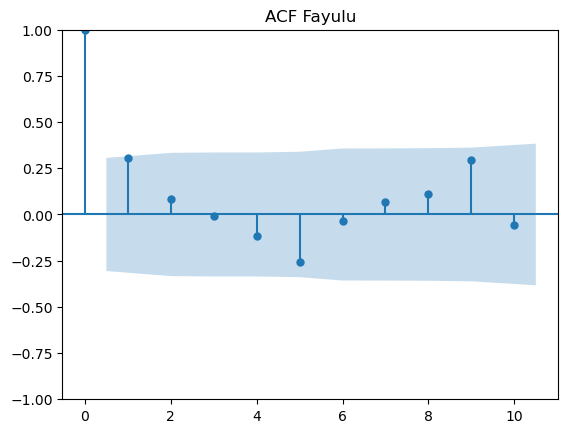

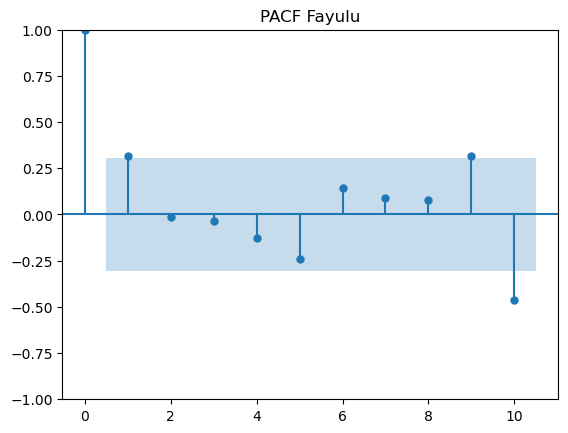

In [51]:
# Corrélogrammes Fayulu

plot_acf(TSSW_dataset.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_TSSW.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

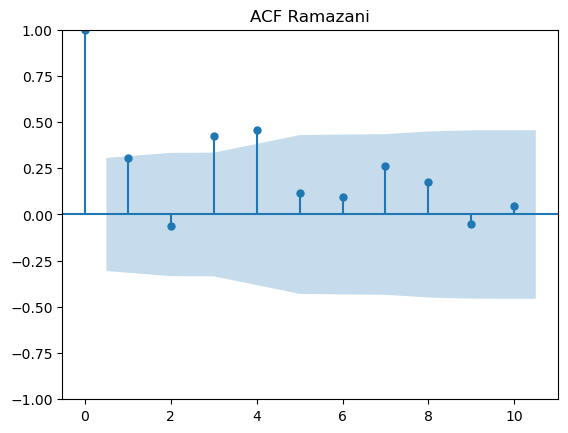

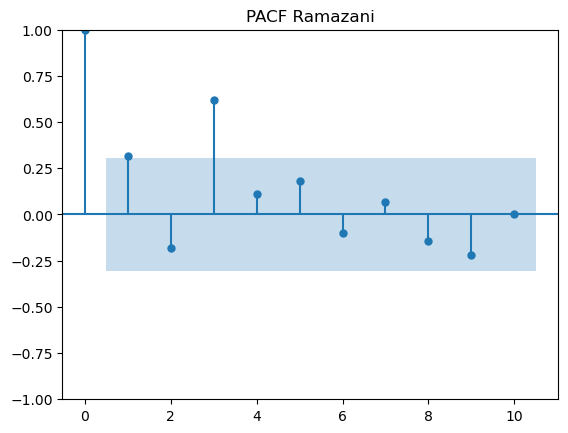

In [52]:
# Corrélogrammes Ramazani

plot_acf(TSSW_dataset.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_TSSW.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

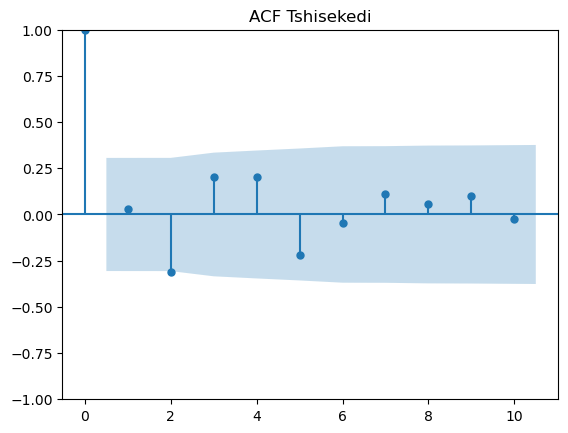

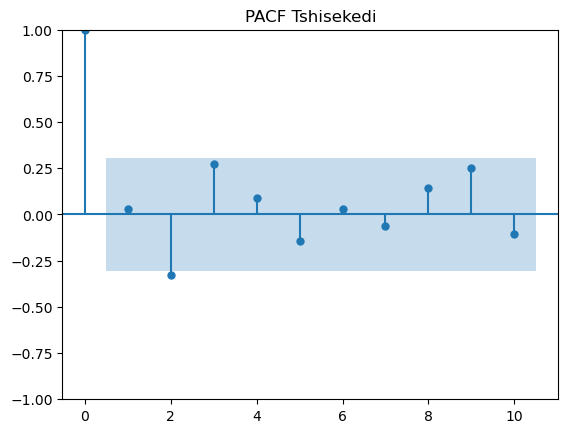

In [53]:
# Corrélogrammes Tshisekedi

plot_acf(TSSW_dataset.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_TSSW.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

In [54]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(TSSW_dataset.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(TSSW_dataset.Ramazani, regression ='ctt')
unit_root_test_tshisekedi = adfuller(TSSW_dataset.Tshisekedi, regression ='ct')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_TSSW = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_TSSW

Fayulu      Ramazani  Tshisekedi
ADF stats -1.382439 -7.300336e+00   -3.622348
P-value    0.590665  1.599762e-08    0.028008

In [55]:
# ARIMA models

auto_arima_fayulu_TSSW = pm.auto_arima(TSSW_dataset.Fayulu, seasonal=False)
auto_arima_ramazani_TSSW = pm.auto_arima(TSSW_dataset.Ramazani, seasonal=False)
auto_arima_tshisekedi_TSSW = pm.auto_arima(TSSW_dataset.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_TSSW.summary())
display('Ramazani', auto_arima_ramazani_TSSW.summary())
display('Tshisekedi', auto_arima_tshisekedi_TSSW.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  87.330
Date:                Sun, 28 May 2023   AIC                           -168.659
Time:                        22:00:51   BIC                           -163.519
Sample:                    11-20-2018   HQIC                          -166.787
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1973      0.048      4.107      0.000       0.103       0.291
ar.L1          0.3071      0.167      1.837      0.066      -0.021       0.635
sigma2         0.0008      0.000      4.308      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.98   Prob(JB):                         0.28
Heteroskedasticity (H):               0.39   Skew:                            -0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  94.889
Date:                Sun, 28 May 2023   AIC                           -181.778
Time:                        22:00:51   BIC                           -175.023
Sample:                    11-20-2018   HQIC                          -179.336
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1588      0.318     -0.499      0.618      -0.783       0.465
ar.L2         -0.6788      0.237     -2.861      0.004      -1.144      -0.214
ma.L1         -0.4059      0.307     -1.320      0.187      -1.008       0.197
sigma2         0.0005      0.000      4.159      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                17.95
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.66
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  78.362
Date:                Sun, 28 May 2023   AIC                           -146.725
Time:                        22:00:51   BIC                           -138.281
Sample:                    11-20-2018   HQIC                          -143.672
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0017      0.001     -1.717      0.086      -0.004       0.000
ar.L1         -0.0958      0.174     -0.549      0.583      -0.437       0.246
ar.L2         -0.4515      0.188     -2.398      0.016      -0.821      -0.082
ma.L1         -0.9789      0.945     -1.036      0.300      -2.831       0.874
sigma2         0.0011      0.001      1.107      0.268      -0.001       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               213.00
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             2.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

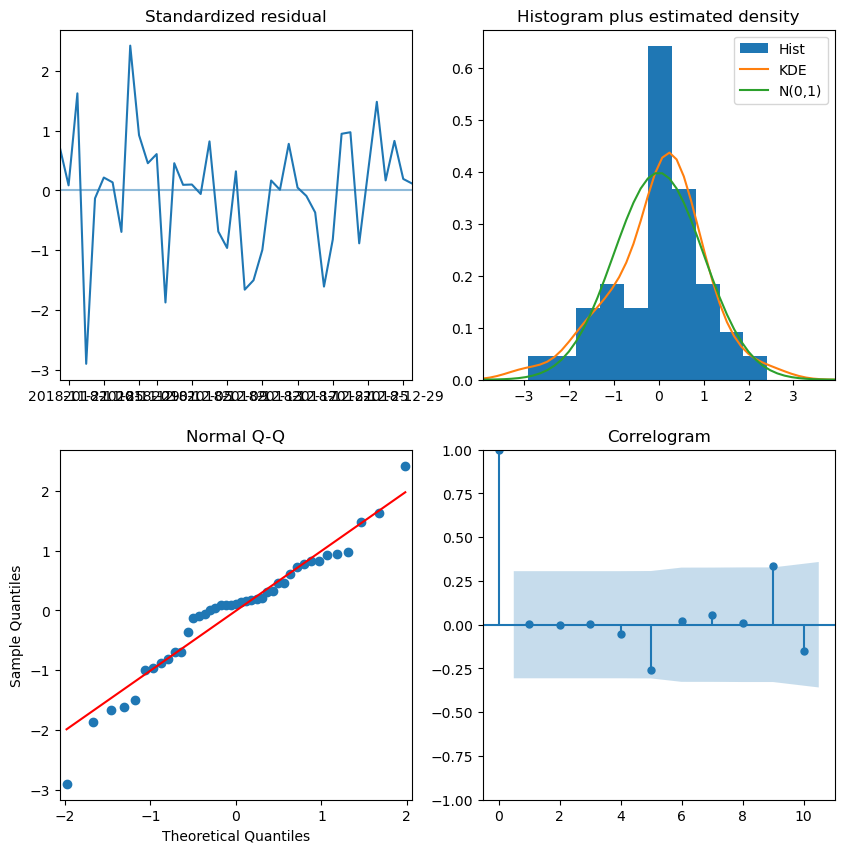

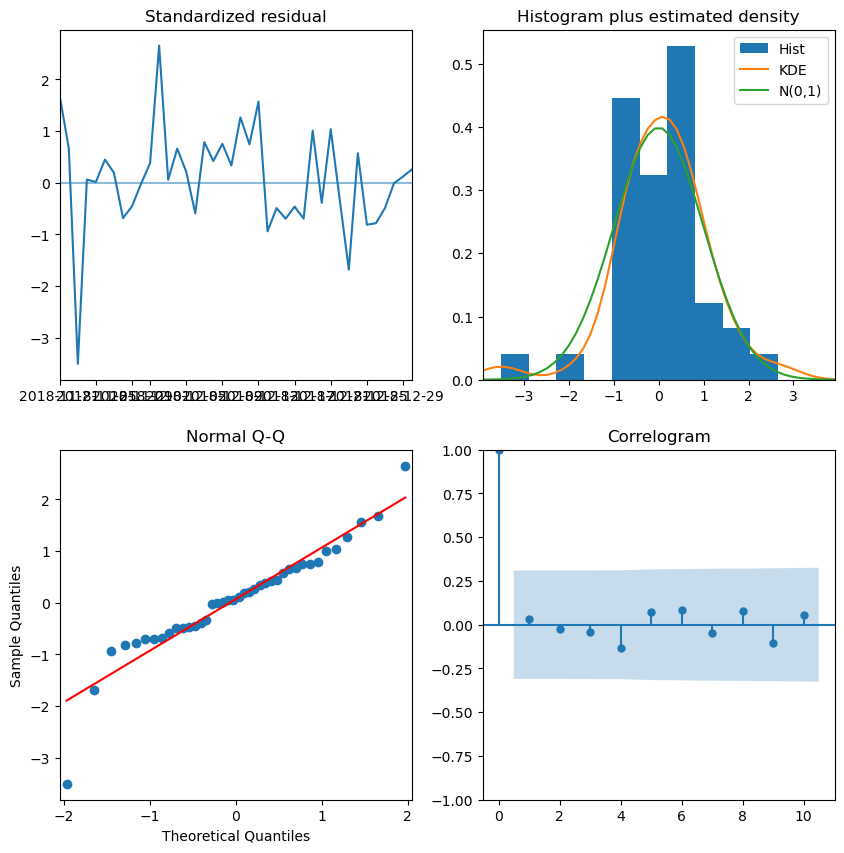

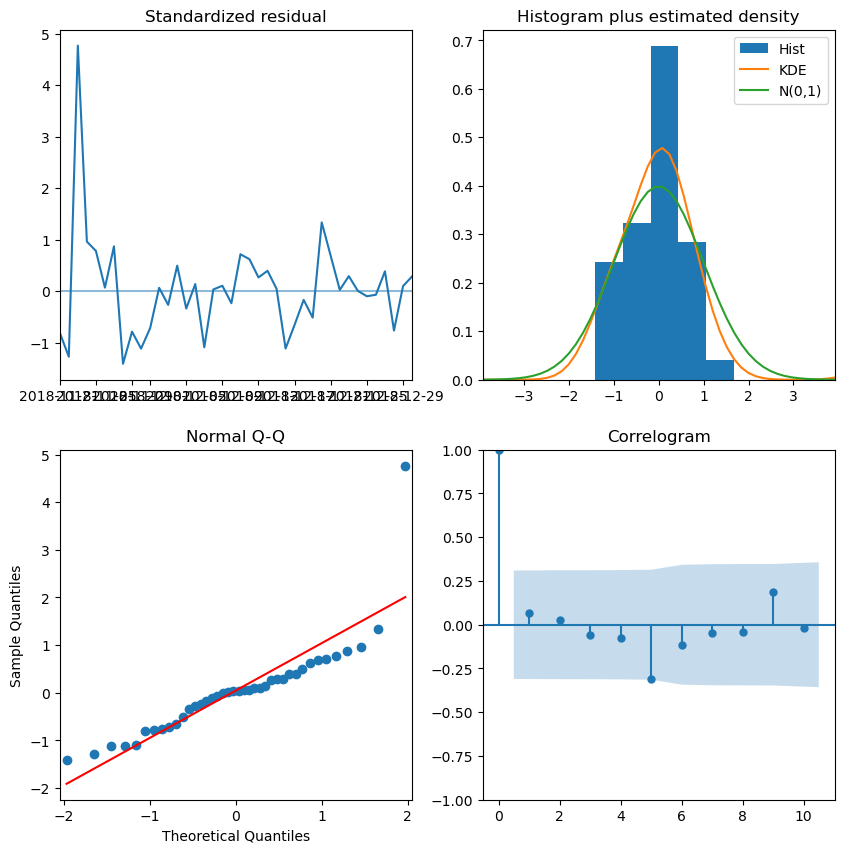

In [56]:
# Validation des modèles

auto_arima_fayulu_TSSW.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_TSSW.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_TSSW.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_TSSW.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_TSSW.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

In [57]:
# Predictions

pred_fayulu_TSSW, conf_int_fayulu_TSSW = auto_arima_fayulu_TSSW.predict(n_periods=1,
                                                                        return_conf_int = True,
                                                                        alpha = .1)
pred_ramazani_TSSW, conf_int_ramazani_TSSW = auto_arima_ramazani_TSSW.predict(n_periods=1,
                                                                              return_conf_int = True,
                                                                              alpha = .1)
pred_tshisekedi_TSSW, conf_int_tshisekedi_TSSW = auto_arima_tshisekedi_TSSW.predict(n_periods=1,
                                                                                    return_conf_int = True,
                                                                                    alpha = .1)

predictions_TSSW = standardizer(pred_fayulu_TSSW[0],
                                pred_ramazani_TSSW[0],
                                pred_tshisekedi_TSSW[0])

time_series_data_TSSW = unit_root_test_TSSW.append(predictions_TSSW, ignore_index=True)
time_series_data_TSSW.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_TSSW

Fayulu      Ramazani  Tshisekedi
ADF stats       -1.382439 -7.300336e+00   -3.622348
P-value          0.590665  1.599762e-08    0.028008
Predicted value  0.294019  3.276510e-01    0.378330

In [58]:
# Confidence Interval

conf_int_TSSW = pd.DataFrame(np.concatenate([conf_int_fayulu_TSSW, conf_int_ramazani_TSSW, conf_int_tshisekedi_TSSW]),
                             index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_TSSW

Lower bound  Upper bound
                                    
Fayulu         0.239866     0.334333
Ramazani       0.283628     0.356253
Tshisekedi     0.315752     0.423103

In [60]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_TSSW = accuracy_score(predicted = np.array(list(predictions_TSSW.values())),
                                       observed = np.array(list(observations.values())))

accuracy_metrics = pd.DataFrame(accuracy_metrics_TSSW, columns = ['TSSW index'], index = ['Non-penalized'])
accuracy_metrics

TSSW index
Non-penalized    0.816864

### Indice WG

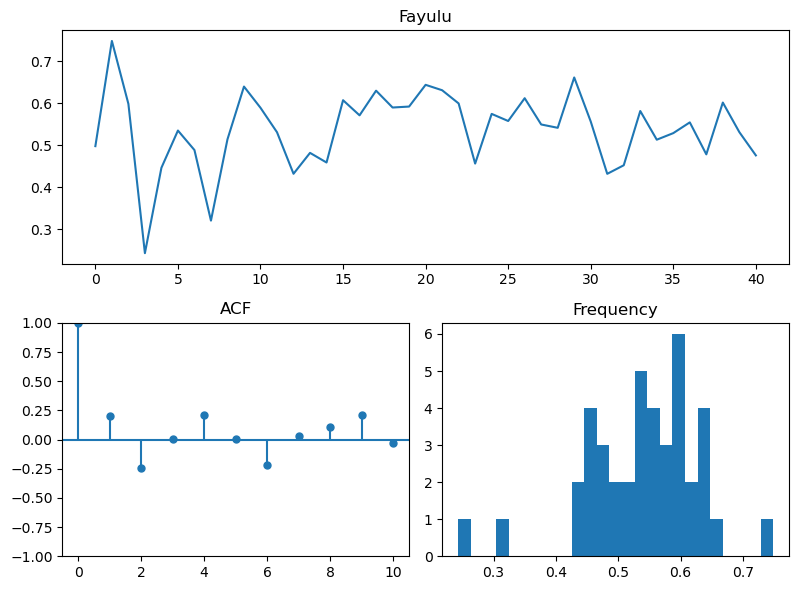

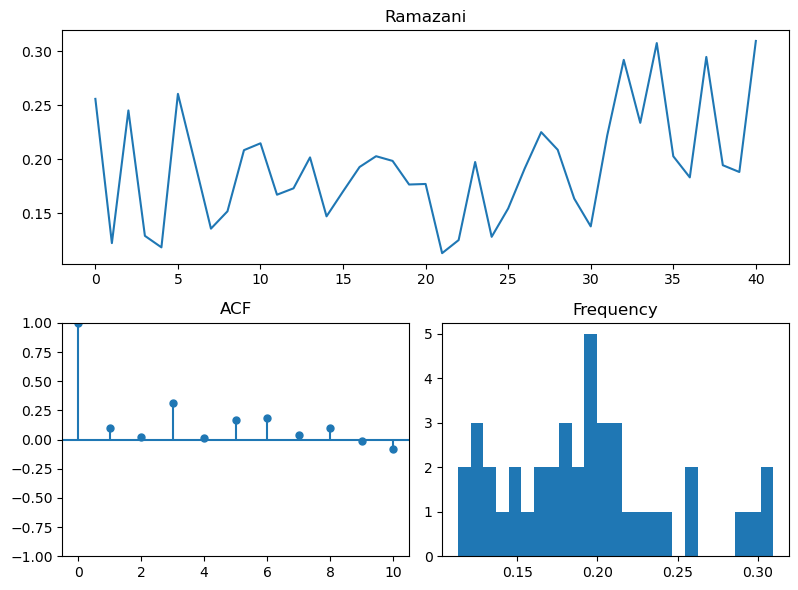

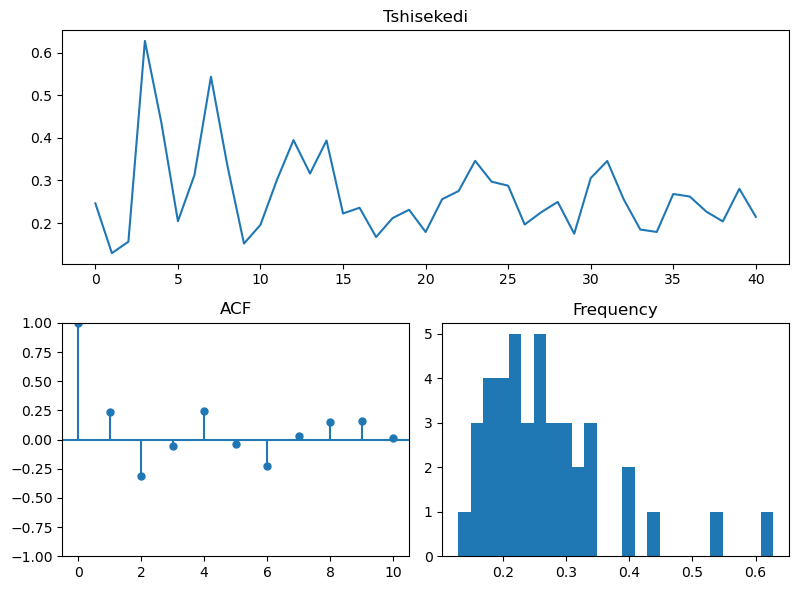

In [61]:
# Series en niveau

tsdisplay(WG_dataset.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(WG_dataset.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(WG_dataset.Tshisekedi, lag_max=10, title='Tshisekedi');

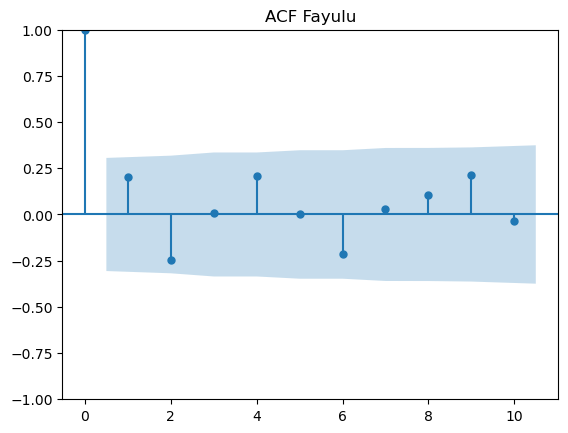

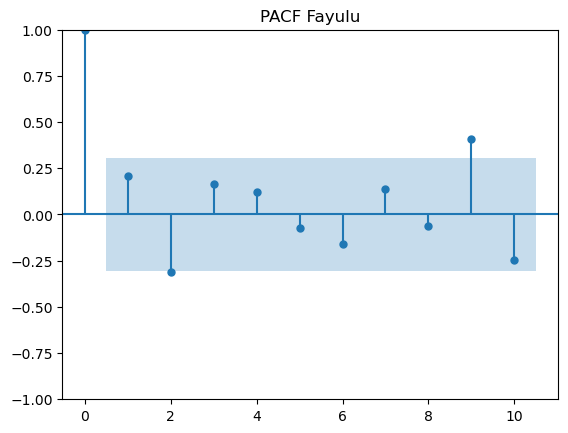

In [62]:
# Corrélogrammes Fayulu

plot_acf(WG_dataset.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_WG.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_WG.png', bbox_inches = 'tight', pad_inches = .1);

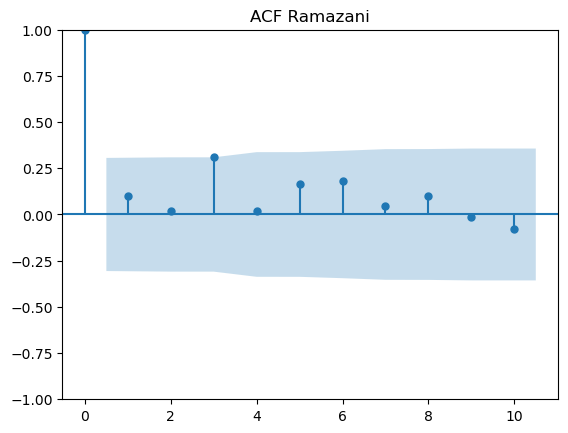

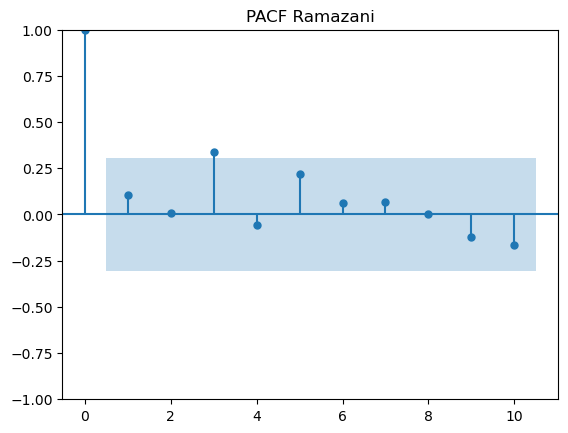

In [63]:
# Corrélogrammes Ramazani

plot_acf(WG_dataset.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_WG.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_WG.png', bbox_inches = 'tight', pad_inches = .1);

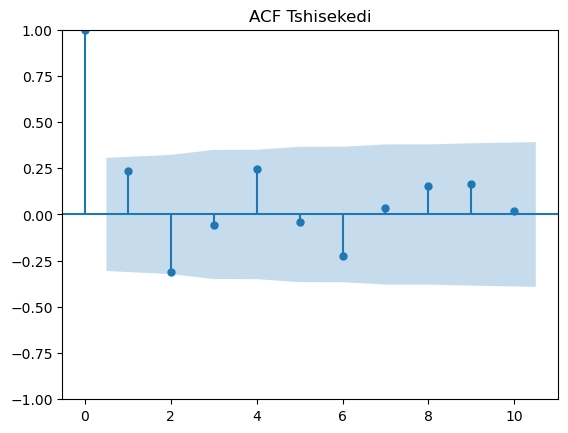

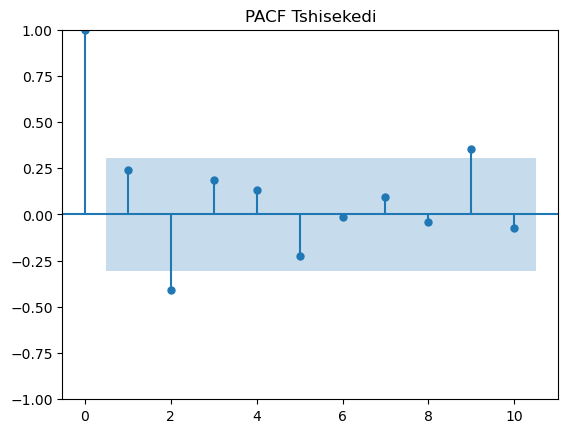

In [64]:
# Corrélogrammes Tshisekedi

plot_acf(WG_dataset.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_WG.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_WG.png', bbox_inches = 'tight', pad_inches = .1);

In [65]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(WG_dataset.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(WG_dataset.Ramazani, regression ='ctt')
unit_root_test_tshisekedi = adfuller(WG_dataset.Tshisekedi, regression ='c')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_WG = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_WG

Fayulu  Ramazani  Tshisekedi
ADF stats -4.995442 -3.929064   -4.821219
P-value    0.000023  0.038477    0.000050

In [66]:
# ARIMA models

auto_arima_fayulu_WG = pm.auto_arima(WG_dataset.Fayulu, seasonal=False)
auto_arima_ramazani_WG = pm.auto_arima(WG_dataset.Ramazani, seasonal=False)
auto_arima_tshisekedi_WG = pm.auto_arima(WG_dataset.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_WG.summary())
display('Ramazani', auto_arima_ramazani_WG.summary())
display('Tshisekedi', auto_arima_tshisekedi_WG.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  38.423
Date:                Sun, 28 May 2023   AIC                            -68.847
Time:                        22:05:14   BIC                            -61.993
Sample:                    11-20-2018   HQIC                           -66.351
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2834.178      0.000       0.999       1.001
ma.L1         -0.5577      0.445     -1.252      0.211      -1.431       0.315
ma.L2         -0.4207      0.242     -1.740      0.082      -0.895       0.053
sigma2         0.0077      0.003      2.310      0.021       0.001       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.73
Prob(Q):                              0.81   Prob(JB):                         0.03
Heteroskedasticity (H):               0.26   Skew:                            -0.66
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:                        SARIMAX   Log Likelihood                  63.672
Date:                Sun, 28 May 2023   AIC                           -123.344
Time:                        22:05:14   BIC                           -119.917
Sample:                    11-20-2018   HQIC                          -122.096
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1933      0.009     21.917      0.000       0.176       0.211
sigma2         0.0026      0.001      3.898      0.000       0.001       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.50   Prob(JB):                         0.32
Heteroskedasticity (H):               1.66   Skew:                             0.57
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  39.120
Date:                Sun, 28 May 2023   AIC                            -72.240
Time:                        22:05:14   BIC                            -67.099
Sample:                    11-20-2018   HQIC                           -70.368
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2680      0.032      8.356      0.000       0.205       0.331
ma.L1          0.4709      0.250      1.884      0.060      -0.019       0.961
sigma2         0.0086      0.001      6.021      0.000       0.006       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                82.98
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

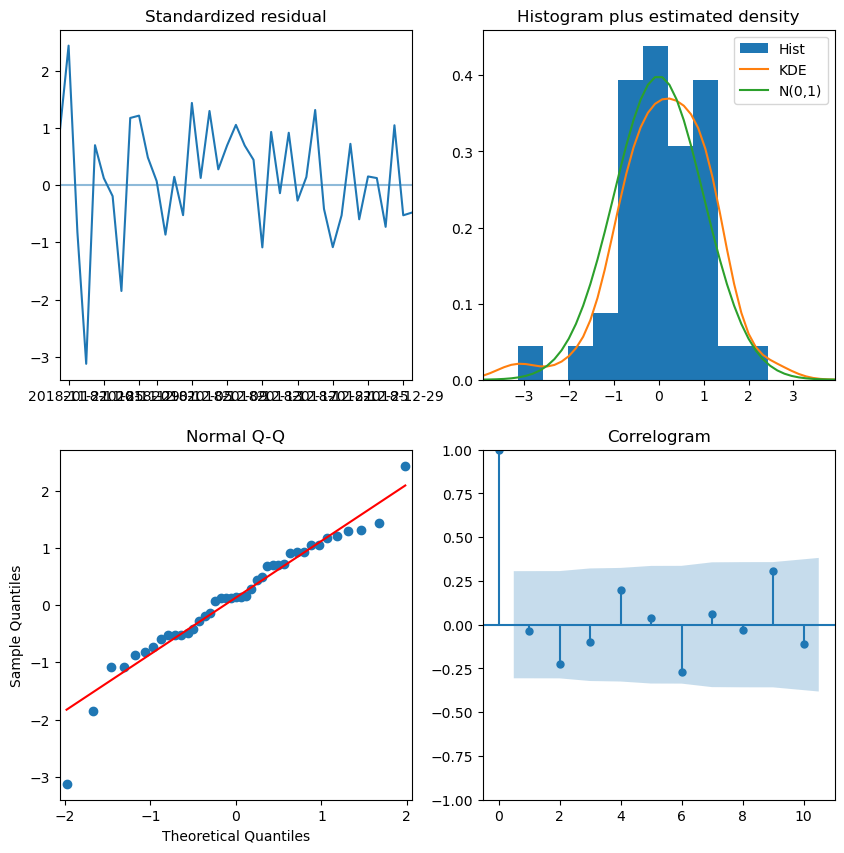

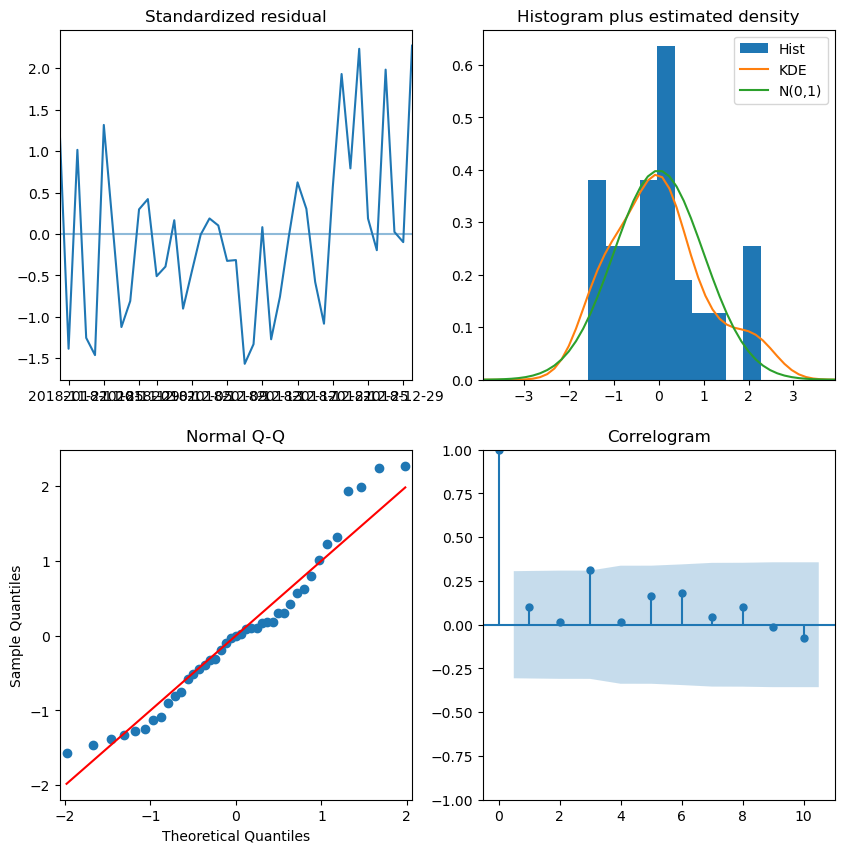

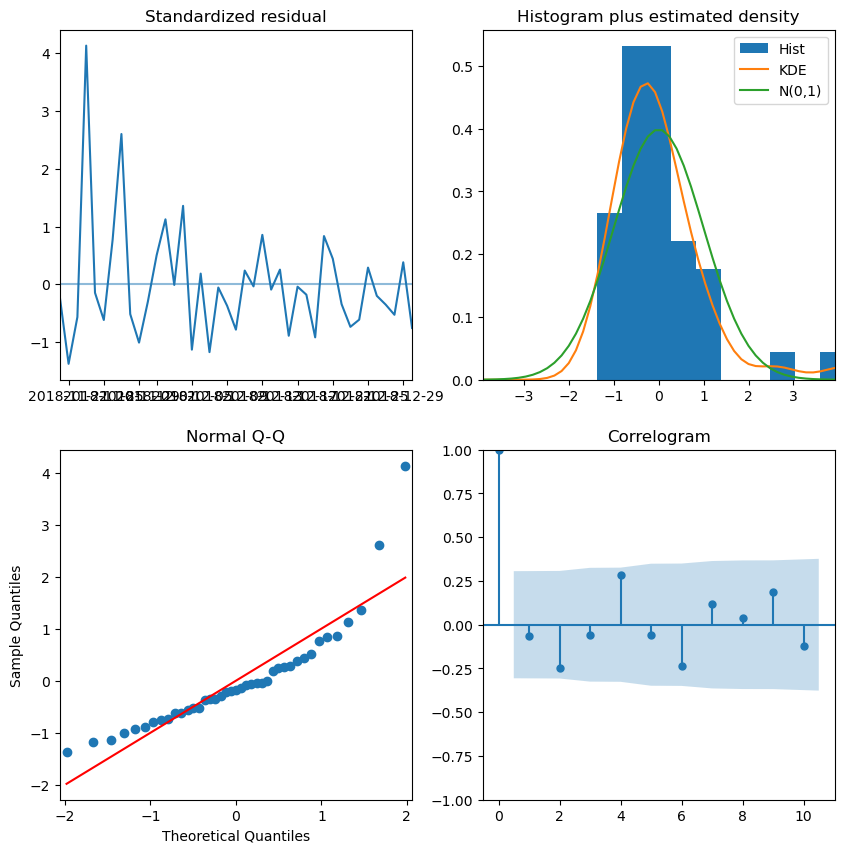

In [67]:
# Validation des modèles

auto_arima_fayulu_WG.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_WG.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_WG.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_WG.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_WG.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_WG.png', bbox_inches = 'tight', pad_inches = .1);

In [71]:
# Predictions

pred_fayulu_WG, conf_int_fayulu_WG = auto_arima_fayulu_WG.predict(n_periods=1,
                                                                  return_conf_int = True,
                                                                  alpha = .1)
pred_ramazani_WG, conf_int_ramazani_WG = auto_arima_ramazani_WG.predict(n_periods=1,
                                                                        return_conf_int = True,
                                                                        alpha = .1)
pred_tshisekedi_WG, conf_int_tshisekedi_WG = auto_arima_tshisekedi_WG.predict(n_periods=1,
                                                                              return_conf_int = True,
                                                                              alpha = .1)

predictions_WG = standardizer(pred_fayulu_WG[0],
                              pred_ramazani_WG[0],
                              pred_tshisekedi_WG[0])

time_series_data_WG = unit_root_test_WG.append(predictions_WG, ignore_index=True)
time_series_data_WG.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_WG

Fayulu  Ramazani  Tshisekedi
ADF stats       -4.995442 -3.929064   -4.821219
P-value          0.000023  0.038477    0.000050
Predicted value  0.547510  0.204217    0.248273

In [72]:
# Confidence Interval

conf_int_WG = pd.DataFrame(np.concatenate([conf_int_fayulu_WG, conf_int_ramazani_WG, conf_int_tshisekedi_WG]),
                           index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_WG

Lower bound  Upper bound
                                    
Fayulu         0.372787     0.663618
Ramazani       0.109060     0.277510
Tshisekedi     0.082169     0.387796

In [73]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_WG = accuracy_score(predicted = np.array(list(predictions_WG.values())),
                                     observed = np.array(list(observations.values())))

accuracy_metrics['WG index'] = accuracy_metrics_WG
accuracy_metrics

TSSW index  WG index
Non-penalized    0.816864  0.642811

### Indice HRM

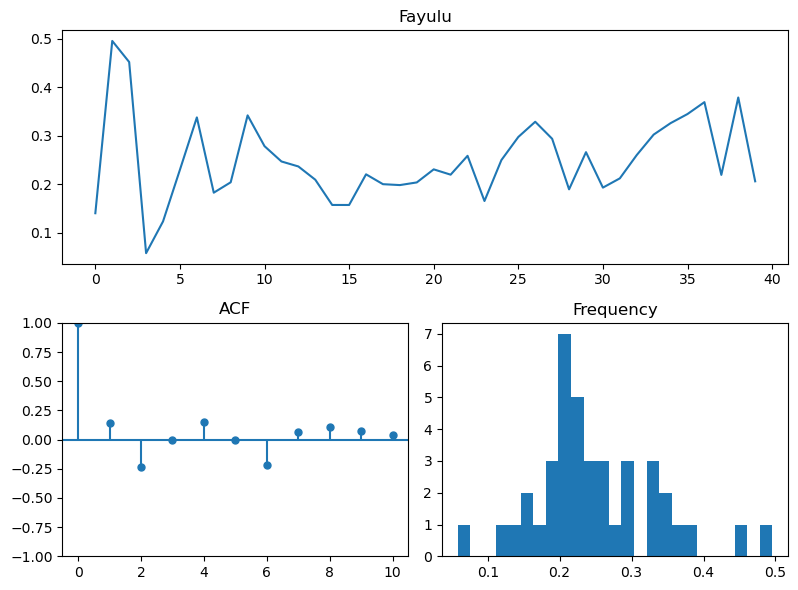

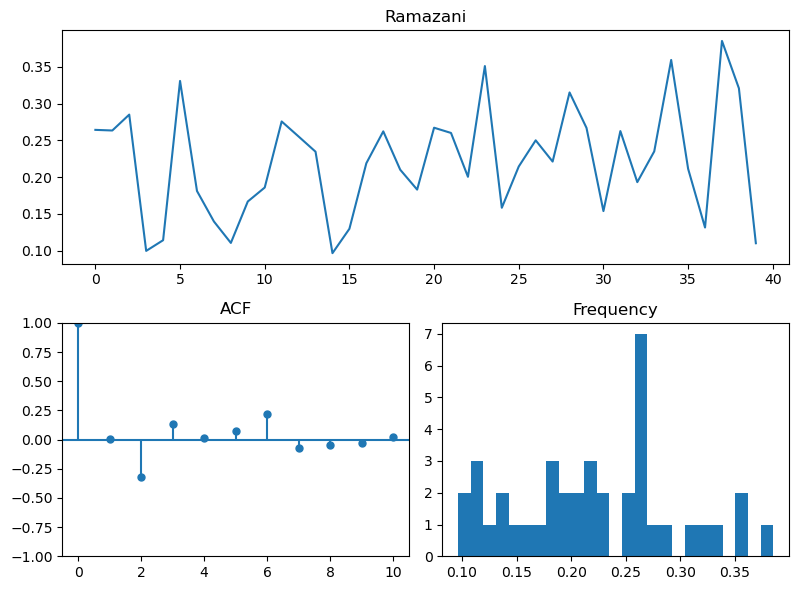

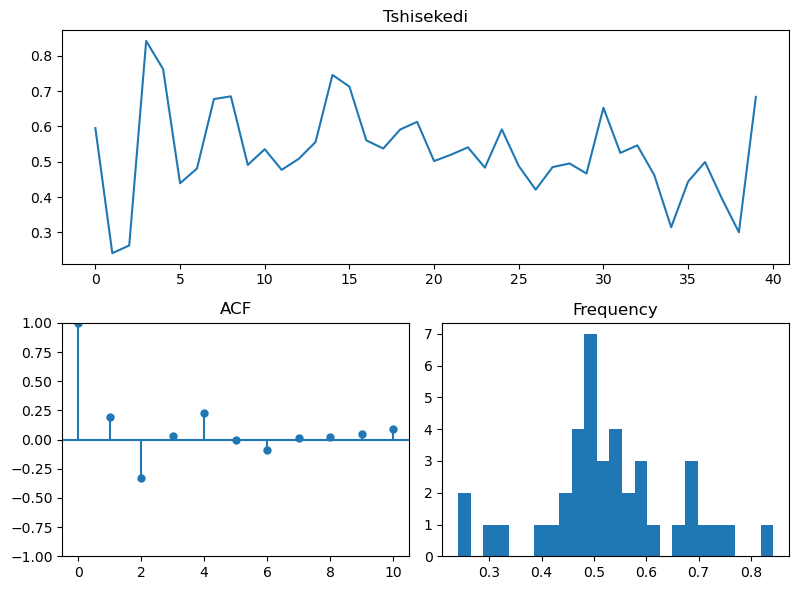

In [74]:
# Series en niveau

tsdisplay(HRM_dataset.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(HRM_dataset.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(HRM_dataset.Tshisekedi, lag_max=10, title='Tshisekedi');

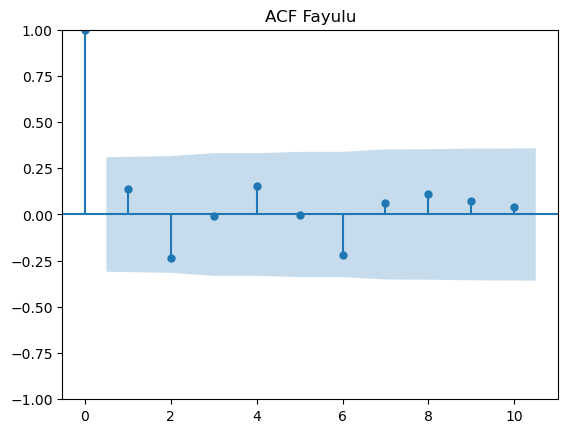

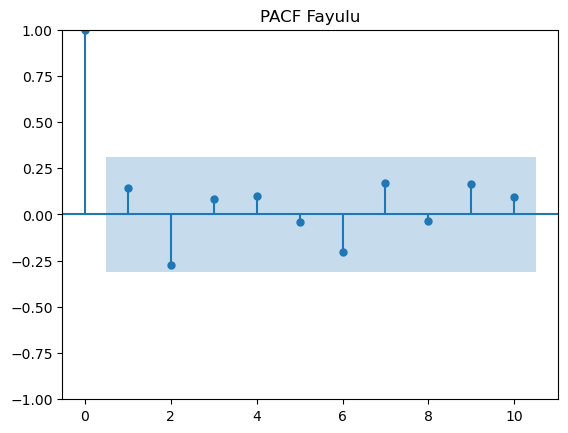

In [75]:
# Corrélogrammes Fayulu

plot_acf(HRM_dataset.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_HRM.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_HRM.png', bbox_inches = 'tight', pad_inches = .1);

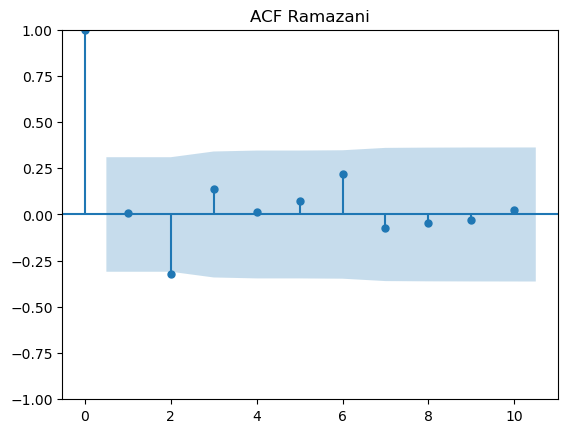

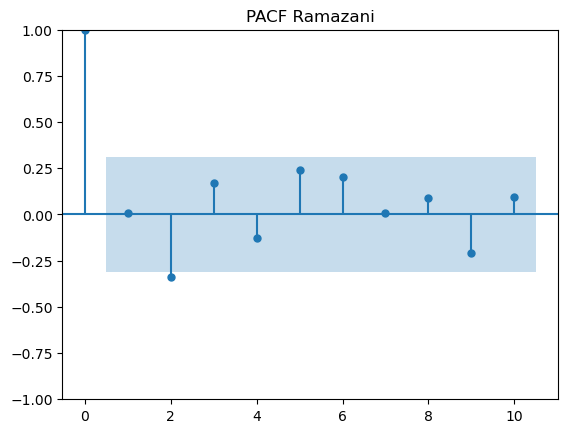

In [76]:
# Corrélogrammes Ramazani

plot_acf(HRM_dataset.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_HRM.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_HRM.png', bbox_inches = 'tight', pad_inches = .1);

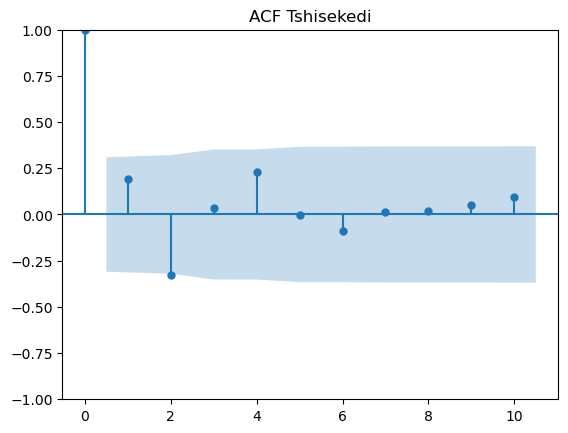

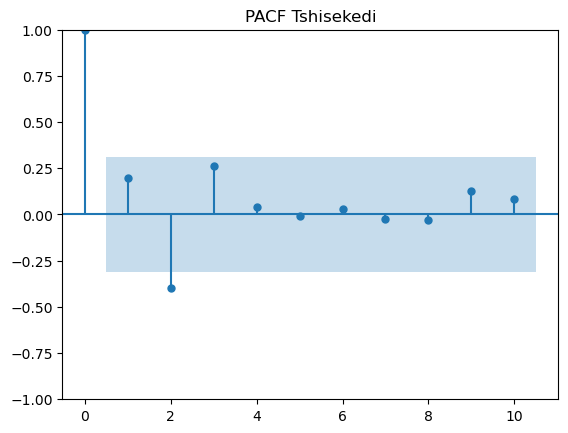

In [77]:
# Corrélogrammes Tshisekedi

plot_acf(HRM_dataset.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_HRM.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_HRM.png', bbox_inches = 'tight', pad_inches = .1);

In [78]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(HRM_dataset.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(HRM_dataset.Ramazani, regression ='c')
unit_root_test_tshisekedi = adfuller(HRM_dataset.Tshisekedi, regression ='c')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_HRM = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_HRM

Fayulu      Ramazani  Tshisekedi
ADF stats -5.637652 -5.941595e+00   -4.886881
P-value    0.000001  2.254206e-07    0.000037

In [79]:
# ARIMA models

auto_arima_fayulu_HRM = pm.auto_arima(HRM_dataset.Fayulu, seasonal=False)
auto_arima_ramazani_HRM = pm.auto_arima(HRM_dataset.Ramazani, seasonal=False)
auto_arima_tshisekedi_HRM = pm.auto_arima(HRM_dataset.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_HRM.summary())
display('Ramazani', auto_arima_ramazani_HRM.summary())
display('Tshisekedi', auto_arima_tshisekedi_HRM.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 0, 2)   Log Likelihood                  43.961
Date:                Sun, 28 May 2023   AIC                            -79.922
Time:                        22:12:57   BIC                            -73.167
Sample:                    11-21-2018   HQIC                           -77.480
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2477      0.016     15.666      0.000       0.217       0.279
ma.L1          0.2890      0.184      1.568      0.117      -0.072       0.650
ma.L2         -0.3562      0.159     -2.242      0.025      -0.668      -0.045
sigma2         0.0064      0.002      4.036      0.000       0.003       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.08
Prob(Q):                              0.81   Prob(JB):                         0.08
Heteroskedasticity (H):               0.63   Skew:                             0.81
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  49.472
Date:                Sun, 28 May 2023   AIC                            -90.943
Time:                        22:12:57   BIC                            -84.188
Sample:                    11-21-2018   HQIC                           -88.500
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2926      0.050      5.799      0.000       0.194       0.392
ar.L1          0.0251      0.153      0.164      0.870      -0.274       0.325
ar.L2         -0.3479      0.188     -1.849      0.064      -0.717       0.021
sigma2         0.0049      0.001      3.720      0.000       0.002       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.72   Prob(JB):                         0.64
Heteroskedasticity (H):               1.05   Skew:                             0.27
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(3, 0, 0)   Log Likelihood                  32.850
Date:                Sun, 28 May 2023   AIC                            -55.701
Time:                        22:12:57   BIC                            -47.256
Sample:                    11-21-2018   HQIC                           -52.647
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4159      0.174      2.389      0.017       0.075       0.757
ar.L1          0.4931      0.187      2.633      0.008       0.126       0.860
ar.L2         -0.6350      0.223     -2.847      0.004      -1.072      -0.198
ar.L3          0.3569      0.214      1.667      0.096      -0.063       0.777
sigma2         0.0110      0.004      2.906      0.004       0.004       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.86   Prob(JB):                         0.93
Heteroskedasticity (H):               1.01   Skew:                             0.10
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

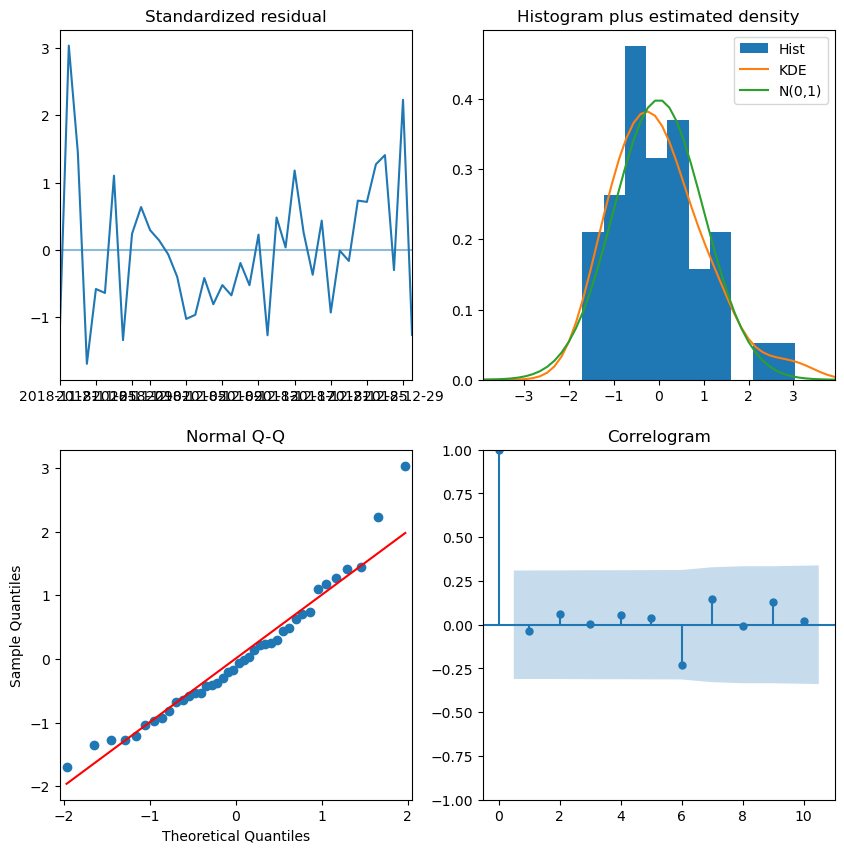

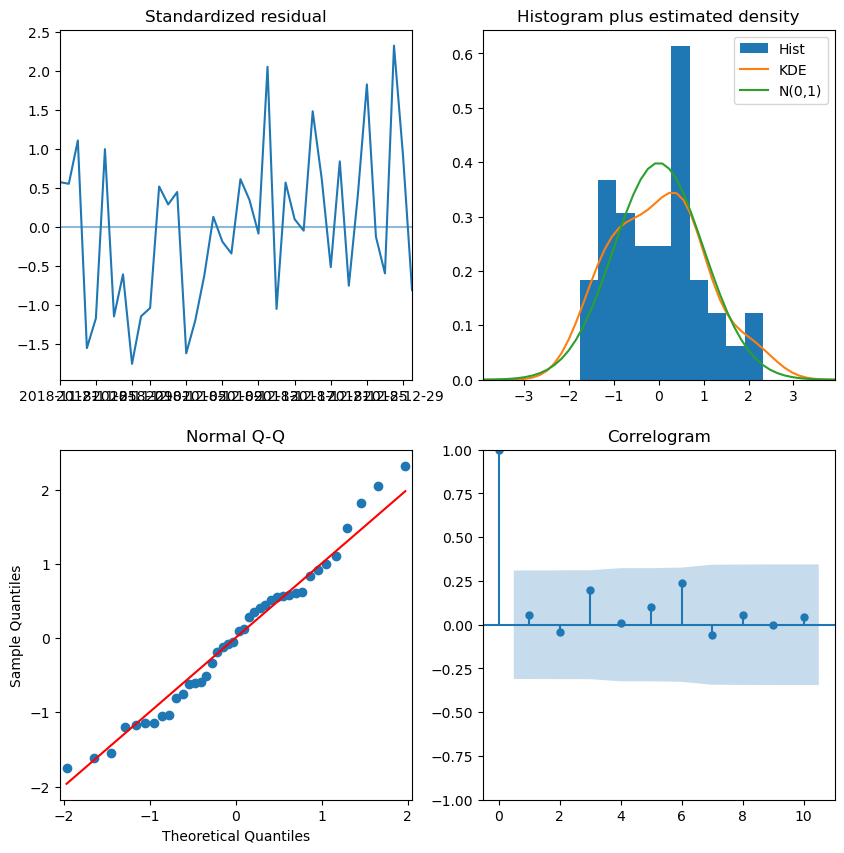

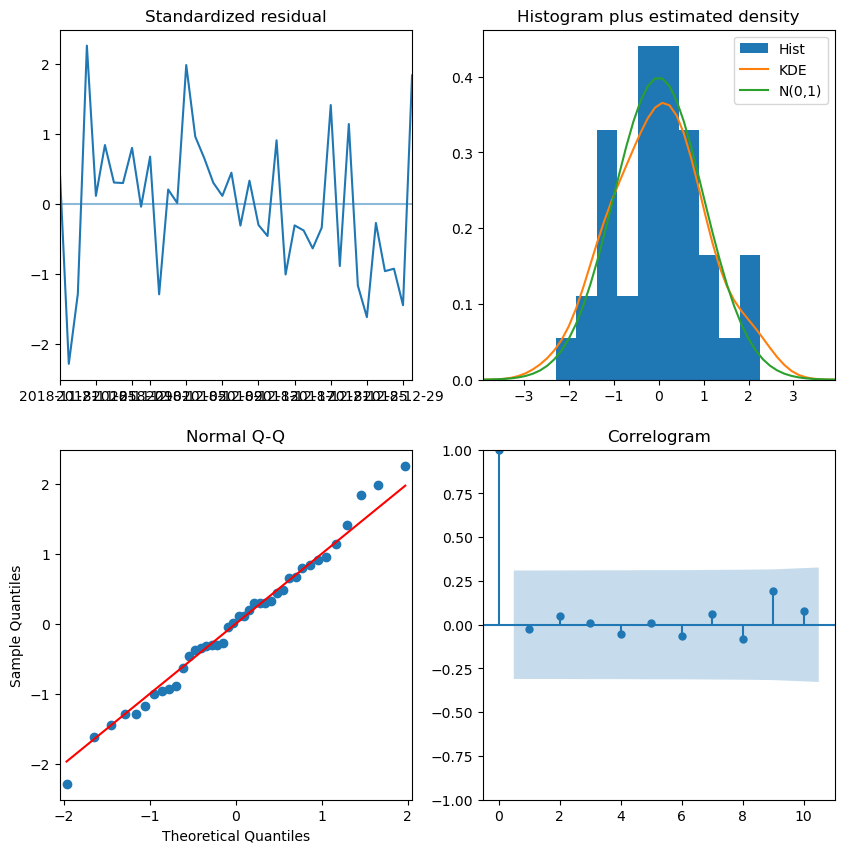

In [80]:
# Validation des modèles

auto_arima_fayulu_HRM.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_HRM.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_HRM.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_HRM.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_HRM.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_HRM.png', bbox_inches = 'tight', pad_inches = .1);

In [81]:
# Predictions

pred_fayulu_HRM, conf_int_fayulu_HRM = auto_arima_fayulu_HRM.predict(n_periods=1,
                                                                     return_conf_int = True,
                                                                     alpha = .1)
pred_ramazani_HRM, conf_int_ramazani_HRM = auto_arima_ramazani_HRM.predict(n_periods=1,
                                                                           return_conf_int = True,
                                                                           alpha = .1)
pred_tshisekedi_HRM, conf_int_tshisekedi_HRM = auto_arima_tshisekedi_HRM.predict(n_periods=1,
                                                                                 return_conf_int = True,
                                                                                 alpha = .1)

predictions_HRM = standardizer(pred_fayulu_HRM[0],
                               pred_ramazani_HRM[0],
                               pred_tshisekedi_HRM[0])

time_series_data_HRM = unit_root_test_HRM.append(predictions_HRM, ignore_index=True)
time_series_data_HRM.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_HRM

Fayulu      Ramazani  Tshisekedi
ADF stats       -5.637652 -5.941595e+00   -4.886881
P-value          0.000001  2.254206e-07    0.000037
Predicted value  0.148421  1.764378e-01    0.675141

In [82]:
# Confidence Interval

conf_int_HRM = pd.DataFrame(np.concatenate([conf_int_fayulu_HRM, conf_int_ramazani_HRM, conf_int_tshisekedi_HRM]),
                            index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_HRM

Lower bound  Upper bound
                                    
Fayulu         0.022857     0.286429
Ramazani       0.068666     0.299001
Tshisekedi     0.530760     0.876121

In [83]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_HRM = accuracy_score(predicted = np.array(list(predictions_HRM.values())),
                                      observed = np.array(list(observations.values())))

accuracy_metrics['HRM index'] = accuracy_metrics_HRM
accuracy_metrics

TSSW index  WG index  HRM index
Non-penalized    0.816864  0.642811   0.471924

## Résultats avec pénalisation

### Indice TSSW

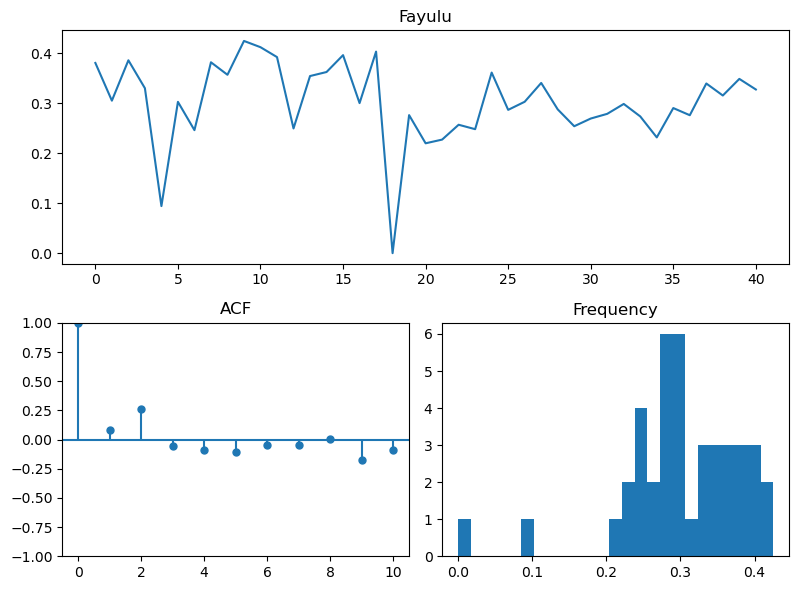

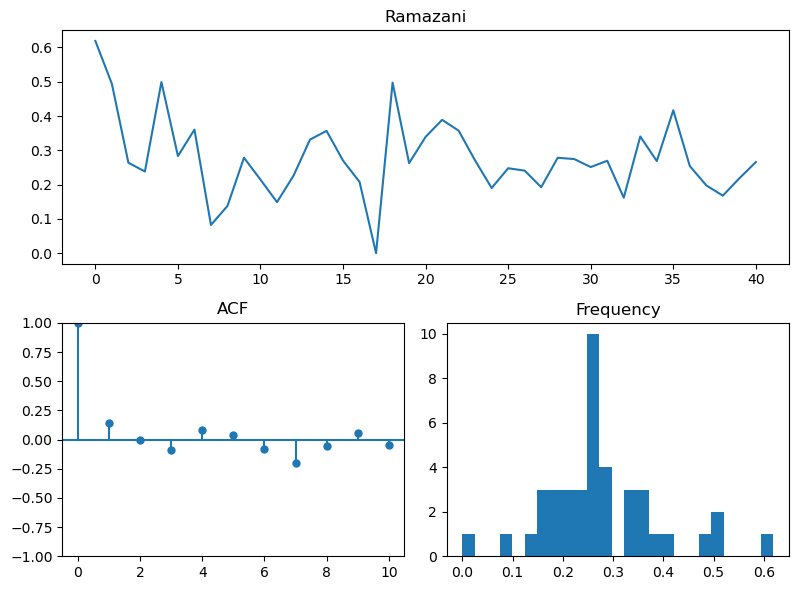

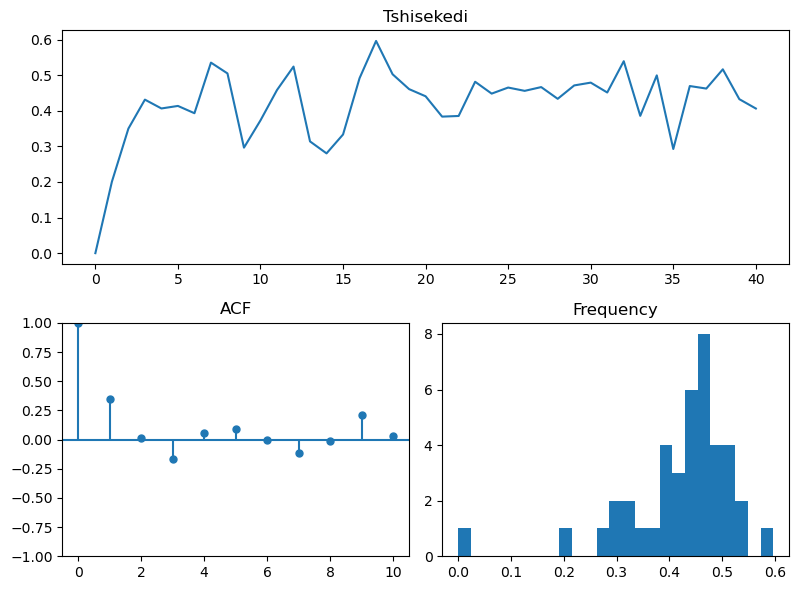

In [84]:
# Series en niveau

tsdisplay(TSSW_dataset_P.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(TSSW_dataset_P.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(TSSW_dataset_P.Tshisekedi, lag_max=10, title='Tshisekedi');

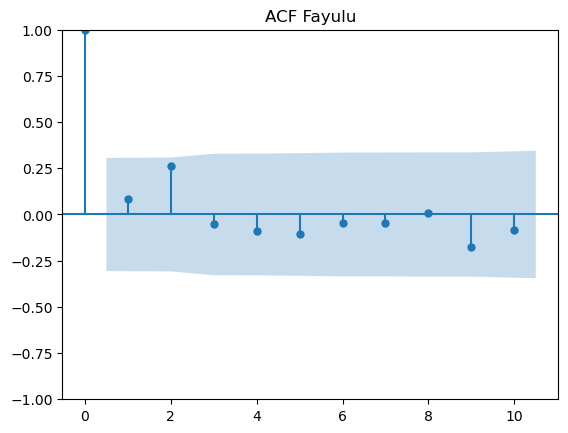

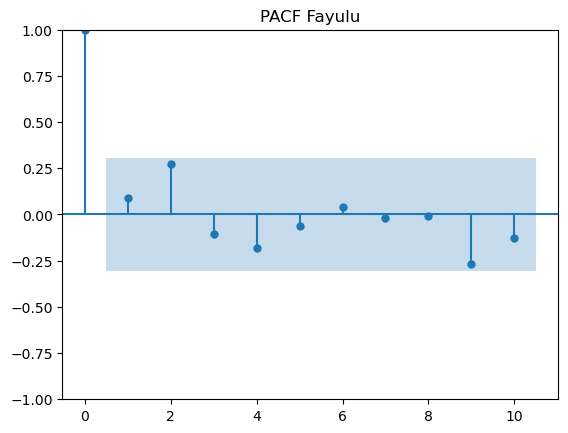

In [85]:
# Corrélogrammes Fayulu

plot_acf(TSSW_dataset_P.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset_P.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);

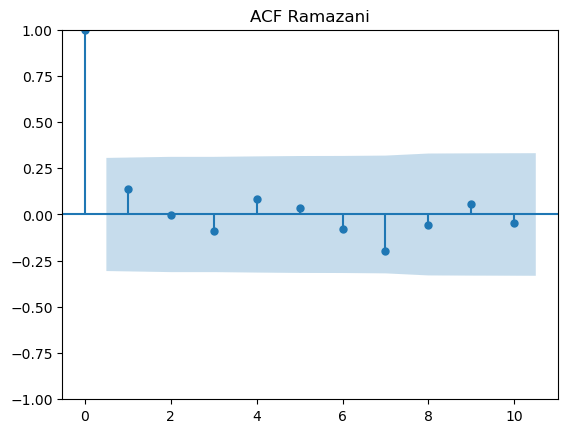

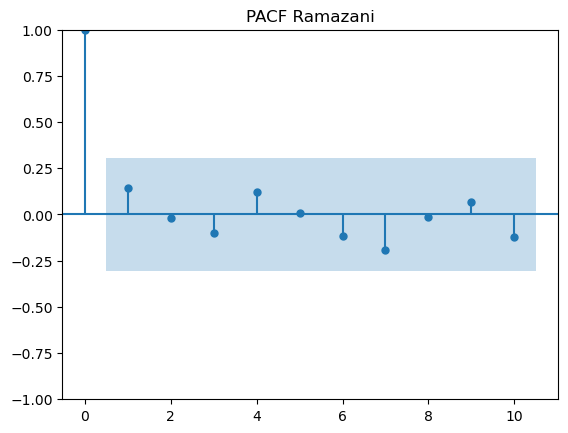

In [86]:
# Corrélogrammes Ramazani

plot_acf(TSSW_dataset_P.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset_P.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);

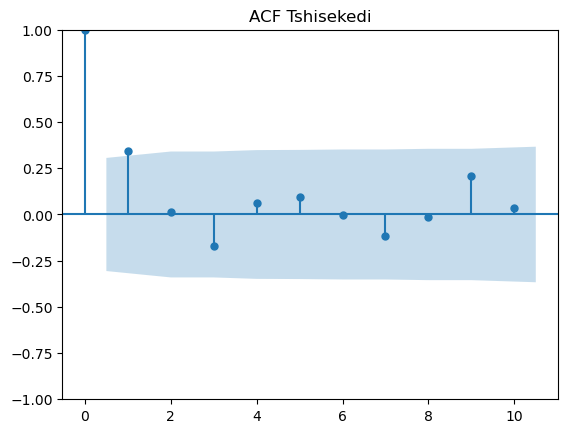

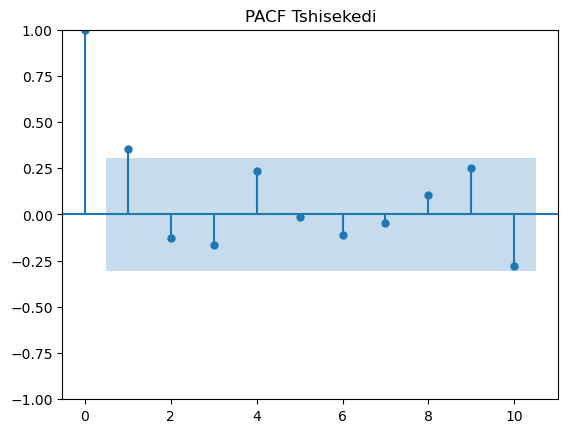

In [87]:
# Corrélogrammes Tshisekedi

plot_acf(TSSW_dataset_P.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(TSSW_dataset_P.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);

In [88]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(TSSW_dataset_P.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(TSSW_dataset_P.Ramazani, regression ='c')
unit_root_test_tshisekedi = adfuller(TSSW_dataset_P.Tshisekedi, regression ='c')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_TSSW_P = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_TSSW_P

Fayulu      Ramazani  Tshisekedi
ADF stats -3.107104 -6.092318e+00   -5.130453
P-value    0.026032  1.029426e-07    0.000012

In [89]:
# ARIMA models

auto_arima_fayulu_TSSW_P = pm.auto_arima(TSSW_dataset_P.Fayulu, seasonal=False)
auto_arima_ramazani_TSSW_P = pm.auto_arima(TSSW_dataset_P.Ramazani, seasonal=False)
auto_arima_tshisekedi_TSSW_P = pm.auto_arima(TSSW_dataset_P.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_TSSW_P.summary())
display('Ramazani', auto_arima_ramazani_TSSW_P.summary())
display('Tshisekedi', auto_arima_tshisekedi_TSSW_P.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:                        SARIMAX   Log Likelihood                  45.299
Date:                Sun, 28 May 2023   AIC                            -86.597
Time:                        22:16:15   BIC                            -83.170
Sample:                    11-20-2018   HQIC                           -85.349
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3025      0.016     19.157      0.000       0.272       0.333
sigma2         0.0064      0.001      6.015      0.000       0.004       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                36.63
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:                        SARIMAX   Log Likelihood                  30.522
Date:                Sun, 28 May 2023   AIC                            -57.043
Time:                        22:16:15   BIC                            -53.616
Sample:                    11-20-2018   HQIC                           -55.795
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2771      0.019     14.456      0.000       0.240       0.315
sigma2         0.0132      0.002      5.342      0.000       0.008       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.36   Prob(JB):                         0.08
Heteroskedasticity (H):               0.22   Skew:                             0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  39.454
Date:                Sun, 28 May 2023   AIC                            -72.909
Time:                        22:16:15   BIC                            -67.768
Sample:                    11-20-2018   HQIC                           -71.037
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1778      0.052      3.411      0.001       0.076       0.280
ar.L1          0.5636      0.127      4.425      0.000       0.314       0.813
sigma2         0.0085      0.002      3.903      0.000       0.004       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                32.19
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -1.45
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

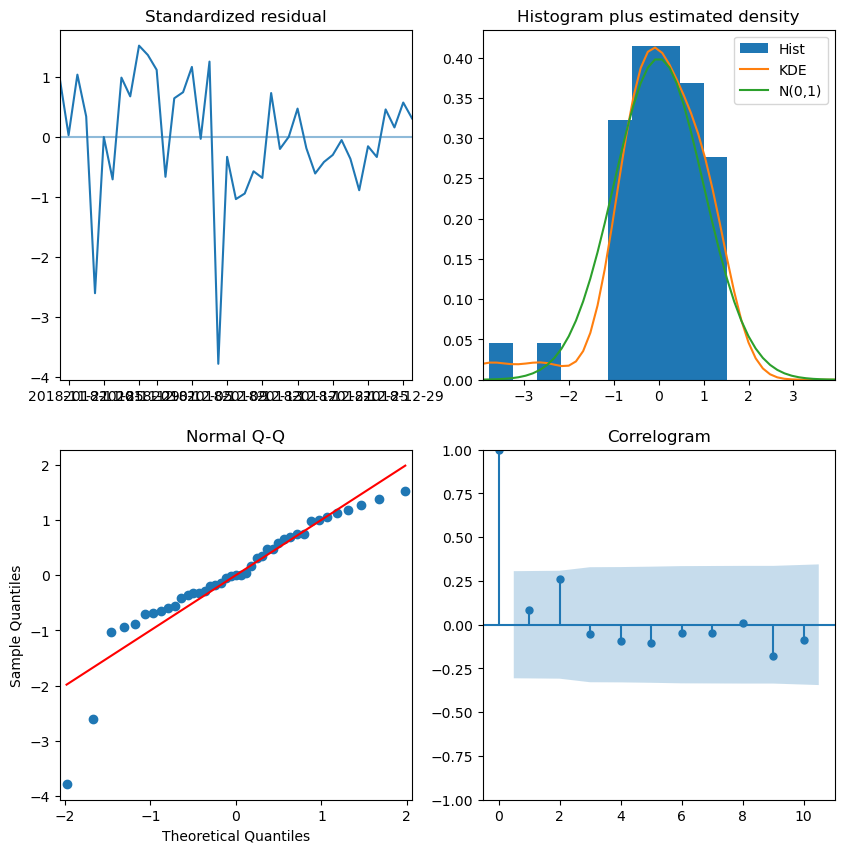

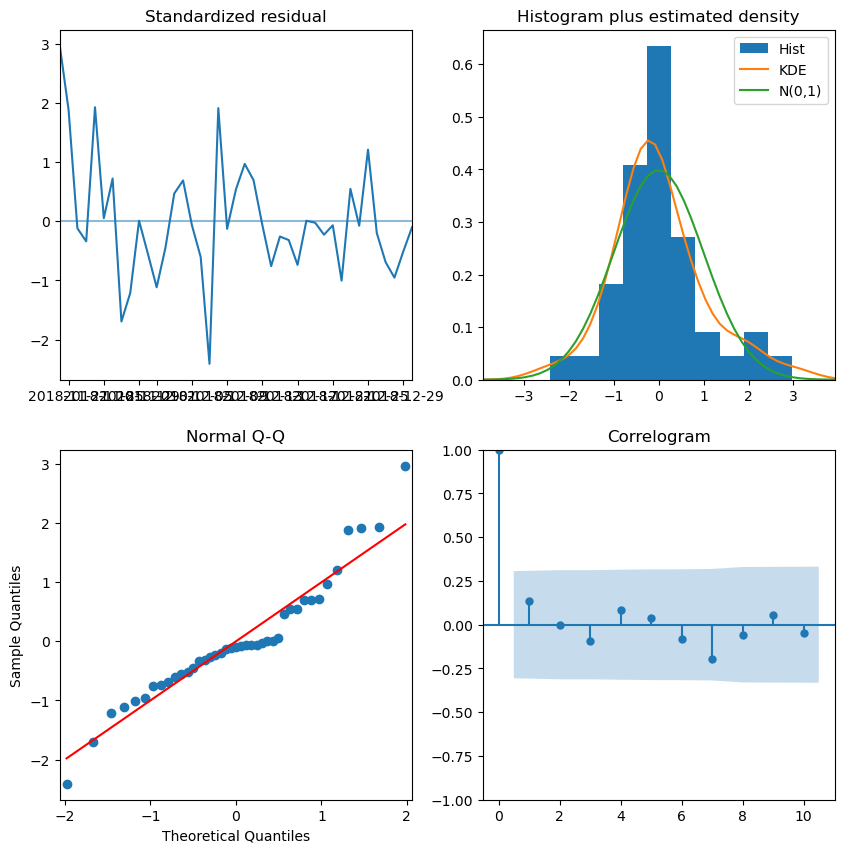

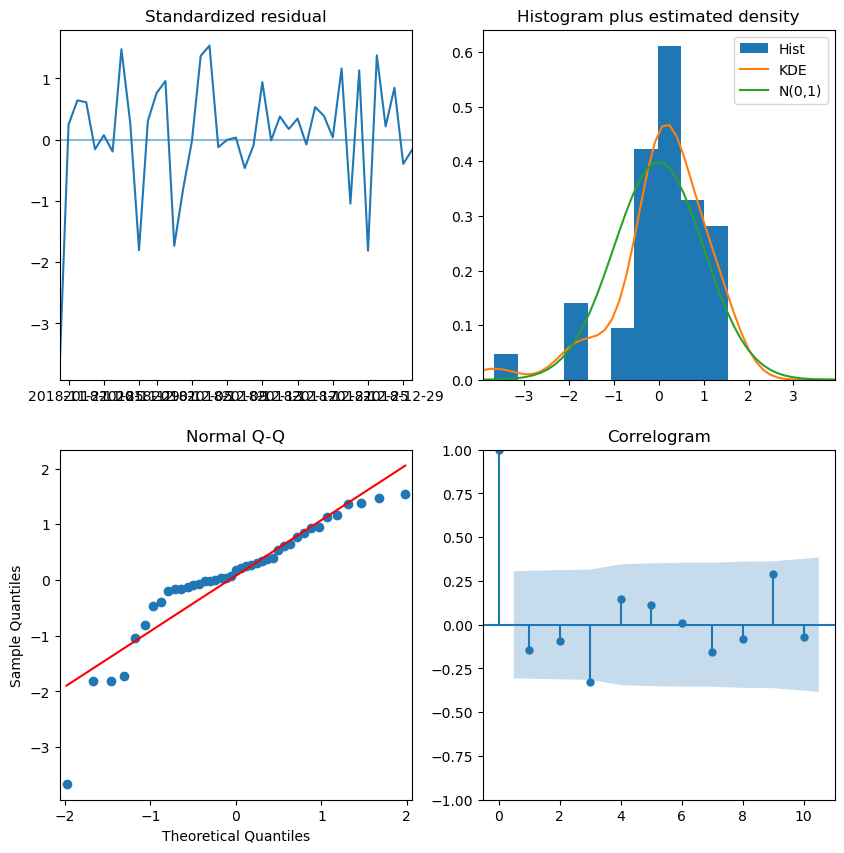

In [90]:
# Validation des modèles

auto_arima_fayulu_TSSW_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_TSSW_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_TSSW_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_TSSW_P.png', bbox_inches = 'tight', pad_inches = .1);

In [91]:
# Predictions

pred_fayulu_TSSW, conf_int_fayulu_TSSW = auto_arima_fayulu_TSSW_P.predict(n_periods=1,
                                                                        return_conf_int = True,
                                                                        alpha = .1)
pred_ramazani_TSSW, conf_int_ramazani_TSSW = auto_arima_ramazani_TSSW_P.predict(n_periods=1,
                                                                              return_conf_int = True,
                                                                              alpha = .1)
pred_tshisekedi_TSSW, conf_int_tshisekedi_TSSW = auto_arima_tshisekedi_TSSW_P.predict(n_periods=1,
                                                                                    return_conf_int = True,
                                                                                    alpha = .1)

predictions_TSSW_P = standardizer(pred_fayulu_TSSW[0],
                                  pred_ramazani_TSSW[0],
                                  pred_tshisekedi_TSSW[0])

time_series_data_TSSW_P = unit_root_test_TSSW_P.append(predictions_TSSW_P, ignore_index=True)
time_series_data_TSSW_P.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_TSSW_P

Fayulu      Ramazani  Tshisekedi
ADF stats       -3.107104 -6.092318e+00   -5.130453
P-value          0.026032  1.029426e-07    0.000012
Predicted value  0.306675  2.809074e-01    0.412418

In [92]:
# Confidence Interval

conf_int_TSSW_P = pd.DataFrame(np.concatenate([conf_int_fayulu_TSSW, conf_int_ramazani_TSSW, conf_int_tshisekedi_TSSW]),
                             index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_TSSW_P

Lower bound  Upper bound
                                    
Fayulu         0.170690     0.434380
Ramazani       0.088061     0.466170
Tshisekedi     0.255522     0.558179

In [93]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_TSSW_P = accuracy_score(predicted = np.array(list(predictions_TSSW_P.values())),
                                         observed = np.array(list(observations.values())))

accuracy_metrics_P = pd.DataFrame(accuracy_metrics_TSSW_P, columns = ['TSSW index'], index = ['Penalized'])
accuracy_metrics_P

TSSW index
Penalized    0.877466

### Indice WG

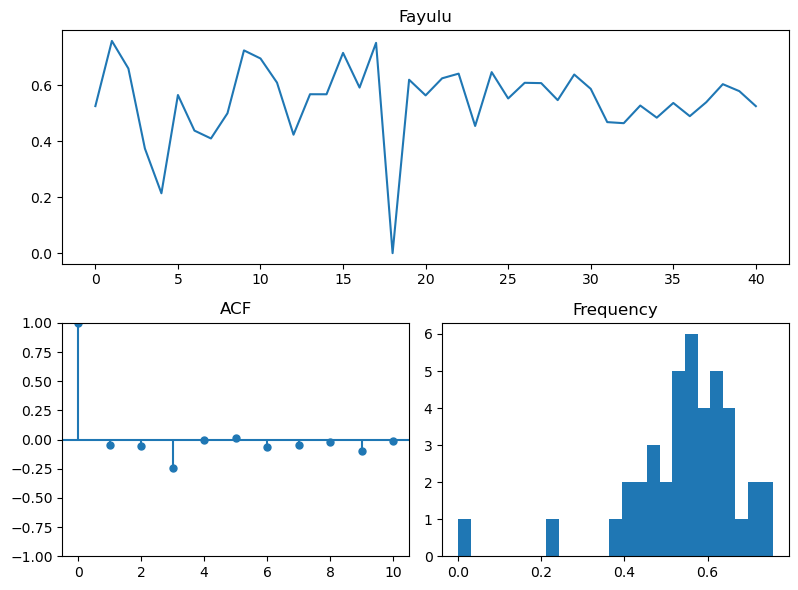

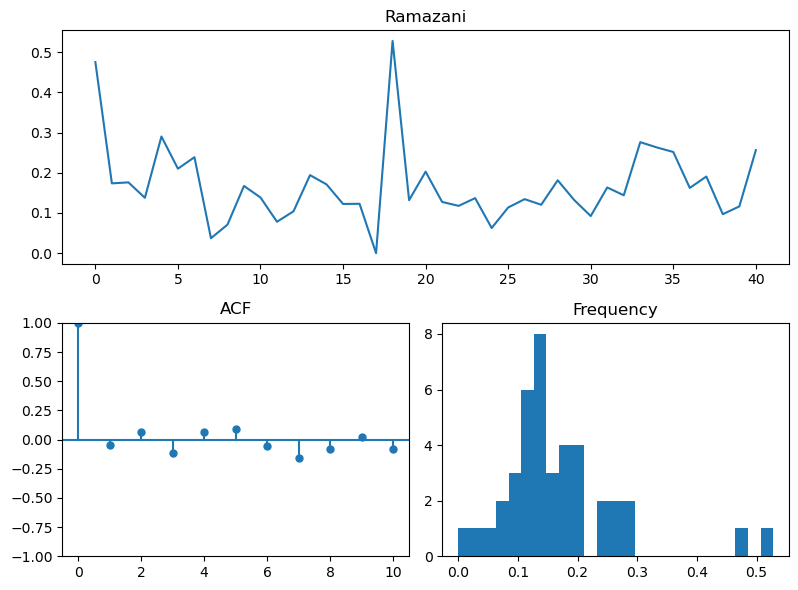

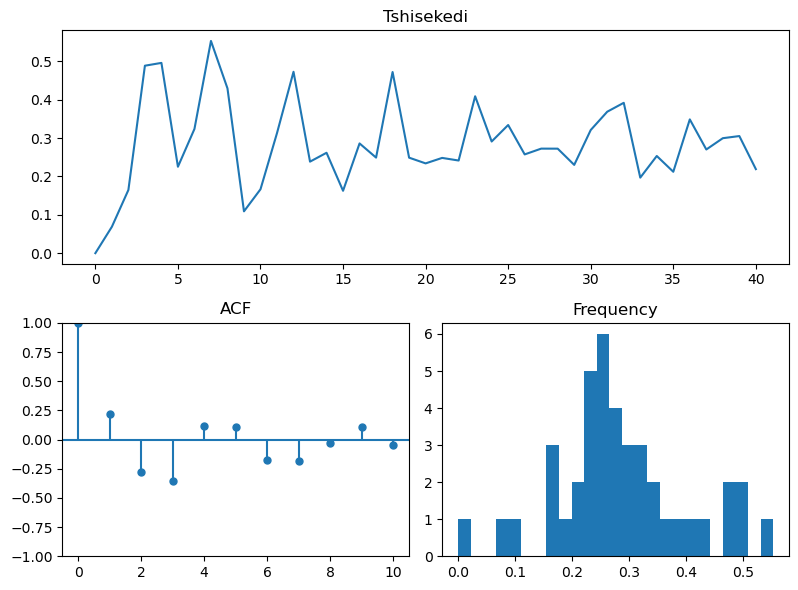

In [94]:
# Series en niveau

tsdisplay(WG_dataset_P.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(WG_dataset_P.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(WG_dataset_P.Tshisekedi, lag_max=10, title='Tshisekedi');

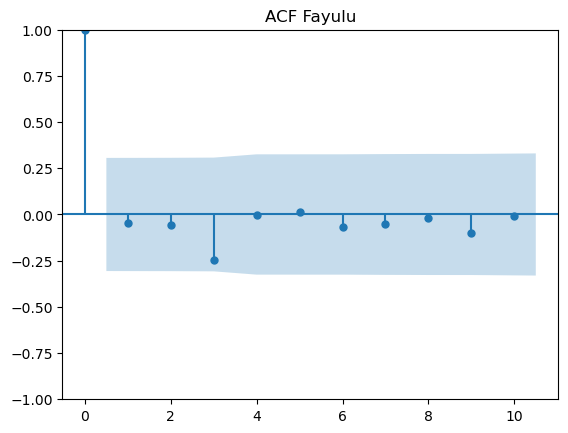

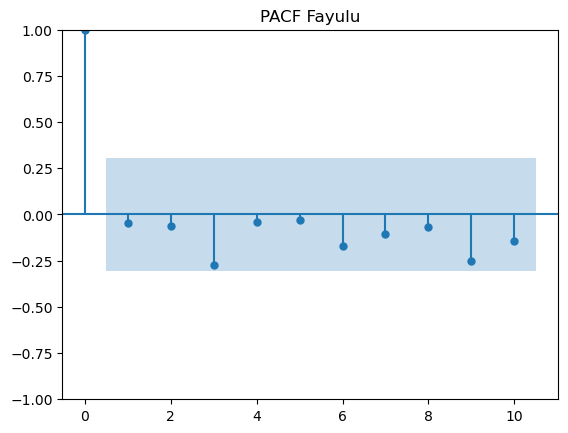

In [95]:
# Corrélogrammes Fayulu

plot_acf(WG_dataset_P.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_WG_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset_P.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_WG_P.png', bbox_inches = 'tight', pad_inches = .1);

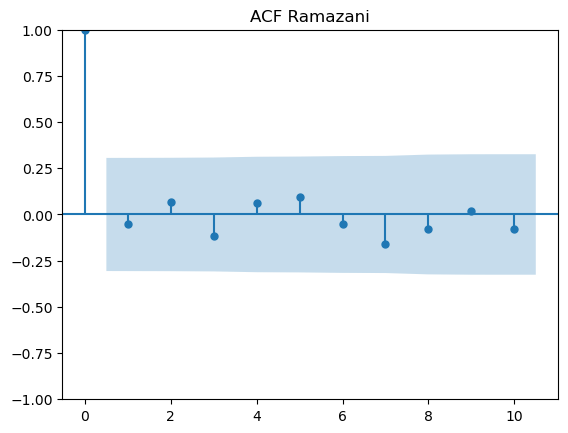

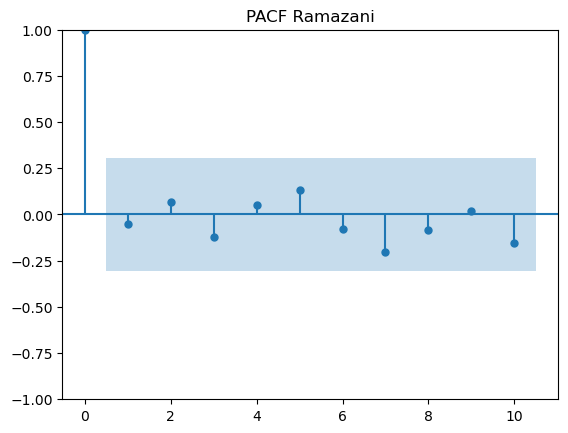

In [96]:
# Corrélogrammes Ramazani

plot_acf(WG_dataset_P.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_WG_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset_P.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_WG_P.png', bbox_inches = 'tight', pad_inches = .1);

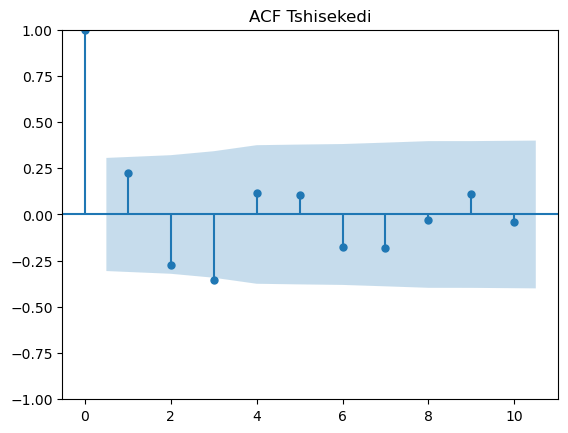

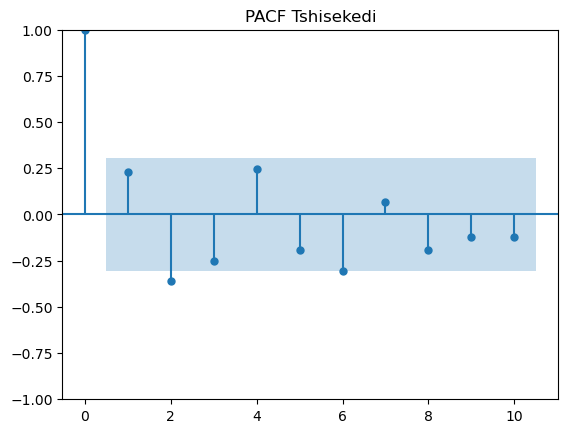

In [97]:
# Corrélogrammes Tshisekedi

plot_acf(WG_dataset_P.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_WG_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(WG_dataset_P.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_WG_P.png', bbox_inches = 'tight', pad_inches = .1);

In [98]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(WG_dataset_P.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(WG_dataset_P.Ramazani, regression ='c')
unit_root_test_tshisekedi = adfuller(WG_dataset_P.Tshisekedi, regression ='c')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_WG_P = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_WG_P

Fayulu      Ramazani    Tshisekedi
ADF stats -6.450923e+00 -7.393218e+00 -6.971785e+00
P-value    1.524251e-08  7.900456e-11  8.627501e-10

In [99]:
# ARIMA models

auto_arima_fayulu_WG_P = pm.auto_arima(WG_dataset_P.Fayulu, seasonal=False)
auto_arima_ramazani_WG_P = pm.auto_arima(WG_dataset_P.Ramazani, seasonal=False)
auto_arima_tshisekedi_WG_P = pm.auto_arima(WG_dataset_P.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_WG_P.summary())
display('Ramazani', auto_arima_ramazani_WG_P.summary())
display('Tshisekedi', auto_arima_tshisekedi_WG_P.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:                        SARIMAX   Log Likelihood                  23.639
Date:                Sun, 28 May 2023   AIC                            -43.279
Time:                        22:19:05   BIC                            -39.851
Sample:                    11-20-2018   HQIC                           -42.031
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5459      0.028     19.563      0.000       0.491       0.601
sigma2         0.0185      0.003      6.357      0.000       0.013       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                59.13
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:                        SARIMAX   Log Likelihood                  36.965
Date:                Sun, 28 May 2023   AIC                            -69.931
Time:                        22:19:05   BIC                            -66.504
Sample:                    11-20-2018   HQIC                           -68.683
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1685      0.022      7.740      0.000       0.126       0.211
sigma2         0.0096      0.002      5.628      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                51.84
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.77
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(3, 0, 0)   Log Likelihood                  36.977
Date:                Sun, 28 May 2023   AIC                            -63.954
Time:                        22:19:05   BIC                            -55.386
Sample:                    11-20-2018   HQIC                           -60.834
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4559      0.096      4.761      0.000       0.268       0.643
ar.L1          0.1422      0.199      0.714      0.475      -0.248       0.532
ar.L2         -0.3405      0.132     -2.574      0.010      -0.600      -0.081
ar.L3         -0.3637      0.157     -2.317      0.020      -0.671      -0.056
sigma2         0.0094      0.002      4.268      0.000       0.005       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 5.69
Prob(Q):                              0.48   Prob(JB):                         0.06
Heteroskedasticity (H):               0.14   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

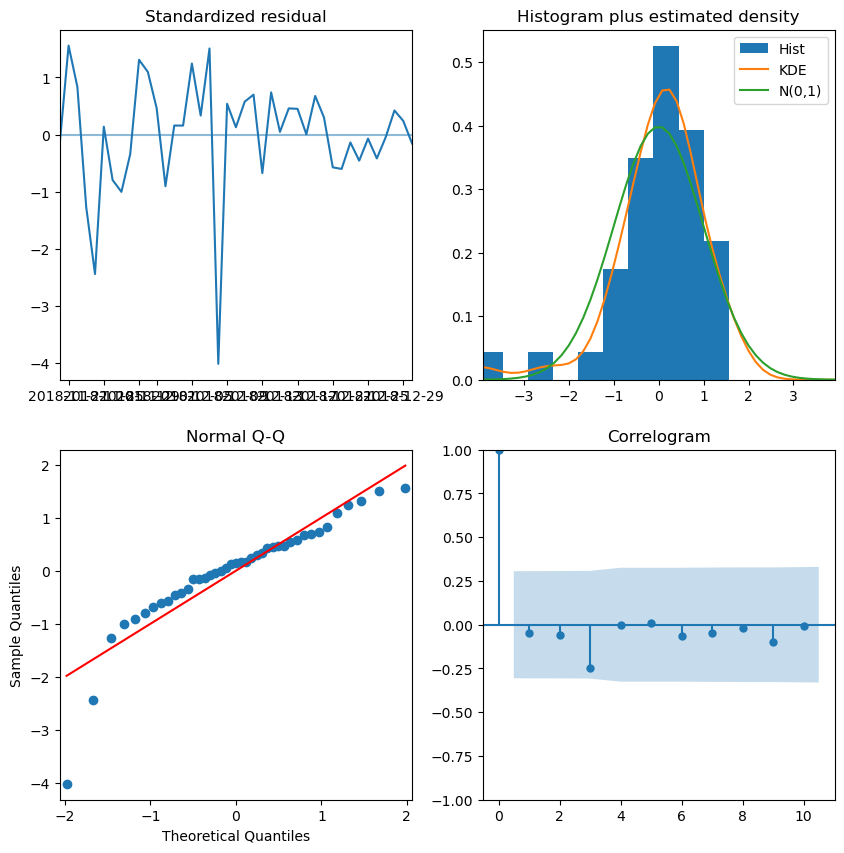

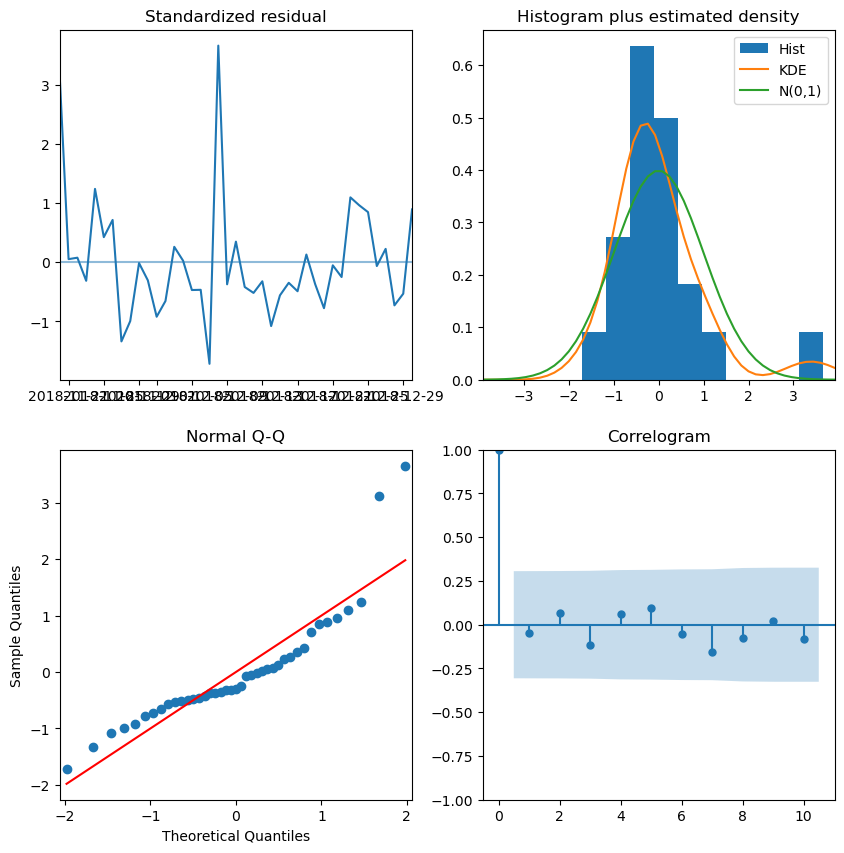

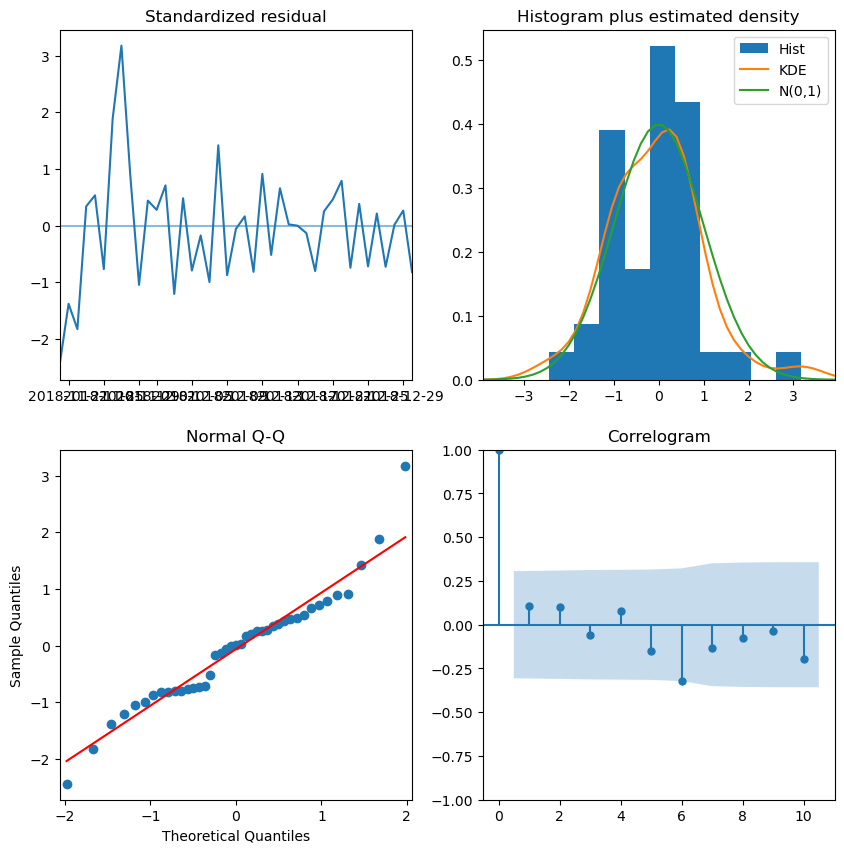

In [100]:
# Validation des modèles

auto_arima_fayulu_WG_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_WG_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_WG_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_WG_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_WG_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_WG_P.png', bbox_inches = 'tight', pad_inches = .1);

In [101]:
# Predictions

pred_fayulu_WG, conf_int_fayulu_WG = auto_arima_fayulu_WG_P.predict(n_periods=1,
                                                                  return_conf_int = True,
                                                                  alpha = .1)
pred_ramazani_WG, conf_int_ramazani_WG = auto_arima_ramazani_WG_P.predict(n_periods=1,
                                                                        return_conf_int = True,
                                                                        alpha = .1)
pred_tshisekedi_WG, conf_int_tshisekedi_WG = auto_arima_tshisekedi_WG_P.predict(n_periods=1,
                                                                              return_conf_int = True,
                                                                              alpha = .1)

predictions_WG_P = standardizer(pred_fayulu_WG[0],
                                pred_ramazani_WG[0],
                                pred_tshisekedi_WG[0])

time_series_data_WG_P = unit_root_test_WG_P.append(predictions_WG_P, ignore_index=True)
time_series_data_WG_P.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_WG_P

Fayulu      Ramazani    Tshisekedi
ADF stats       -6.450923e+00 -7.393218e+00 -6.971785e+00
P-value          1.524251e-08  7.900456e-11  8.627501e-10
Predicted value  5.523238e-01  1.704390e-01  2.772371e-01

In [102]:
# Confidence Interval

conf_int_WG_P = pd.DataFrame(np.concatenate([conf_int_fayulu_WG, conf_int_ramazani_WG, conf_int_tshisekedi_WG]),
                           index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_WG_P

Lower bound  Upper bound
                                    
Fayulu         0.322274     0.769493
Ramazani       0.006892     0.330011
Tshisekedi     0.114318     0.433691

In [103]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_WG_P = accuracy_score(predicted = np.array(list(predictions_WG_P.values())),
                                     observed = np.array(list(observations.values())))

accuracy_metrics_P['WG index'] = accuracy_metrics_WG_P
accuracy_metrics_P

TSSW index  WG index
Penalized    0.877466  0.615993

### Indice HRM

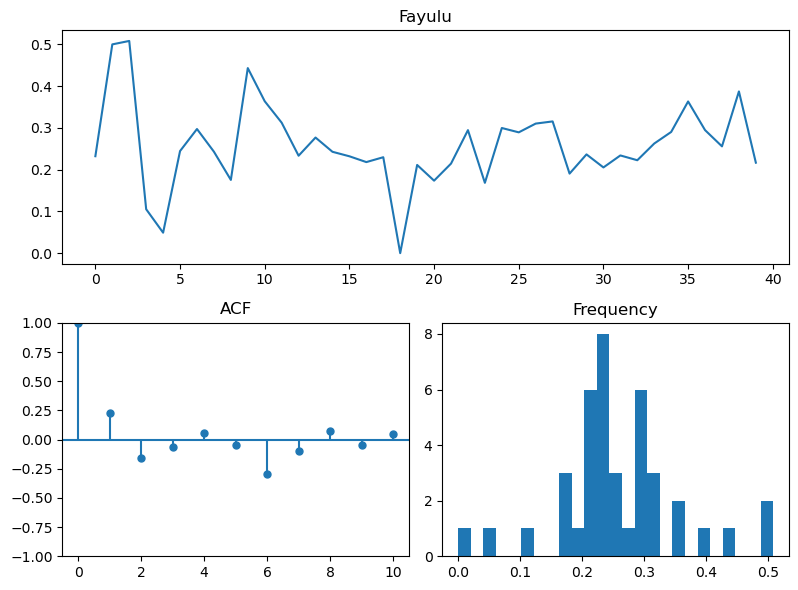

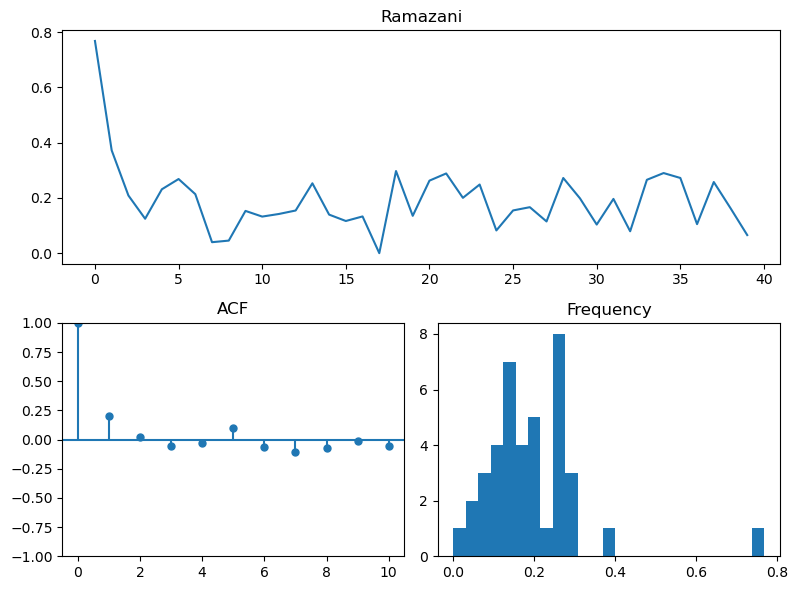

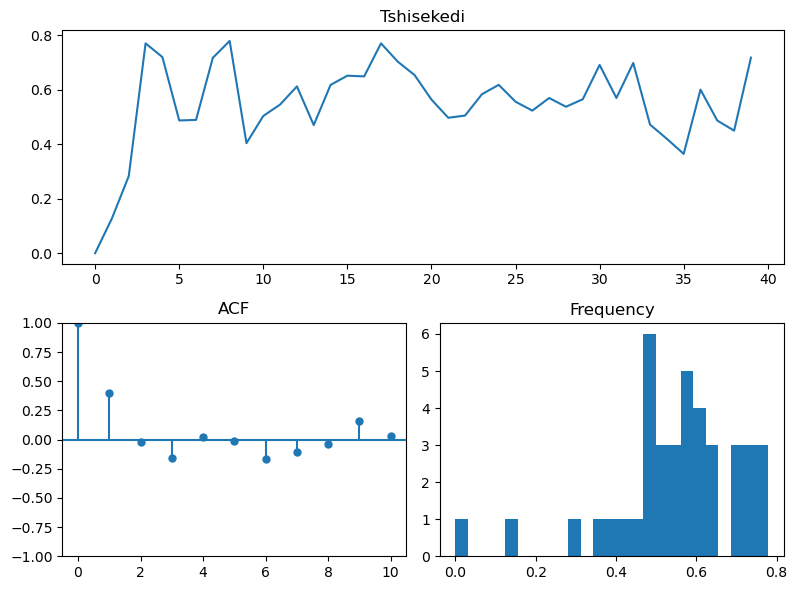

In [104]:
# Series en niveau

tsdisplay(HRM_dataset_P.Fayulu, lag_max=10, title='Fayulu');
tsdisplay(HRM_dataset_P.Ramazani, lag_max=10, title='Ramazani');
tsdisplay(HRM_dataset_P.Tshisekedi, lag_max=10, title='Tshisekedi');

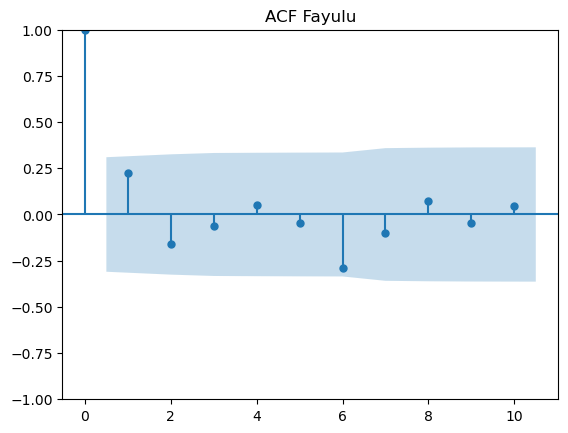

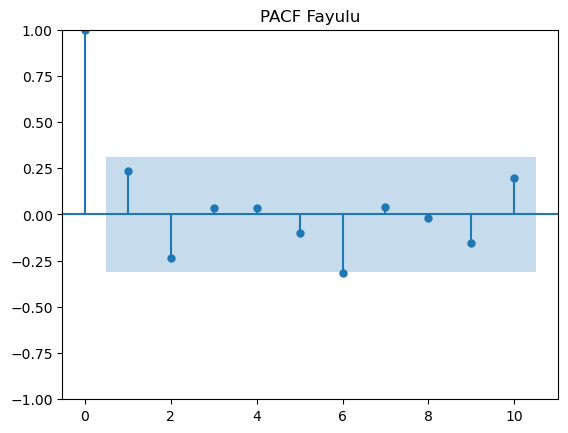

In [105]:
# Corrélogrammes Fayulu

plot_acf(HRM_dataset_P.Fayulu, lags=10, title='ACF Fayulu')
plt.savefig('ACF_Fayulu_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset_P.Fayulu, lags=10, title='PACF Fayulu')
plt.savefig('PACF_Fayulu_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);

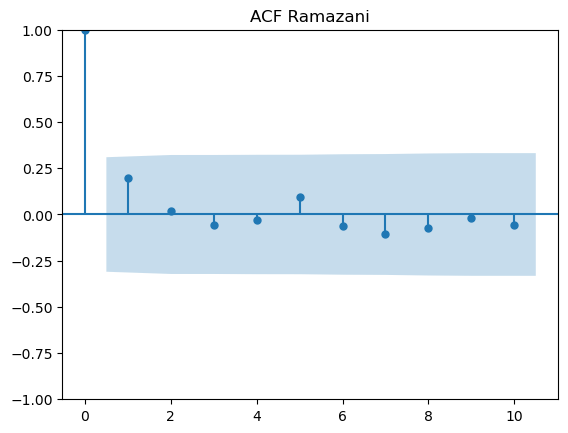

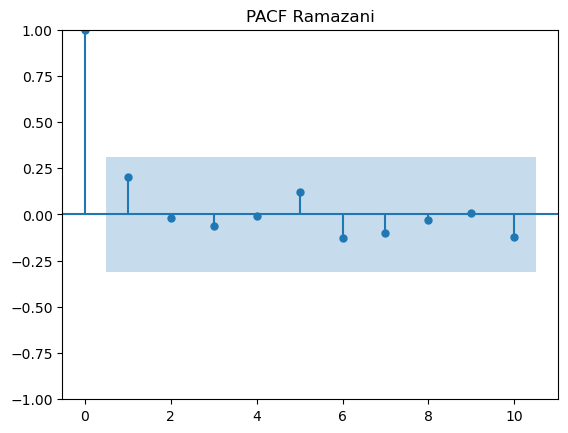

In [106]:
# Corrélogrammes Ramazani

plot_acf(HRM_dataset_P.Ramazani, lags=10, title='ACF Ramazani')
plt.savefig('ACF_Ramazani_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset_P.Ramazani, lags=10, title='PACF Ramazani')
plt.savefig('PACF_Ramazani_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);

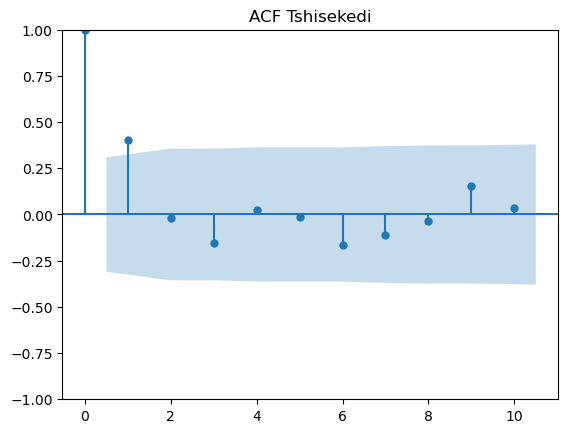

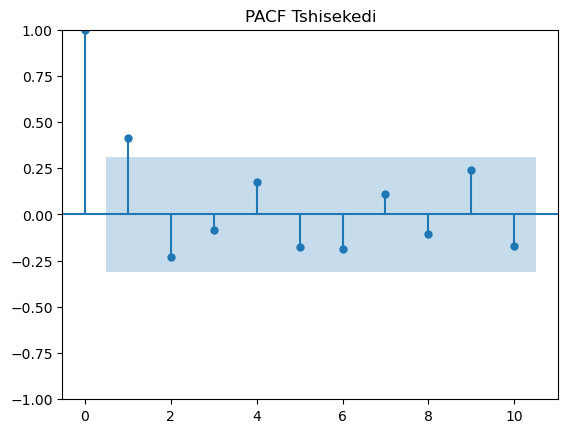

In [107]:
# Corrélogrammes Tshisekedi

plot_acf(HRM_dataset_P.Tshisekedi, lags=10, title='ACF Tshisekedi')
plt.savefig('ACF_Tshisekedi_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);
plot_pacf(HRM_dataset_P.Tshisekedi, lags=10, title='PACF Tshisekedi')
plt.savefig('PACF_Tshisekedi_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);

In [108]:
# Test de racine unitaire

unit_root_test_fayulu = adfuller(HRM_dataset_P.Fayulu, regression ='c')
unit_root_test_ramazani = adfuller(HRM_dataset_P.Ramazani, regression ='c')
unit_root_test_tshisekedi = adfuller(HRM_dataset_P.Tshisekedi, regression ='c')

adf_stats = [unit_root_test_fayulu[0], unit_root_test_ramazani[0], unit_root_test_tshisekedi[0]]
p_value = [unit_root_test_fayulu[1], unit_root_test_ramazani[1], unit_root_test_tshisekedi[1]]

unit_root_test_HRM_P = pd.DataFrame([adf_stats, p_value], columns=candidate, index=['ADF stats', 'P-value'])
unit_root_test_HRM_P

Fayulu      Ramazani  Tshisekedi
ADF stats -5.063792 -7.483117e+00   -4.820792
P-value    0.000017  4.715009e-11    0.000050

In [109]:
# ARIMA models

auto_arima_fayulu_HRM_P = pm.auto_arima(HRM_dataset_P.Fayulu, seasonal=False)
auto_arima_ramazani_HRM_P = pm.auto_arima(HRM_dataset_P.Ramazani, seasonal=False)
auto_arima_tshisekedi_HRM_P = pm.auto_arima(HRM_dataset_P.Tshisekedi, seasonal=False)

display('Fayulu', auto_arima_fayulu_HRM_P.summary())
display('Ramazani', auto_arima_ramazani_HRM_P.summary())
display('Tshisekedi', auto_arima_tshisekedi_HRM_P.summary())

'Fayulu'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  37.620
Date:                Sun, 28 May 2023   AIC                            -69.241
Time:                        22:22:04   BIC                            -64.174
Sample:                    11-21-2018   HQIC                           -67.409
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2573      0.020     12.564      0.000       0.217       0.297
ma.L1          0.3464      0.148      2.348      0.019       0.057       0.636
sigma2         0.0089      0.002      5.758      0.000       0.006       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.78   Prob(JB):                         0.23
Heteroskedasticity (H):               0.23   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Ramazani'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  28.692
Date:                Sun, 28 May 2023   AIC                            -51.384
Time:                        22:22:04   BIC                            -46.318
Sample:                    11-21-2018   HQIC                           -49.552
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1129      0.044      2.590      0.010       0.027       0.198
ar.L1          0.4385      0.180      2.434      0.015       0.085       0.792
sigma2         0.0139      0.004      3.881      0.000       0.007       0.021
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):               108.78
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             2.05
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'Tshisekedi'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  22.993
Date:                Sun, 28 May 2023   AIC                            -37.985
Time:                        22:22:04   BIC                            -31.230
Sample:                    11-21-2018   HQIC                           -35.543
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3419      0.067      5.139      0.000       0.212       0.472
ar.L1          0.6587      0.183      3.601      0.000       0.300       1.017
ar.L2         -0.2820      0.187     -1.507      0.132      -0.649       0.085
sigma2         0.0183      0.004      4.147      0.000       0.010       0.027
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 7.75
Prob(Q):                              0.47   Prob(JB):                         0.02
Heteroskedasticity (H):               0.41   Skew:                            -0.72
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

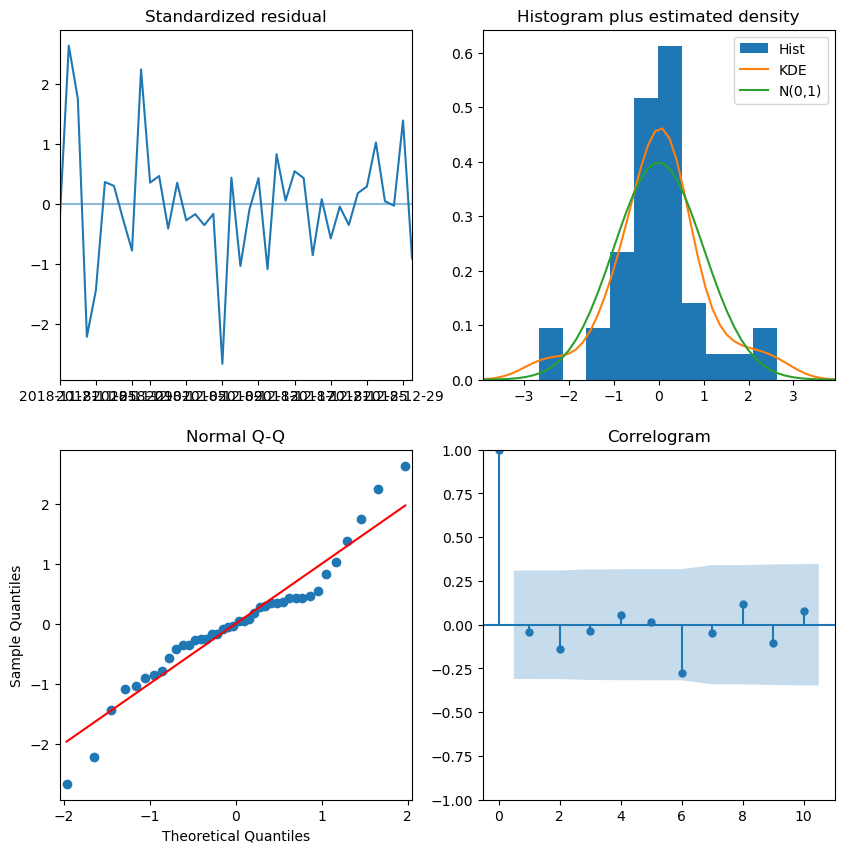

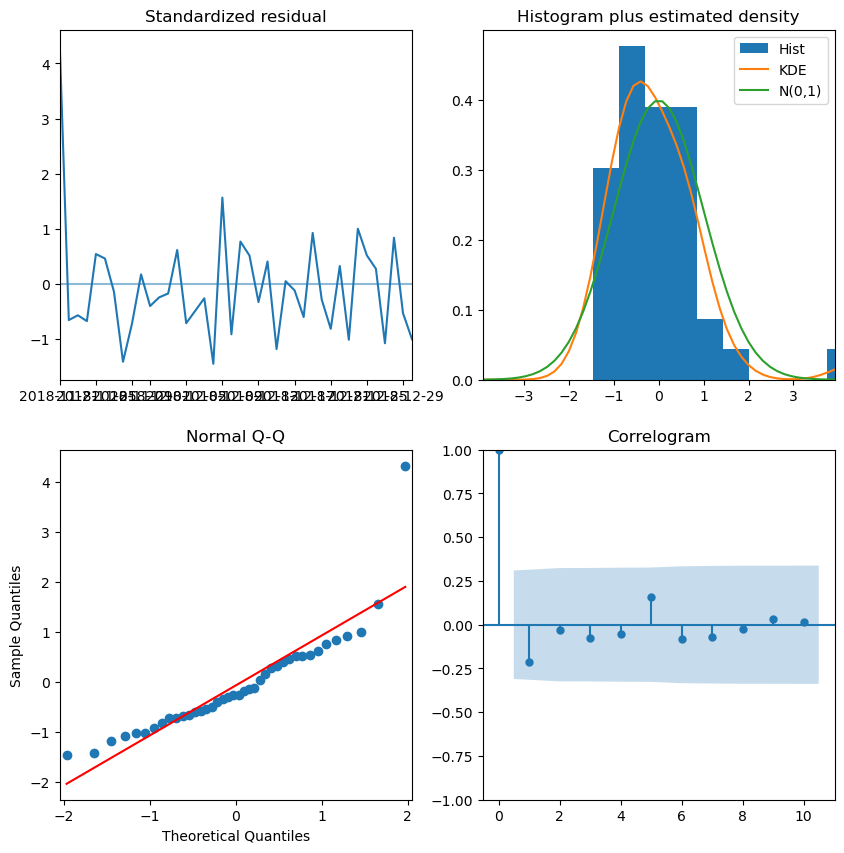

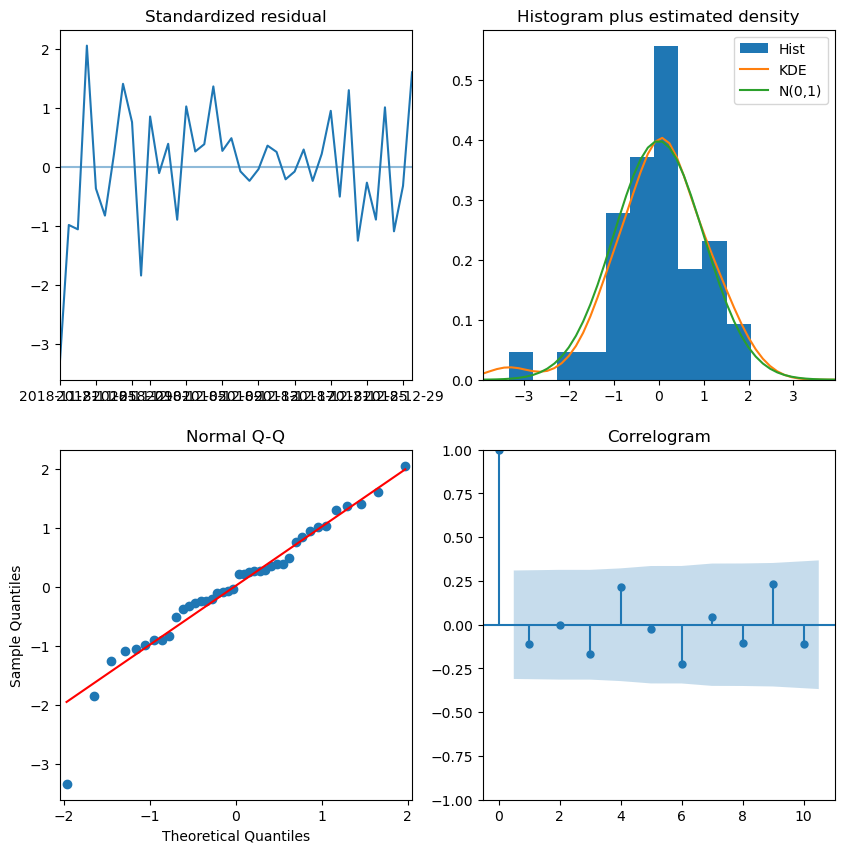

In [110]:
# Validation des modèles

auto_arima_fayulu_HRM_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Fayulu_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_ramazani_HRM_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Ramazani_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);
auto_arima_tshisekedi_HRM_P.plot_diagnostics(figsize=(10,10))
plt.savefig('Resid_Tshisekedi_HRM_P.png', bbox_inches = 'tight', pad_inches = .1);

In [111]:
# Predictions

pred_fayulu_HRM, conf_int_fayulu_HRM = auto_arima_fayulu_HRM_P.predict(n_periods=1,
                                                                     return_conf_int = True,
                                                                     alpha = .1)
pred_ramazani_HRM, conf_int_ramazani_HRM = auto_arima_ramazani_HRM_P.predict(n_periods=1,
                                                                           return_conf_int = True,
                                                                           alpha = .25)
pred_tshisekedi_HRM, conf_int_tshisekedi_HRM = auto_arima_tshisekedi_HRM_P.predict(n_periods=1,
                                                                                 return_conf_int = True,
                                                                                 alpha = .1)

predictions_HRM_P = standardizer(pred_fayulu_HRM[0],
                                 pred_ramazani_HRM[0],
                                 pred_tshisekedi_HRM[0])

time_series_data_HRM_P = unit_root_test_HRM_P.append(predictions_HRM_P, ignore_index=True)
time_series_data_HRM_P.index = ['ADF stats', 'P-value', 'Predicted value']

time_series_data_HRM_P

Fayulu      Ramazani  Tshisekedi
ADF stats       -5.063792 -7.483117e+00   -4.820792
P-value          0.000017  4.715009e-11    0.000050
Predicted value  0.215241  1.339795e-01    0.650779

In [112]:
# Confidence Interval

conf_int_HRM_P = pd.DataFrame(np.concatenate([conf_int_fayulu_HRM, conf_int_ramazani_HRM, conf_int_tshisekedi_HRM]),
                            index=candidate, columns=['Lower bound', 'Upper bound'])
conf_int_HRM_P

Lower bound  Upper bound
                                    
Fayulu         0.072405     0.382677
Ramazani       0.006146     0.277125
Tshisekedi     0.465292     0.910642

In [113]:
# Accuracy

observations = {'Fayulu':0.3482, 'Ramazani':0.2383, 'Tshisekedi':0.3856}
accuracy_metrics_HRM_P = accuracy_score(predicted = np.array(list(predictions_HRM_P.values())),
                                      observed = np.array(list(observations.values())))

accuracy_metrics_P['HRM index'] = accuracy_metrics_HRM_P
accuracy_metrics_P

TSSW index  WG index  HRM index
Penalized    0.877466  0.615993    0.49756

# Comparaison des 3 indices

In [114]:
# Observations vs Predictions (without penalization)

TSSW = time_series_data_TSSW.loc['Predicted value']
WG = time_series_data_WG.loc['Predicted value']
HRM = time_series_data_HRM.loc['Predicted value']
data_index = pd.DataFrame([observations, TSSW, WG, HRM],
                          index = ['Observed value', 'TSSW predicted', 'WG predicted', 'YHRM predicted']).T
data_index.to_latex('data_index.tex')
data_index['Penalization'] = 'no'
data_index

Observed value  TSSW predicted  WG predicted  YHRM predicted  \
Fayulu              0.3482        0.294019      0.547510        0.148421   
Ramazani            0.2383        0.327651      0.204217        0.176438   
Tshisekedi          0.3856        0.378330      0.248273        0.675141   

           Penalization  
Fayulu               no  
Ramazani             no  
Tshisekedi           no

In [115]:
# Observations vs Predictions (with penalization)

TSSW_P = time_series_data_TSSW_P.loc['Predicted value']
WG_P = time_series_data_WG_P.loc['Predicted value']
HRM_P = time_series_data_HRM_P.loc['Predicted value']
data_index_P = pd.DataFrame([observations, TSSW_P, WG_P, HRM_P],
                            index = ['Observed value', 'P-TSSW predicted', 'P-WG predicted', 'P-YHRM predicted']).T
data_index_P.to_latex('data_index_P.tex')
data_index_P['Penalization'] = 'yes'
data_index_P

Observed value  P-TSSW predicted  P-WG predicted  \
Fayulu              0.3482          0.306675        0.552324   
Ramazani            0.2383          0.280907        0.170439   
Tshisekedi          0.3856          0.412418        0.277237   

            P-YHRM predicted Penalization  
Fayulu              0.215241          yes  
Ramazani            0.133979          yes  
Tshisekedi          0.650779          yes

In [116]:
# Stacking the data

data_index.drop('Penalization', axis=1, inplace=True)
indices_data = pd.DataFrame(data_index.stack())
indices_data.reset_index(inplace = True)
indices_data.columns = ['Leader', 'Index name', 'Index value']

data_index_P.drop('Penalization', axis=1, inplace=True)
indices_data_P = pd.DataFrame(data_index_P.stack())
indices_data_P.reset_index(inplace = True)
indices_data_P.columns = ['Leader', 'Index name', 'Index value']

index_data = pd.concat([indices_data, indices_data_P], axis=0)
index_data.reset_index(inplace = True)
index_data.drop('index', axis=1, inplace=True)
index_data

Leader        Index name  Index value
0       Fayulu    Observed value     0.348200
1       Fayulu    TSSW predicted     0.294019
2       Fayulu      WG predicted     0.547510
3       Fayulu    YHRM predicted     0.148421
4     Ramazani    Observed value     0.238300
5     Ramazani    TSSW predicted     0.327651
6     Ramazani      WG predicted     0.204217
7     Ramazani    YHRM predicted     0.176438
8   Tshisekedi    Observed value     0.385600
9   Tshisekedi    TSSW predicted     0.378330
10  Tshisekedi      WG predicted     0.248273
11  Tshisekedi    YHRM predicted     0.675141
12      Fayulu    Observed value     0.348200
13      Fayulu  P-TSSW predicted     0.306675
14      Fayulu    P-WG predicted     0.552324
15      Fayulu  P-YHRM predicted     0.215241
16    Ramazani    Observed value     0.238300
17    Ramazani  P-TSSW predicted     0.280907
18    Ramazani    P-WG predicted     0.170439
19    Ramazani  P-YHRM predicted     0.133979
20  Tshisekedi    Observed value     0.385600
21  Tshisekedi  P-TSSW predicted     0.412418
22  Tshisekedi    P-WG predicted     0.277237
23  Tshisekedi  P-YHRM predicted     0.650779

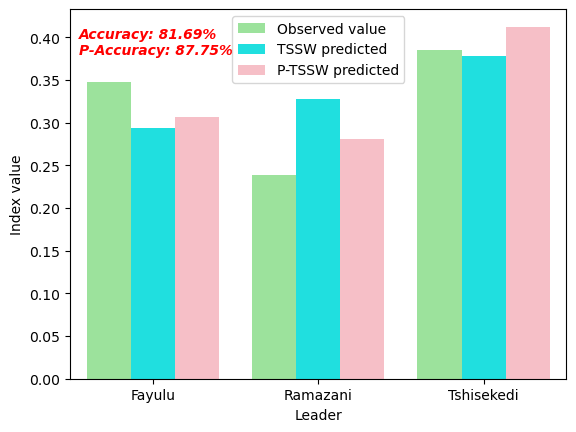

In [117]:
# TSSW index

sns.barplot(data=index_data[(index_data['Index name']=='Observed value') | (index_data['Index name']=='TSSW predicted') | (index_data['Index name']=='P-TSSW predicted')],
            x = 'Leader', y = 'Index value', hue = 'Index name',
            palette = ['lightgreen', 'cyan', 'lightpink']).text(-.45, 0.38, 'Accuracy: 81.69% \nP-Accuracy: 87.75%', fontsize = 10,
                                                        fontstyle = 'oblique', color = 'red', weight = 'bold')
plt.legend(fontsize=10)
plt.savefig('Real_vs_TSSW.png', bbox_inches = 'tight', pad_inches = .1);

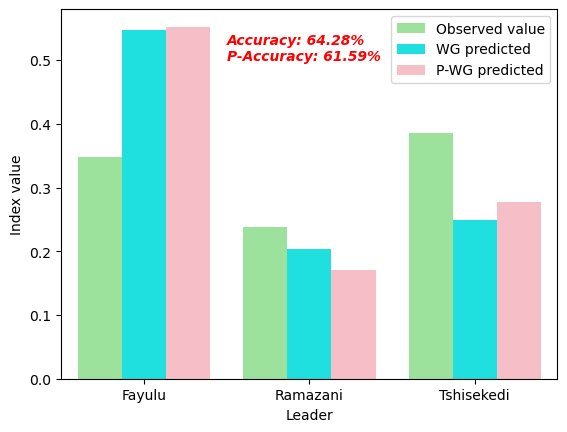

In [118]:
# WG index

sns.barplot(data=index_data[(index_data['Index name']=='Observed value') | (index_data['Index name']=='WG predicted') | (index_data['Index name']=='P-WG predicted')],
            x = 'Leader', y = 'Index value', hue = 'Index name',
            palette = ['lightgreen', 'cyan', 'lightpink']).text(0.5, 0.5, 'Accuracy: 64.28% \nP-Accuracy: 61.59%', fontsize = 10,
                                                                fontstyle = 'oblique', color = 'red', weight = 'bold')
plt.legend(fontsize=10)
plt.savefig('Real_vs_WG.png', bbox_inches = 'tight', pad_inches = .1);

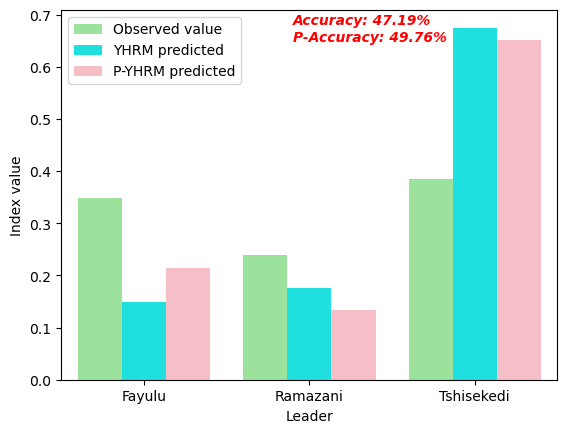

In [119]:
# HRM index

sns.barplot(data=index_data[(index_data['Index name']=='Observed value') | (index_data['Index name']=='YHRM predicted') | (index_data['Index name']=='P-YHRM predicted')],
            x = 'Leader', y = 'Index value', hue = 'Index name',
            palette = ['lightgreen', 'cyan', 'lightpink']).text(.9, 0.65, 'Accuracy: 47.19% \nP-Accuracy: 49.76%', fontsize = 10,
                                                                fontstyle = 'oblique', color = 'red', weight = 'bold')
plt.legend(fontsize=10)
plt.savefig('Real_vs_HRM.png', bbox_inches = 'tight', pad_inches = .1);